# **Projet 7 : Implémentez un modèle de scoring - Analyse exploratoire**

**Table des matières**<a id='toc0_'></a>    
- 1. [Introduction](#toc1_)    
  - 1.1. [Contexte](#toc1_1_)    
  - 1.2. [Mission](#toc1_2_)    
  - 1.3. [Objectif du Notebook](#toc1_3_)    
- 2. [Installation des librairies](#toc2_)    
- 3. [Analyse exploratoire](#toc3_)    
  - 3.1. [Application_train](#toc3_1_)    
    - 3.1.1. [Généralités](#toc3_1_1_)    
    - 3.1.2. [Variable Cible](#toc3_1_2_)    
    - 3.1.3. [Matrice de corrélation Phi-K](#toc3_1_3_)    
    - 3.1.4. [Matrice de corrélation](#toc3_1_4_)    
    - 3.1.5. [Variable OCCUPATION_TYPE](#toc3_1_5_)    
    - 3.1.6. [Variable ORGANIZATION_TYPE](#toc3_1_6_)    
    - 3.1.7. [Variable NAME_INCOME_TYPE](#toc3_1_7_)    
    - 3.1.8. [Variables REG_CITY_NOT_WORK_CITY - REG_CITY_NOT_LIVE_CITY - LIVE_CITY_NOT_WORK_CITY](#toc3_1_8_)    
    - 3.1.9. [Variables EXT_SOURCE_1, EXT_SOURCE_2 et EXT_SOURCE_3](#toc3_1_9_)    
    - 3.1.10. [Variable DAY_BIRTH](#toc3_1_10_)    
  - 3.2. [Application_test](#toc3_2_)    
  - 3.3. [Bureau](#toc3_3_)    
    - 3.3.1. [Généralités](#toc3_3_1_)    
    - 3.3.2. [Matrice de corrélation Phi-K](#toc3_3_2_)    
    - 3.3.3. [Matrice de corrélation](#toc3_3_3_)    
    - 3.3.4. [Variable DAYS_CREDIT](#toc3_3_4_)    
  - 3.4. [Bureau_balance](#toc3_4_)    
    - 3.4.1. [Généralités](#toc3_4_1_)    
  - 3.5. [Credit_card_balance](#toc3_5_)    
    - 3.5.1. [Généralités](#toc3_5_1_)    
    - 3.5.2. [Matrice de corrélation](#toc3_5_2_)    
  - 3.6. [Installments_payments](#toc3_6_)    
    - 3.6.1. [Généralités](#toc3_6_1_)    
    - 3.6.2. [Matrice de corrélation](#toc3_6_2_)    
  - 3.7. [POS_cash_balance](#toc3_7_)    
    - 3.7.1. [Généralités](#toc3_7_1_)    
    - 3.7.2. [Matrice de corrélation](#toc3_7_2_)    
    - 3.7.3. [Variable NAME_CONTRACT_STATUS](#toc3_7_3_)    
  - 3.8. [Previous_application](#toc3_8_)    
    - 3.8.1. [Généralités](#toc3_8_1_)    
    - 3.8.2. [Matrice de corrélation Phi-K](#toc3_8_2_)    
    - 3.8.3. [Matrice de corrélation](#toc3_8_3_)    
    - 3.8.4. [Variable NAME_CONTRACT_STATUS](#toc3_8_4_)    
  - 3.9. [Bilan](#toc3_9_)    
- 4. [Regroupement des DataFrames](#toc4_)    
  - 4.1. [Création de Data à partir d'application_train et application_test](#toc4_1_)    
  - 4.2. [Bureau et bureau_balance](#toc4_2_)    
  - 4.3. [Previous_application](#toc4_3_)    
  - 4.4. [POS_cash_balance](#toc4_4_)    
  - 4.5. [Installments_payments](#toc4_5_)    
  - 4.6. [Credit_card_balance](#toc4_6_)    
  - 4.7. [Enregistrement de data](#toc4_7_)    
- 5. [Features selection](#toc5_)    
- 6. [Pre_processing](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Introduction](#toc0_)
### 1.1. <a id='toc1_1_'></a>[Contexte](#toc0_)

Vous êtes Data Scientist au sein d'une société financière, nommée "Prêt à dépenser", qui propose des crédits à la consommation pour des personnes ayant peu ou pas du tout d'historique de prêt.

L’entreprise souhaite mettre en œuvre un outil de “scoring crédit” pour calculer la probabilité qu’un client rembourse son crédit, puis classifier la demande en crédit accordé ou refusé. Elle souhaite donc développer un algorithme de classification en s’appuyant sur des sources de données variées (données comportementales, données provenant d'autres institutions financières, etc.).

De plus, les chargés de relation client ont fait remonter le fait que les clients sont de plus en plus demandeurs de transparence vis-à-vis des décisions d’octroi de crédit. Cette demande de transparence des clients va tout à fait dans le sens des valeurs que l’entreprise veut incarner.

Prêt à dépenser décide donc de développer un dashboard interactif pour que les chargés de relation client puissent à la fois expliquer de façon la plus transparente possible les décisions d’octroi de crédit, mais également permettre à leurs clients de disposer de leurs informations personnelles et de les explorer facilement.

### 1.2. <a id='toc1_2_'></a>[Mission](#toc0_)

1. Construction d'un modèle de scoring donnant une prédiction sur la probabilité de faillite d'un client de façon automatique.
2. Construction d'un dashboard interactif à destination des gestionnaires de la relation client permettant d'interpréter les prédictions faites par le modèle, et d’améliorer la connaissance client des chargés de relation client.
3. Mise en production du modèle de scoring de prédiction à l’aide d’une API, ainsi que du dashboard interactif appelant l’API pour les prédictions.

### 1.3. <a id='toc1_3_'></a>[Objectif du Notebook](#toc0_)

Dans ce Notebook nous verrons : 
- L'analyse exploratoire des différents Datasets
- Le regroupement de l'ensemble des données dans un seul et même fichier à la maille client : 
    - Aggrégation des données (création automatique de nouvelles variables)
    - Création de variables manuellement sur la base "métier"
    - Encodage des variables catégorielles
- La sélection des features importantes pour la prédiction (réduction dimensionnelle et simplification du modèle)


<u>Pour ce notebook, nous nous sommes appuyé sur différentes Kernel KAGGLE :</u>
- *[SOURCE_1](https://www.kaggle.com/ozericyer/homecreditdefaultrisk-test-train-eda-1)*
- *[SOURCE_2](https://www.kaggle.com/code/rishabhrao/home-credit-default-risk-extensive-eda)*
- *[SOURCE_3](https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features/script)*



## 2. <a id='toc2_'></a>[Installation des librairies](#toc0_)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from Fonctions import fct_data

In [2]:
# Importation des fichiers dans un dictionnaire : 

dataframes = fct_data.importation_DataFrame(
    dossier='1. Données',
)

Dataframes importés dans le dictionnaire dataframes :

- application_test
- HomeCredit_columns_description
- POS_CASH_balance
- credit_card_balance
- installments_payments
- application_train
- bureau
- previous_application
- bureau_balance
- sample_submission


<u> **Schéma de relation entre les fichiers :** </u>  
![Schéma de relation entre les fichiers](https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png)

<u> **Descriptions des fichiers :** </u>


| Fichier | Description |
| --- | --- |
| **application_train.csv** <br> **application_test.csv**|  -> Tableau principal, divisé en deux fichiers : Train (avec TARGET) et Test (sans TARGET).<br><br>- Répertorie les données statistiques de l'ensemble des applications. <br>- Une ligne par prêt|
|**bureau.csv** | -> Tous les crédits précédents du client fournis par d'autres institutions financières qui ont été rapportés au Credit Bureau (pour les clients qui ont un prêt dans notre échantillon).<br><br>- Pour chaque prêt de notre échantillon, il y a autant de lignes que le nombre de crédits que le client avait dans le Credit Bureau avant la date de la demande.|
|**bureau_balance.csv** |-> Soldes mensuels des crédits précédents dans Credit Bureau.<br><br>- Ce tableau a une ligne pour chaque mois d'historique de chaque crédit précédent rapporté au Credit Bureau.<br> c'est-à-dire que le tableau a (#prêts dans l'échantillon * # de crédits précédents relatifs * # de mois où nous avons un historique observable pour les crédits précédents) des lignes.|
|**POS_CASH_balance.csv** |-> Aperçus du solde mensuel des précédents points de vente (points de vente) et des prêts de trésorerie que le demandeur avait contractés avec Home Credit.<br><br>- Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent en crédit immobilier (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon. <br> c'est-à-dire que le tableau contient (#prêts dans l'échantillon * # de crédits relatifs précédents * # de mois dans lequel nous avons un historique observable pour les crédits précédents).|
|**credit_card_balance.csv** |-> Aperçus du solde mensuel des cartes de crédit précédentes que le demandeur possède avec Home Credit.<br><br>- Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent en crédit immobilier (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon.<br> c'est-à-dire que le tableau contient (#prêts dans l'échantillon * # de cartes de crédit précédentes relatives * # de mois où nous avons un historique observable pour les lignes de cartes de crédit précédentes.|
|**previous_application.csv** |-> Toutes les demandes précédentes de prêts immobiliers des clients qui ont des prêts dans notre échantillon.<br><br>- Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données.|
|**installments_payments.csv** |-> Historique de remboursement des crédits précédemment décaissés en Crédit Habitation liés aux prêts de notre échantillon.<br><br>- Il y a a) une ligne pour chaque paiement effectué plus b) une ligne pour chaque paiement manqué.<br>- Une ligne équivaut à un versement d'une échéance OU à un versement correspondant à un versement d'un précédent crédit logement lié aux prêts de notre échantillon.|
|>**HomeCredit_columns_description.csv** |-> Ce fichier contient des descriptions pour les colonnes des différents fichiers de données.|

In [3]:
# Visualisation rapide des données : 

for key in dataframes.keys():
    print(f"Dimension de {key} : {dataframes[key].shape}")
    
del key

Dimension de application_test : (48744, 121)
Dimension de HomeCredit_columns_description : (219, 5)
Dimension de POS_CASH_balance : (10001358, 8)
Dimension de credit_card_balance : (3840312, 23)
Dimension de installments_payments : (13605401, 8)
Dimension de application_train : (307511, 122)
Dimension de bureau : (1716428, 17)
Dimension de previous_application : (1670214, 37)
Dimension de bureau_balance : (27299925, 3)
Dimension de sample_submission : (48744, 2)


## 3. <a id='toc3_'></a>[Analyse exploratoire](#toc0_)
### 3.1. <a id='toc3_1_'></a>[Application_train](#toc0_)
#### 3.1.1. <a id='toc3_1_1_'></a>[Généralités](#toc0_)

In [4]:
# Visualisation des colonnes du DataFrame : 
df = dataframes['application_train'].copy()

print('Descriptions des colonnes de application_train')
desc = dataframes['HomeCredit_columns_description'].copy().drop('Unnamed: 0', axis=1)
desc = desc[desc['Table'] == 'application_{train|test}.csv']

pd.set_option('display.max_rows', None)
display(desc)
pd.reset_option('display.max_rows')

del desc

Descriptions des colonnes de application_train


Table                           Row  \
0    application_{train|test}.csv                    SK_ID_CURR   
1    application_{train|test}.csv                        TARGET   
2    application_{train|test}.csv            NAME_CONTRACT_TYPE   
3    application_{train|test}.csv                   CODE_GENDER   
4    application_{train|test}.csv                  FLAG_OWN_CAR   
5    application_{train|test}.csv               FLAG_OWN_REALTY   
6    application_{train|test}.csv                  CNT_CHILDREN   
7    application_{train|test}.csv              AMT_INCOME_TOTAL   
8    application_{train|test}.csv                    AMT_CREDIT   
9    application_{train|test}.csv                   AMT_ANNUITY   
10   application_{train|test}.csv               AMT_GOODS_PRICE   
11   application_{train|test}.csv               NAME_TYPE_SUITE   
12   application_{train|test}.csv              NAME_INCOME_TYPE   
13   application_{train|test}.csv           NAME_EDUCATION_TYPE   
14   application_{train|test}.csv            NAME_FAMILY_STATUS   
15   application_{train|test}.csv             NAME_HOUSING_TYPE   
16   application_{train|test}.csv    REGION_POPULATION_RELATIVE   
17   application_{train|test}.csv                    DAYS_BIRTH   
18   application_{train|test}.csv                 DAYS_EMPLOYED   
19   application_{train|test}.csv             DAYS_REGISTRATION   
20   application_{train|test}.csv               DAYS_ID_PUBLISH   
21   application_{train|test}.csv                   OWN_CAR_AGE   
22   application_{train|test}.csv                    FLAG_MOBIL   
23   application_{train|test}.csv                FLAG_EMP_PHONE   
24   application_{train|test}.csv               FLAG_WORK_PHONE   
25   application_{train|test}.csv              FLAG_CONT_MOBILE   
26   application_{train|test}.csv                    FLAG_PHONE   
27   application_{train|test}.csv                    FLAG_EMAIL   
28   application_{train|test}.csv               OCCUPATION_TYPE   
29   application_{train|test}.csv               CNT_FAM_MEMBERS   
30   application_{train|test}.csv          REGION_RATING_CLIENT   
31   application_{train|test}.csv   REGION_RATING_CLIENT_W_CITY   
32   application_{train|test}.csv    WEEKDAY_APPR_PROCESS_START   
33   application_{train|test}.csv       HOUR_APPR_PROCESS_START   
34   application_{train|test}.csv    REG_REGION_NOT_LIVE_REGION   
35   application_{train|test}.csv    REG_REGION_NOT_WORK_REGION   
36   application_{train|test}.csv   LIVE_REGION_NOT_WORK_REGION   
37   application_{train|test}.csv        REG_CITY_NOT_LIVE_CITY   
38   application_{train|test}.csv        REG_CITY_NOT_WORK_CITY   
39   application_{train|test}.csv       LIVE_CITY_NOT_WORK_CITY   
40   application_{train|test}.csv             ORGANIZATION_TYPE   
41   application_{train|test}.csv                  EXT_SOURCE_1   
42   application_{train|test}.csv                  EXT_SOURCE_2   
43   application_{train|test}.csv                  EXT_SOURCE_3   
44   application_{train|test}.csv                APARTMENTS_AVG   
45   application_{train|test}.csv              BASEMENTAREA_AVG   
46   application_{train|test}.csv   YEARS_BEGINEXPLUATATION_AVG   
47   application_{train|test}.csv               YEARS_BUILD_AVG   
48   application_{train|test}.csv                COMMONAREA_AVG   
49   application_{train|test}.csv                 ELEVATORS_AVG   
50   application_{train|test}.csv                 ENTRANCES_AVG   
51   application_{train|test}.csv                 FLOORSMAX_AVG   
52   application_{train|test}.csv                 FLOORSMIN_AVG   
53   application_{train|test}.csv                  LANDAREA_AVG   
54   application_{train|test}.csv          LIVINGAPARTMENTS_AVG   
55   application_{train|test}.csv                LIVINGAREA_AVG   
56   application_{train|test}.csv       NONLIVINGAPARTMENTS_AVG   
57   application_{train|test}.csv             NONLIVINGAREA_AVG   
58   application_{train|test}.csv               APARTMENTS_MODE   
59   app

Dimmension du DataFrame : (307511, 122)
----------------------------------------------------------------------------------------------------
Nombre de lignes dupliquées : 0
----------------------------------------------------------------------------------------------------
Information sur les types de variables :


Data_type
Nom_de_colonne                        
SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OWN_CAR_AGE                    float64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL                       int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGION       int64
LIVE_REGION_NOT_WORK_REGION      int64
REG_CITY_NOT_LIVE_CITY           int64
REG_CITY_NOT_WORK_CITY           int64
LIVE_CITY_NOT_WORK_CITY          int64
ORGANIZATION_TYPE               object
EXT_SOURCE_1                   float64
EXT_SOURCE_2                   float64
EXT_SOURCE_3                   float64
APARTMENTS_AVG                 float64
BASEMENTAREA_AVG               float64
YEARS_BEGINEXPLUATATION_AVG    float64
YEARS_BUILD_AVG                float64
COMMONAREA_AVG                 float64
ELEVATORS_AVG                  float64
ENTRANCES_AVG                  float64
FLOORSMAX_AVG                  float64
FLOORSMIN_AVG                  float64
LANDAREA_AVG                   float64
LIVINGAPARTMENTS_AVG           float64
LIVINGAREA_AVG                 float64
NONLIVINGAPARTMENTS_AVG        float64
NONLIVINGAREA_AVG              float64
APARTMENTS_MODE                float64
BASEMENTAREA_MODE              float64
YEARS_BEGINEXPLUATATION_MODE   float64
YEARS_BUILD_MODE               float64
COMMONAREA_MODE                float64
ELEVATORS_MODE                 float64
ENTRANCES_MODE                 float64
FLOORSMAX_MODE                 float64
FLOORSMIN_MODE                 float64
LANDAREA_MODE                  float64
LIVINGAPARTMENTS_MODE          float64
LIVINGAREA_MODE                float64
NONLIVINGAPARTMENTS_MODE       float64
NONLIVINGAREA_MODE             float64
APARTMENTS_MEDI                float64
BASEMENTAREA_MEDI              float64
YEARS_BEGINEXPLUATATION_MEDI   float64
YEARS_BUILD_MEDI               float64
COMMONAREA_MEDI                float64
ELEVATORS_MEDI                 float64
ENTRANCES_MEDI                 float64
FLOORSMAX_MEDI                 float64
FLOORSMIN_MEDI                 float64
LANDAREA_MEDI                  float64
LIVINGAPARTMENTS_MEDI          float64
LIVINGAREA_MEDI                float64
NONLIVINGAPARTMENTS_MEDI       float64
NONLIVINGAREA_MEDI             float64
FONDKAPREMONT_MODE              object
HOUSETYPE_MODE                  object
TOTALAREA_MODE                 float64
WALLSMATERIAL_MODE              object
EMERGENCYSTATE_MODE             object
OBS_30_CNT_SOCIAL_CIRCLE       float64
DEF_30_CNT_SOCIAL_CIRCLE       float64
OBS_60_CNT_SOCIAL_CIRCLE       float64
DEF_60_CNT_SOCIAL_CIRCLE       float64
DAYS_LAST_PHONE_CHANGE         float64
FLAG_DOCUMENT_2                  int64
FLAG_DOCUMENT_3                  int64
FLAG_DOCUMENT_4                  int64
FLAG_DOCUMENT_5                  int64
FLAG_DOCUMENT_6                  int64
FLAG_DOCUMEN

----------------------------------------------------------------------------------------------------
Répartition des types de variables :


Data_type  Nombre par type de variable  % des types de variable
0   float64                           65                53.278689
1     int64                           41                33.606557
2    object                           16                13.114754

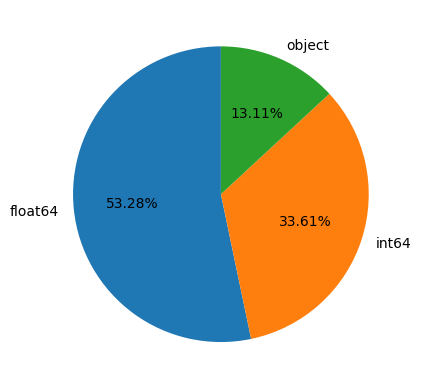

----------------------------------------------------------------------------------------------------


In [5]:
# Visualisation des informations sur les variables du dataframes : 
fct_data.info_variables(
    df=df,
    )

In [6]:
# Visualisation des statistiques descriptives : 
fct_data.describe_dataframe(
    df=df,
)

Statistiques descriptives des colonnes numériques : 



SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

Statistiques descriptives des colonnes catégorielles : 



NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307511      307511       307511          307511   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           306219           307511                         307511   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307511             307511          211120   
unique                  6                  6              18   
top               Married  House / apartment        Laborers   
freq               196432             272868           55186   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                      307511                  307511              97216   
unique                          7                      58                  4   
top                       TUESDAY  Business Entity Type 3   reg oper account   
freq                        53901                   67992              73830   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
count           153214             151170              161756  
unique               3                  7                   2  
top     block of flats              Panel                  No  
freq            150503              66040              159428

Nomnbrde valeurs manquantes : 9152465 | Nbre de données : 37516342 | -----> 24.4 % de valeurs manquantes 
----------------------------------------------------------------------------------------------------
Nombre de variables avec des valeurs manquantes : 67/122


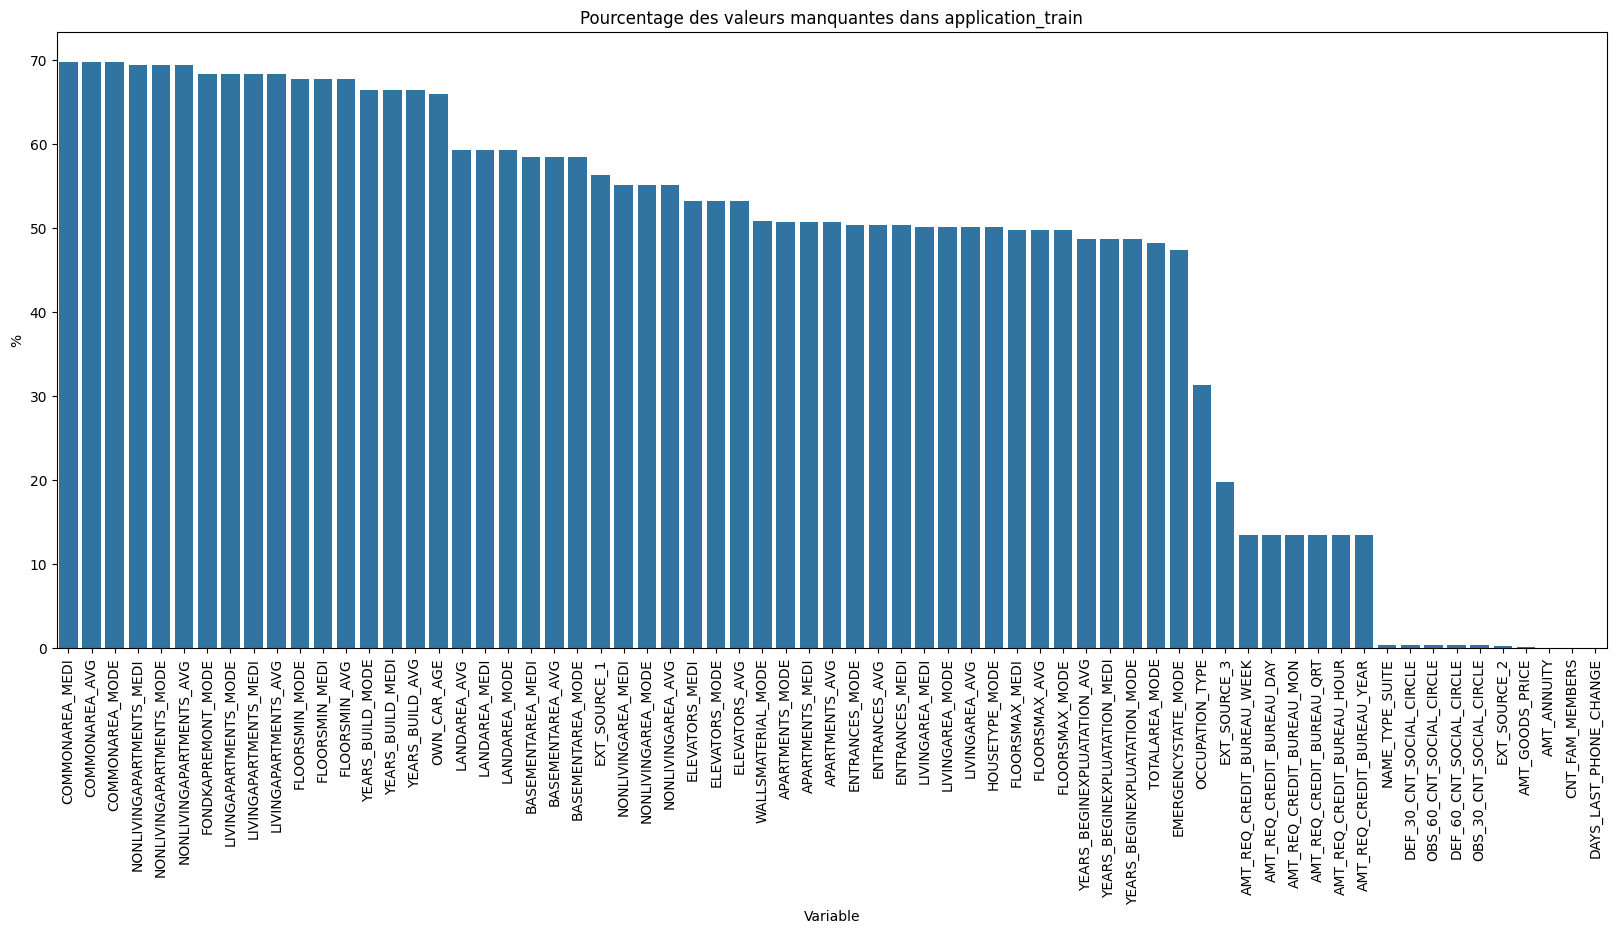

In [7]:
# Visualisation des valeurs manquantes : 

fct_data.valeurs_manquantes(
    df,
    titre_graph='application_train',
    )

Il y à 67 variables sur 122 qui possèdent des valeurs manquantes.  
Une grande partie de ces colonnes étant liées les unes aux autres (mode, medianne, moyenne pour la même variable)

#### 3.1.2. <a id='toc3_1_2_'></a>[Variable Cible](#toc0_)

Deux catégories : 
- 1 : personnes avec au moins un retard de paiements --> Défaillant 
- 0 : Les autres cas. --> Non Défaillant

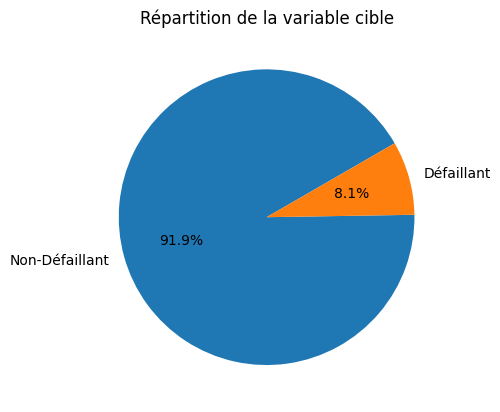

In [8]:
# Créez un sous-ensemble de votre DataFrame pour compter les occurrences de chaque catégorie
count_df = df['TARGET'].replace({0: 'Non-Défaillant', 1: 'Défaillant'}).copy().value_counts().to_frame().reset_index()

# Créez un pie chart
plt.figure()
plt.pie(count_df['count'], labels=count_df['TARGET'], autopct='%1.1f%%', startangle=30)

plt.title('Répartition de la variable cible')

plt.show()

del count_df

Il y a une grande disparité entre les personnes 'Défaillantes" et "Non-Défaillantes".  
Les personnes rencontrant des problèmes de remboursement de leur prêt étant au final minoritaire (8.1% contre 91.9%)

#### 3.1.3. <a id='toc3_1_3_'></a>[Matrice de corrélation Phi-K](#toc0_)

In [9]:
# Récupération de la liste des variables catégorielles de application_train : 
var_categorielles_application_train = ['TARGET','FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
                                        'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
                                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

var_categorielles_application_train += df.dtypes[df.dtypes == 'object'].index.tolist()

var_categorielles_application_train += ['FLAG_DOCUMENT_' + str(i) for i in range(2,22)]

print(f"Il y a {len(var_categorielles_application_train)} variables categorielles ou ordinales dans application_train")

Il y a 51 variables categorielles ou ordinales dans application_train


--------------------------------------------------


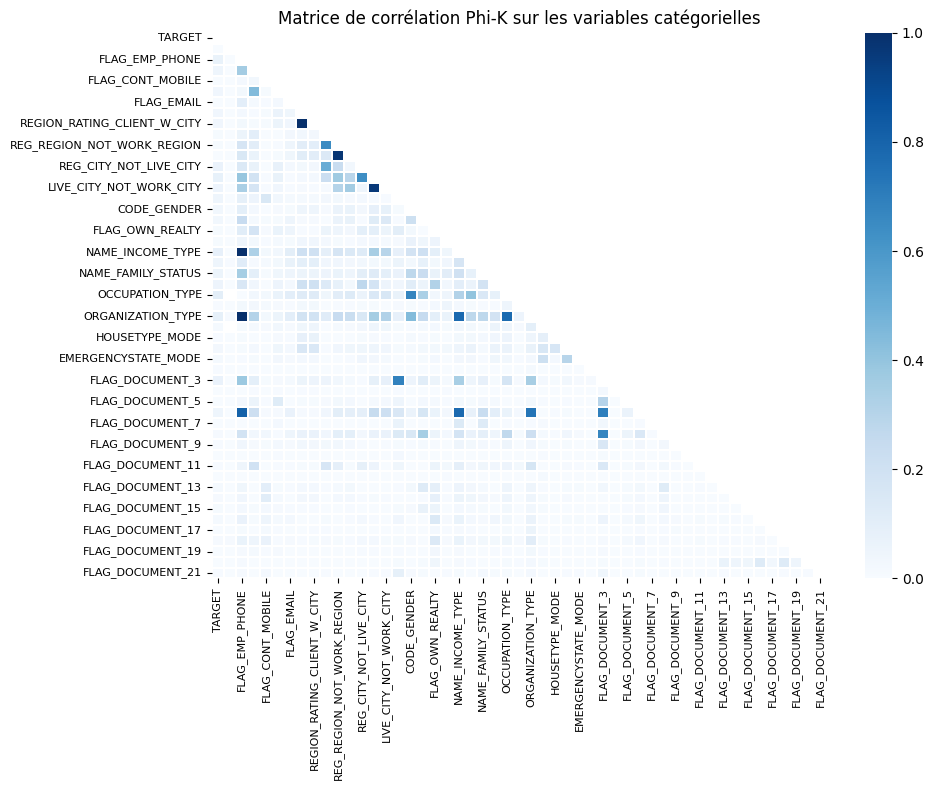

--------------------------------------------------
Les catégories possédant les valeurs de corrélation Phi-K les plus élevées avec la variable cible sont : 


Variables  Phik-Correlation
23          OCCUPATION_TYPE          0.102846
25        ORGANIZATION_TYPE          0.089164
19         NAME_INCOME_TYPE          0.084831
12   REG_CITY_NOT_WORK_CITY          0.079946
1            FLAG_EMP_PHONE          0.072087
11   REG_CITY_NOT_LIVE_CITY          0.069588
31          FLAG_DOCUMENT_3          0.069525
21       NAME_FAMILY_STATUS          0.056043
22        NAME_HOUSING_TYPE          0.051107
13  LIVE_CITY_NOT_WORK_CITY          0.050956

--------------------------------------------------


In [10]:
# Tracé de la matrice de corrélation Phi-K : 
fct_data.plot_phik_matrix(
    df,
    var_categorielles_application_train,
    figsize=(10,8),
    fontsize=8,
    )

Il y a très peu de corrélation entre les valeurs catégorielles.  
Certaines de ces variables sont tout de même corrélées. 

Les principales Variables catégorielles intéressantes pour la classification (plus forte corrélation avec la cible) sont : 
- OCCUPATION_TYPE
- ORGANIZATION_TYPE
- NAME_INCOME_TYPE
- REG_CITY_NOT_WORK_CITY

#### 3.1.4. <a id='toc3_1_4_'></a>[Matrice de corrélation](#toc0_)

In [11]:
#Récupération de la liste des variables numériques : 

var_numeriques_application_train = [col for col in df.columns if col not in var_categorielles_application_train]
var_numeriques_application_train.remove('SK_ID_CURR')

print(f"Il y a {len(var_numeriques_application_train)} variables numériques dans application_train")


Il y a 70 variables numériques dans application_train


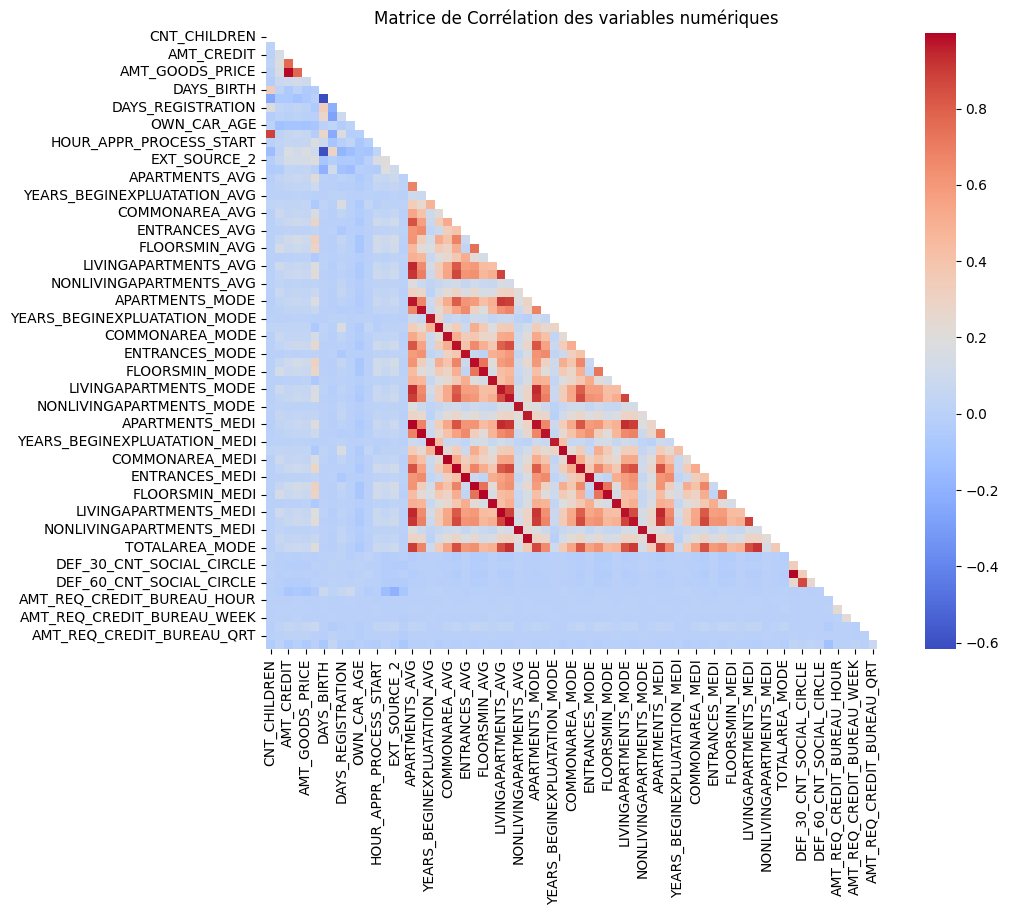

In [12]:
# Tracé de la matrice de corrélation ; 
fct_data.correlation_matrix(
    data=df, 
    var_num=var_numeriques_application_train,
    figsize=(10,8) 
)

In [13]:
# Visualisation des meilleures corrélations entre les variables numériques et la cible : 

fct_data.top_correlation_var_num_target(
    data=df, 
    var_num=var_numeriques_application_train,
    target='TARGET',
)

interval columns not set, guessing: ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'CO

Variable  Phik-Correlation
15            EXT_SOURCE_3          0.247680
13            EXT_SOURCE_1          0.217846
14            EXT_SOURCE_2          0.213965
6               DAYS_BIRTH          0.102378
63  DAYS_LAST_PHONE_CHANGE          0.073218
7            DAYS_EMPLOYED          0.072095
9          DAYS_ID_PUBLISH          0.067766
4          AMT_GOODS_PRICE          0.059094
23           FLOORSMAX_AVG          0.058826
51          FLOORSMAX_MEDI          0.058595

IL y a peu de corrélation entre es variables numériques.  
Les corrélation les plus flagrantes sont entre des variables parlant de la même chose (mode, médiane ou moyenne). 

Les principales Variables numériques intéressantes pour la classification (plus forte corrélation avec la cible) sont : 
- EXT_SOURCE_3
- EXT_SOURCE_1
- EXT_SOURCE_2
- DAYS_BIRTH

#### 3.1.5. <a id='toc3_1_5_'></a>[Variable OCCUPATION_TYPE](#toc0_)
Cette variable indique la catégorie socio-professionnelle du demandeur. 


In [14]:
# Visualisation des valeurs de la variable : 

fct_data.type_donnees_uniques(
    data=df, 
    col='OCCUPATION_TYPE',
)

----------------------------------------------------------------------------------------------------
Nombre de valeur unique de la variable OCCUPATION_TYPE : 19
----------------------------------------------------------------------------------------------------
Pourcentage de valeurs manquantes : 31.35 %
----------------------------------------------------------------------------------------------------
Valeurs uniques : 

	-Laborers
	-Core staff
	-Accountants
	-Managers
	-nan
	-Drivers
	-Sales staff
	-Cleaning staff
	-Cooking staff
	-Private service staff
	-Medicine staff
	-Security staff
	-High skill tech staff
	-Waiters/barmen staff
	-Low-skill Laborers
	-Realty agents
	-Secretaries
	-IT staff
	-HR staff


/Users/maxime/Formation Data Scientist /Projets /test/Fonctions/fct_data.py:456: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
/Users/maxime/Formation Data Scientist /Projets /test/Fonctions/fct_data.py:478: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


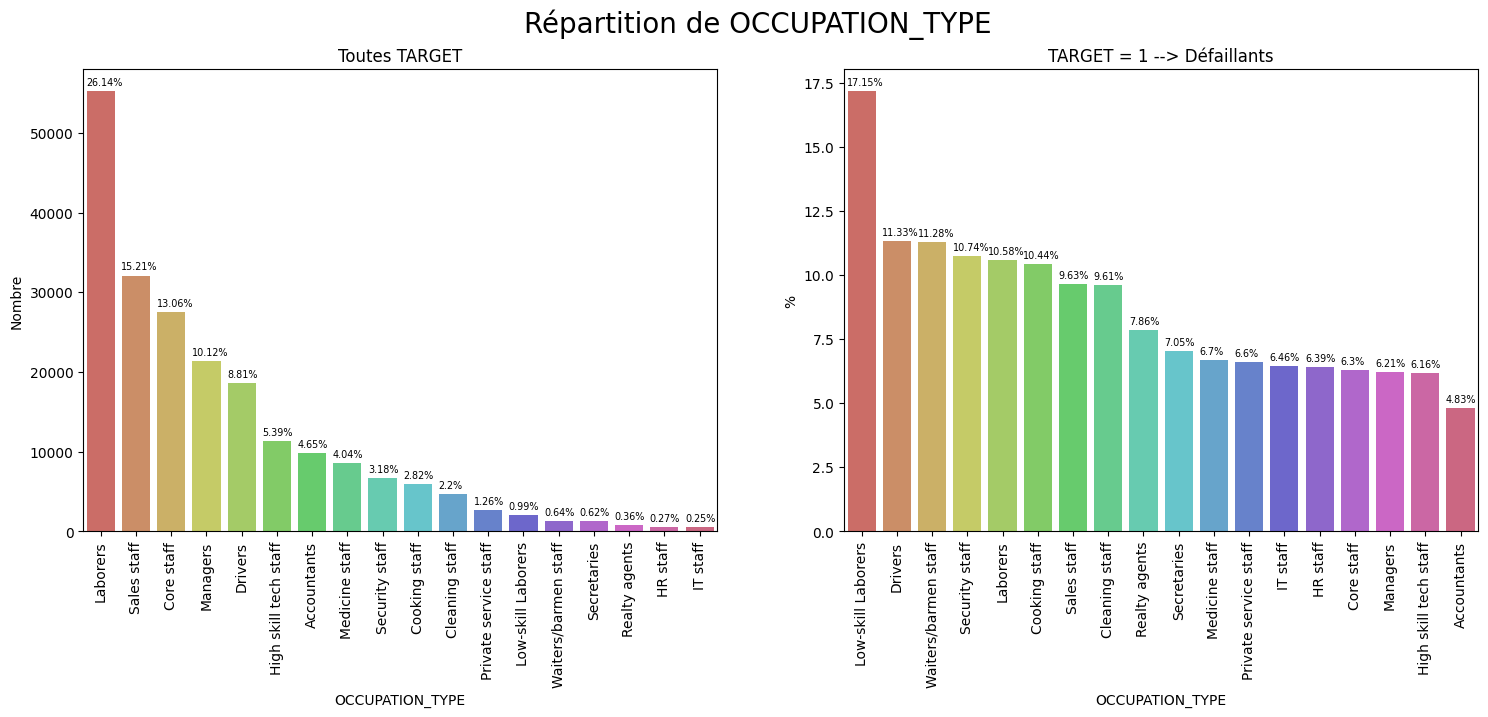

In [15]:
# Visualisation de la répartion des valeurs : 
fct_data.repartition_var_categorielle(
    data=df, 
    var_categorielle='OCCUPATION_TYPE'
)

Catégories socio-professionnelle principales dans le datasets : 
- Laborers (26%)
- Sales staff (15%)
- Core staff (13%)

Principales catégories socio-professionelle pour les 'Défaillants" : 
- Low-skill Laborers (17%)
- Drivers (11%)
- Waiters/barmen staff (11%)


        --> Globalement les travailleurs avec des emplois nécessitants moins d'études sont ceux possédant les taux de défaillance les plus élevés. 


#### 3.1.6. <a id='toc3_1_6_'></a>[Variable ORGANIZATION_TYPE](#toc0_)
Cette variable indique le secteur d'activité du demandeur

In [16]:
# Visualisation des valeurs de la variable : 

fct_data.type_donnees_uniques(
    data=df, 
    col='ORGANIZATION_TYPE',
)

----------------------------------------------------------------------------------------------------
Nombre de valeur unique de la variable ORGANIZATION_TYPE : 58
----------------------------------------------------------------------------------------------------
Pourcentage de valeurs manquantes : 0.0 %
----------------------------------------------------------------------------------------------------
Valeurs uniques : 

	-Business Entity Type 3
	-School
	-Government
	-Religion
	-Other
	-XNA
	-Electricity
	-Medicine
	-Business Entity Type 2
	-Self-employed
	-Transport: type 2
	-Construction
	-Housing
	-Kindergarten
	-Trade: type 7
	-Industry: type 11
	-Military
	-Services
	-Security Ministries
	-Transport: type 4
	-Industry: type 1
	-Emergency
	-Security
	-Trade: type 2
	-University
	-Transport: type 3
	-Police
	-Business Entity Type 1
	-Postal
	-Industry: type 4
	-Agriculture
	-Restaurant
	-Culture
	-Hotel
	-Industry: type 7
	-Trade: type 3
	-Industry: type 3
	-Bank
	-Industry: type

/Users/maxime/Formation Data Scientist /Projets /test/Fonctions/fct_data.py:456: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
/Users/maxime/Formation Data Scientist /Projets /test/Fonctions/fct_data.py:478: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


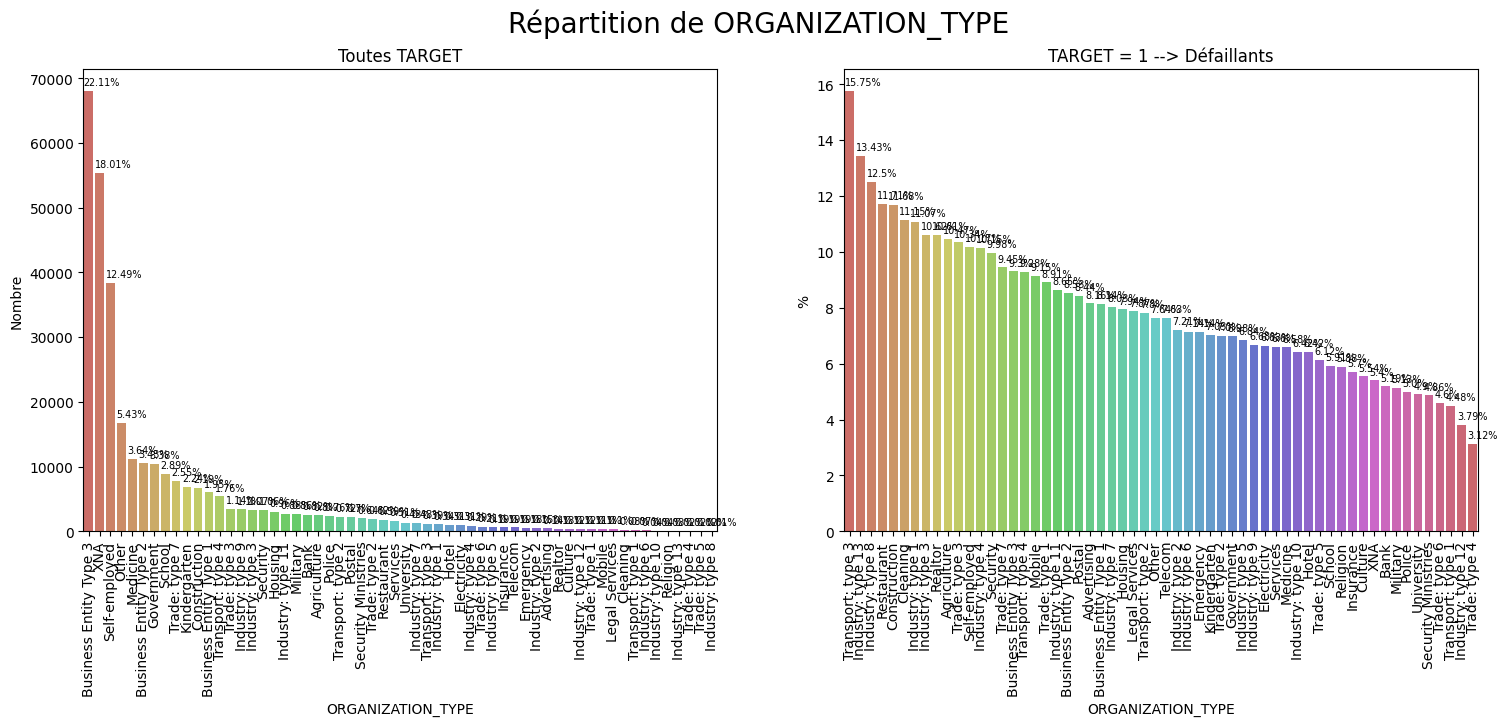

In [17]:
# Visualisation de la répartion des valeurs : 
fct_data.repartition_var_categorielle(
    data=df, 
    var_categorielle='ORGANIZATION_TYPE'
)


Pour cette variable, il y a un grans nombre de "type d'organisation", 58 exactement. 

"Organisation" dans lesquels les personnes demandent le plus de prêt : 
- Business Entity Type 3 (22%)
- XNA (18%)
- Self-employed (12%)


"Organisation" dans lesquels les personnes ont le plus de mal à rembourser leur prêt : 
- Transport type 1 (16%)
- Industry type 13 (13%)
- Industry type 8 (12%)

#### 3.1.7. <a id='toc3_1_7_'></a>[Variable NAME_INCOME_TYPE](#toc0_)
Cette variable représente le type de revenu du demandeur (homme d'affaire, travailleur, congé maternité...)

In [18]:
# Visualisation des valeurs de la variable : 

fct_data.type_donnees_uniques(
    data=df, 
    col='NAME_INCOME_TYPE',
)

----------------------------------------------------------------------------------------------------
Nombre de valeur unique de la variable NAME_INCOME_TYPE : 8
----------------------------------------------------------------------------------------------------
Pourcentage de valeurs manquantes : 0.0 %
----------------------------------------------------------------------------------------------------
Valeurs uniques : 

	-Working
	-State servant
	-Commercial associate
	-Pensioner
	-Unemployed
	-Student
	-Businessman
	-Maternity leave


/Users/maxime/Formation Data Scientist /Projets /test/Fonctions/fct_data.py:456: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
/Users/maxime/Formation Data Scientist /Projets /test/Fonctions/fct_data.py:478: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


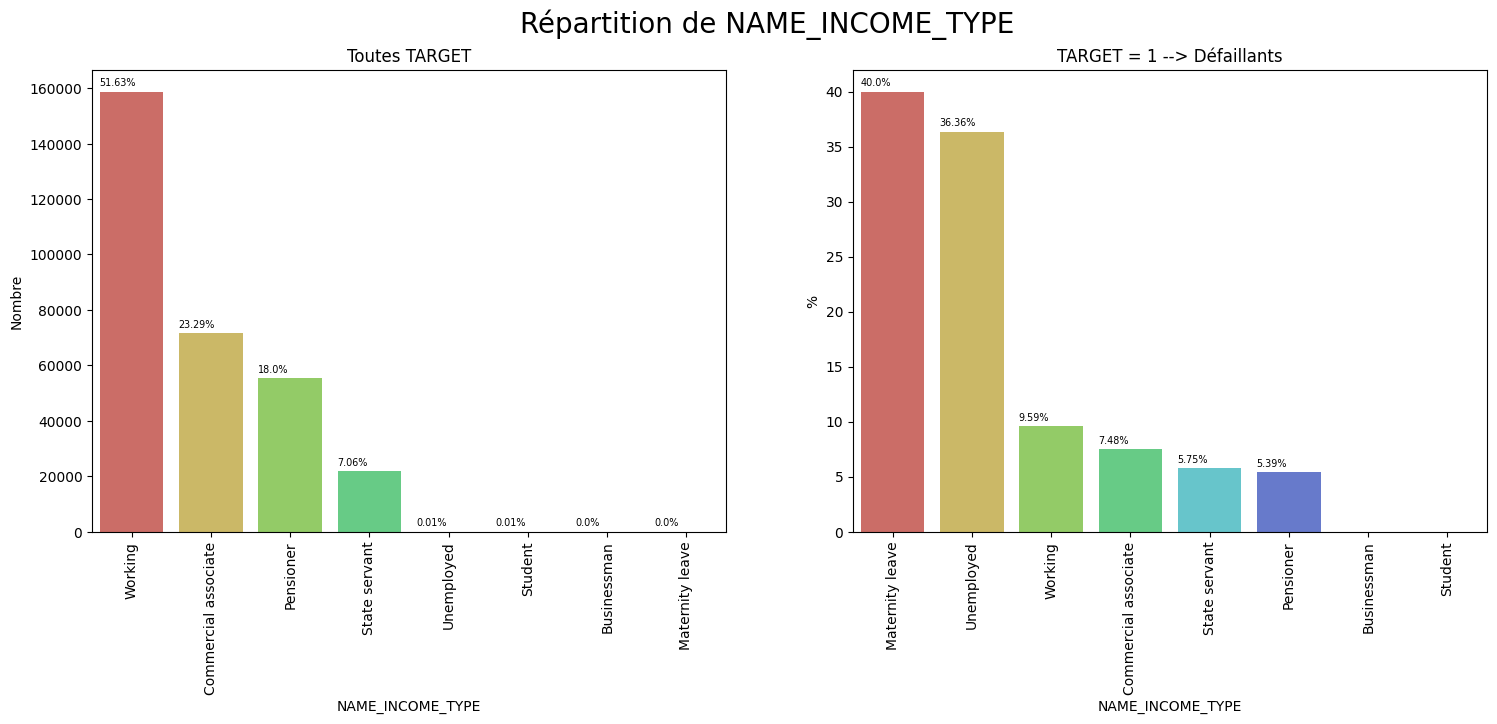

In [19]:
# Visualisation de la répartion des valeurs : 
fct_data.repartition_var_categorielle(
    data=df, 
    var_categorielle='NAME_INCOME_TYPE'
)

Types de revenu demandant le plus de prêt : 
- Working (52%)
- Commercial associate (23%)
- Pensionner (18%)

Contrairement aux variables précédentes, il n'y a quasiment pas de demande pour : 
- Unemployed
- Student
- Buisnessman 
- Maternity leave

Les types de revenu ayant le plus de mal à rmbourser leur prêt étant : 
- Maternity leave (40%)
- Unemployed (36%)
- Working (10%)

        ---> Certain types de revenu (Maternity leave par ex) font très peu de demande de prêt mais ont du mal à rembourser. 

#### 3.1.8. <a id='toc3_1_8_'></a>[Variables REG_CITY_NOT_WORK_CITY - REG_CITY_NOT_LIVE_CITY - LIVE_CITY_NOT_WORK_CITY](#toc0_)
Cette variables est plus ou moins liée aux variables 'REG_CITY_NOT_LIVE_CITY' et 'LIVE_CITY_NOT_WORK_CITY' ---> Elles sont complémentaires 

|Variable|Description|Indiicateurs|
|-|-|-|
|**REG_CITY_NOT_LIVE_CITY**<br>**REG_CITY_NOT_WORK_CITY**|ces variables indiquent si l'adresse permanente du demandeur correspond ou non à son adresse de contact pour la demande de prêt ou à son adresse professionnelle au niveau de la région.|**1** pour des **adresses différentes**<br>**0** pour des **adresses identiques**|
|**LIVE_CITY_NOT_WORK_CITY**|cette variable indique si l'adresse permanente du demandeur correspond ou non à son adresse de contact donnée pour la demande de prêt au niveau de la ville.|**1** pour des **adresses différentes**<br>**0** pour des **adresses identiques**|

In [20]:
# Visualisation des valeurs de la variable : 

ls_var = ['REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']


for var in ls_var: 
    fct_data.type_donnees_uniques(
        data=df, 
        col=var,
    )

----------------------------------------------------------------------------------------------------
Nombre de valeur unique de la variable REG_CITY_NOT_LIVE_CITY : 2
----------------------------------------------------------------------------------------------------
Pourcentage de valeurs manquantes : 0.0 %
----------------------------------------------------------------------------------------------------
Valeurs uniques : 

	-0
	-1
----------------------------------------------------------------------------------------------------
Nombre de valeur unique de la variable REG_CITY_NOT_WORK_CITY : 2
----------------------------------------------------------------------------------------------------
Pourcentage de valeurs manquantes : 0.0 %
----------------------------------------------------------------------------------------------------
Valeurs uniques : 

	-0
	-1
----------------------------------------------------------------------------------------------------
Nombre de valeur uniq

/Users/maxime/Formation Data Scientist /Projets /test/Fonctions/fct_data.py:456: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
/Users/maxime/Formation Data Scientist /Projets /test/Fonctions/fct_data.py:478: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


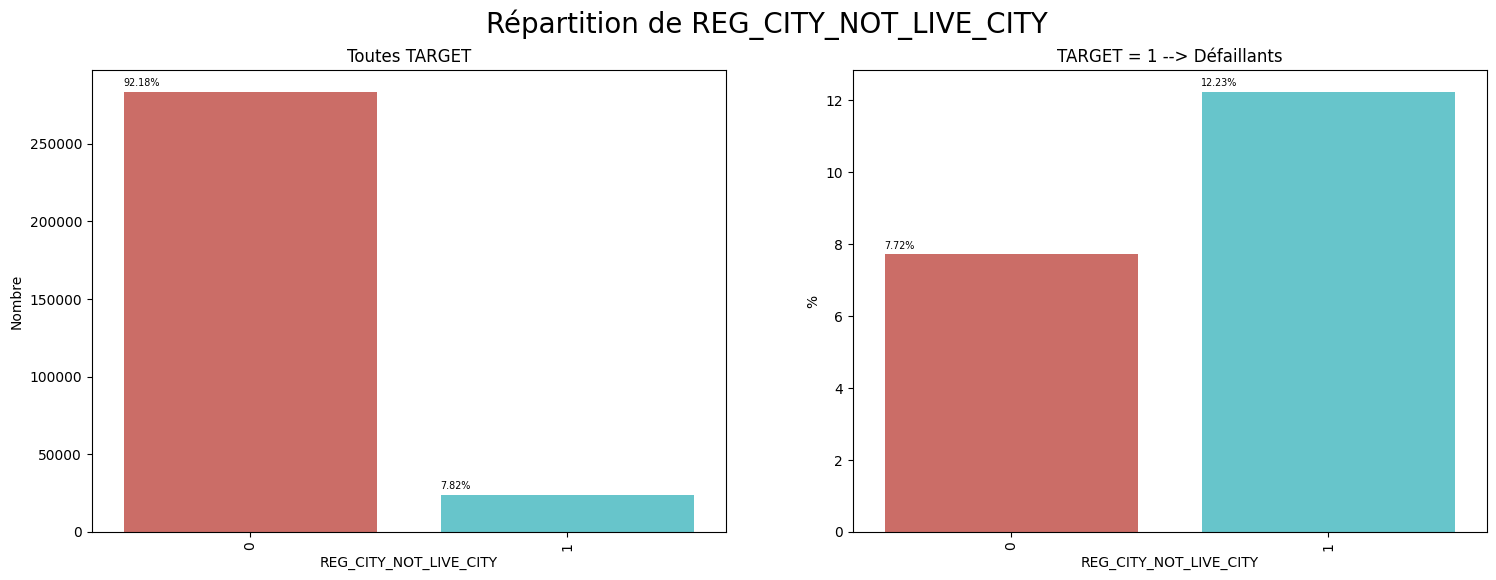

/Users/maxime/Formation Data Scientist /Projets /test/Fonctions/fct_data.py:456: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
/Users/maxime/Formation Data Scientist /Projets /test/Fonctions/fct_data.py:478: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


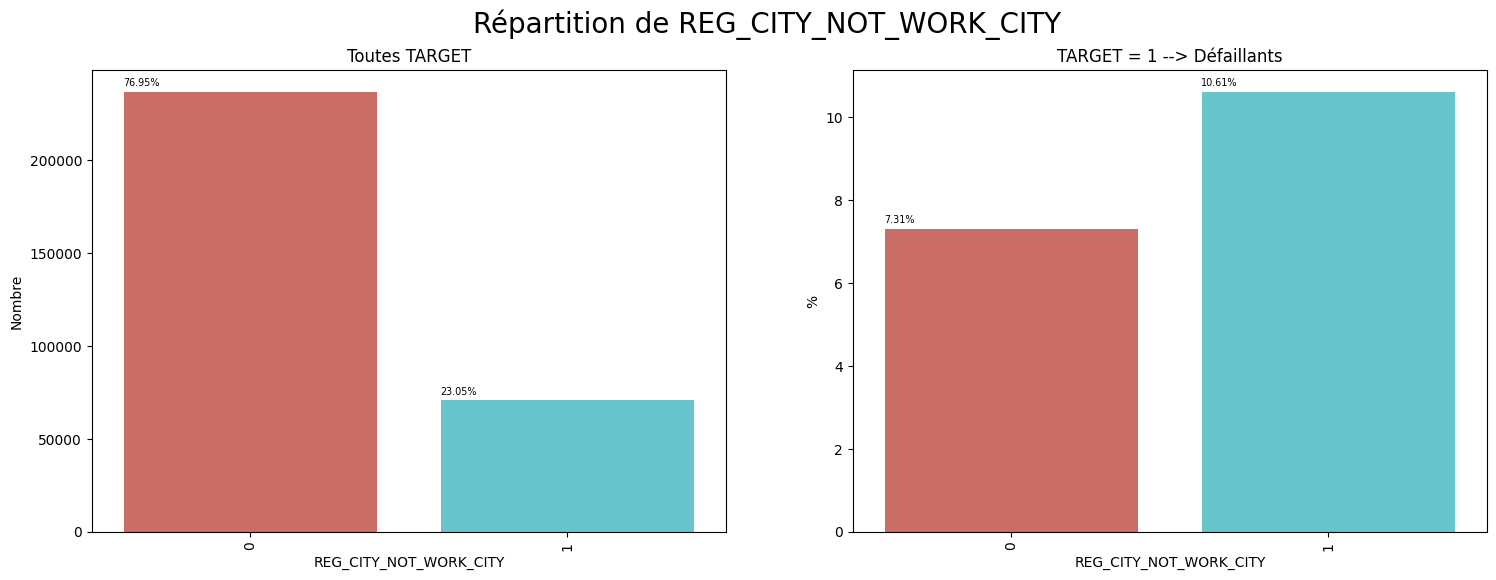

/Users/maxime/Formation Data Scientist /Projets /test/Fonctions/fct_data.py:456: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
/Users/maxime/Formation Data Scientist /Projets /test/Fonctions/fct_data.py:478: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


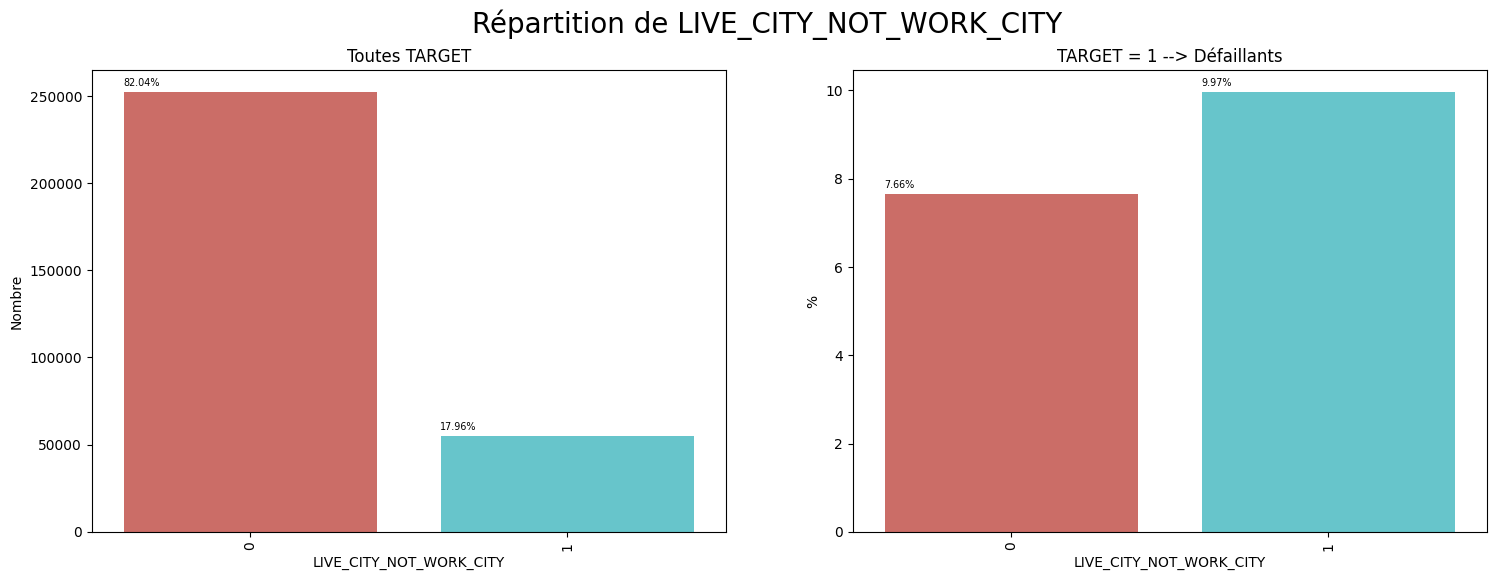

In [21]:
# Visualisation de la répartion des valeurs : 

for var in ls_var: 
    
    fct_data.repartition_var_categorielle(
        data=df, 
        var_categorielle=var
    )

del var, ls_var

D'après les 3 graphiques précédents : 
- Il n'y a qu'une minorité de demandeurs dont les adresses ne correspondent pas.
- Concernant les personnes ayant du mal a rembourser leur prêt, la tendance est inverse. 

        --> Globalement le risque de défaillance est plus élevé chez les personnes ayant des adresses permanentes différentes de leurs adresses de contact. 



#### 3.1.9. <a id='toc3_1_9_'></a>[Variables EXT_SOURCE_1, EXT_SOURCE_2 et EXT_SOURCE_3](#toc0_)
Ces trois variables possèdent des scores normalisés entre 0 et 1 provenant de différentes sources. (pas d'information sur les sources)

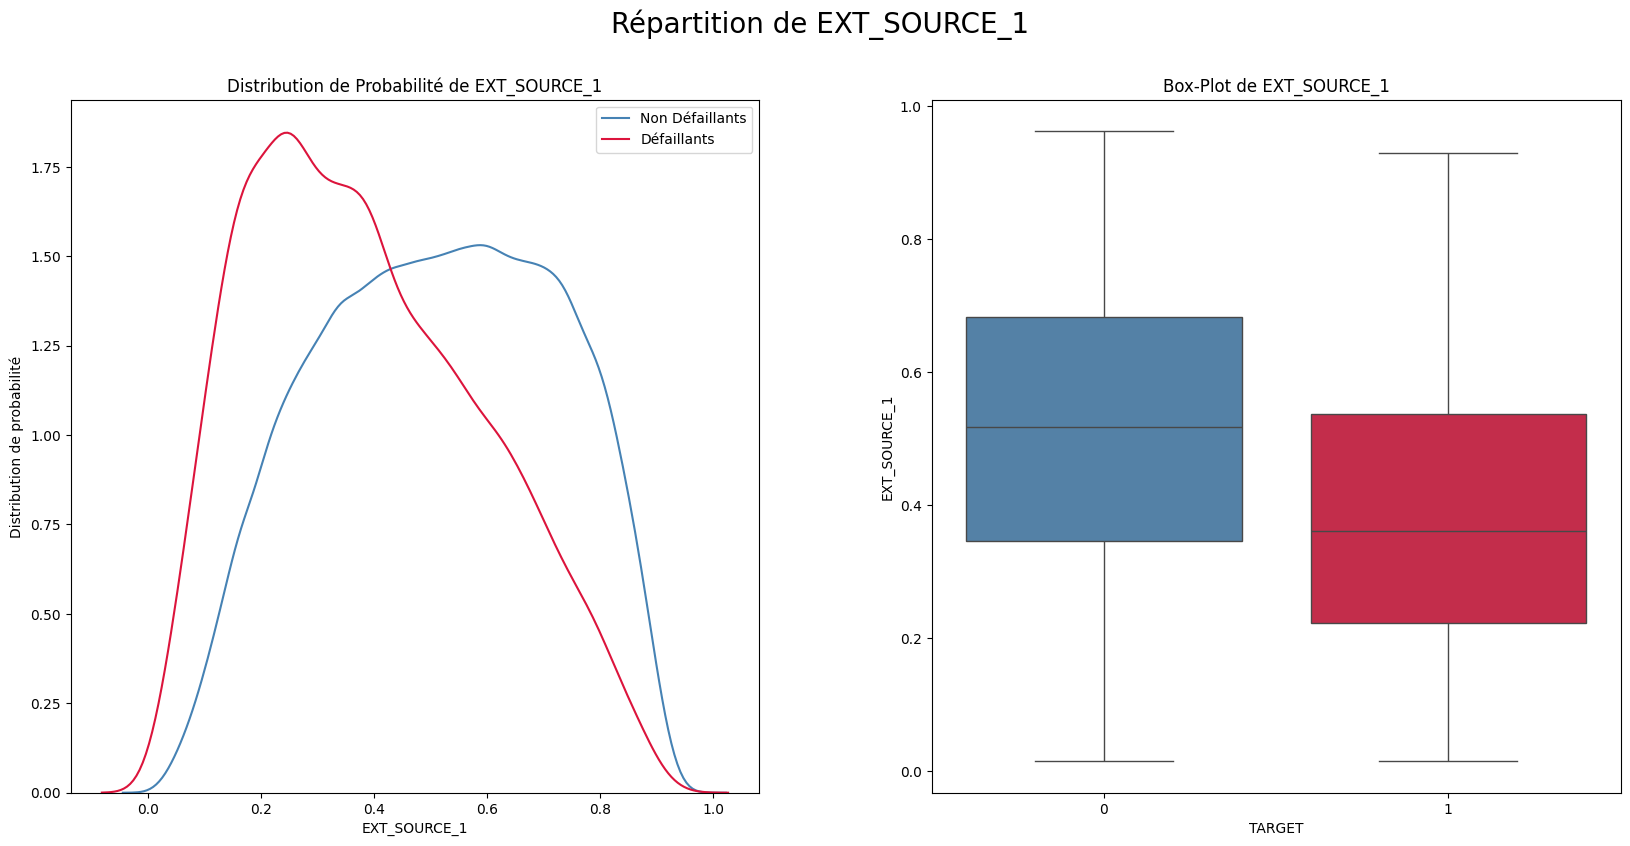

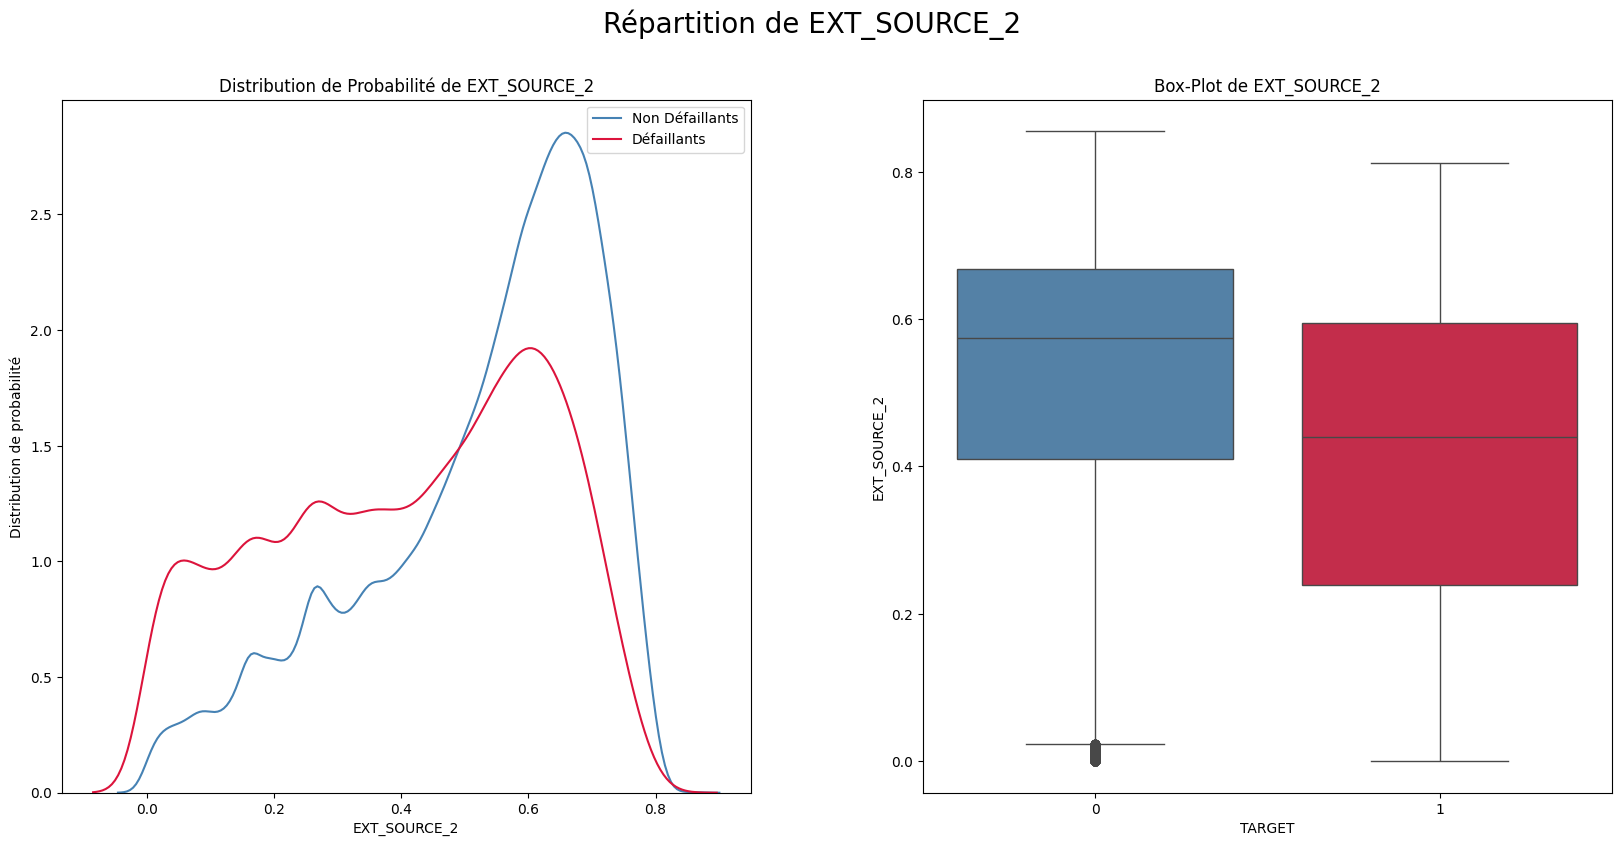

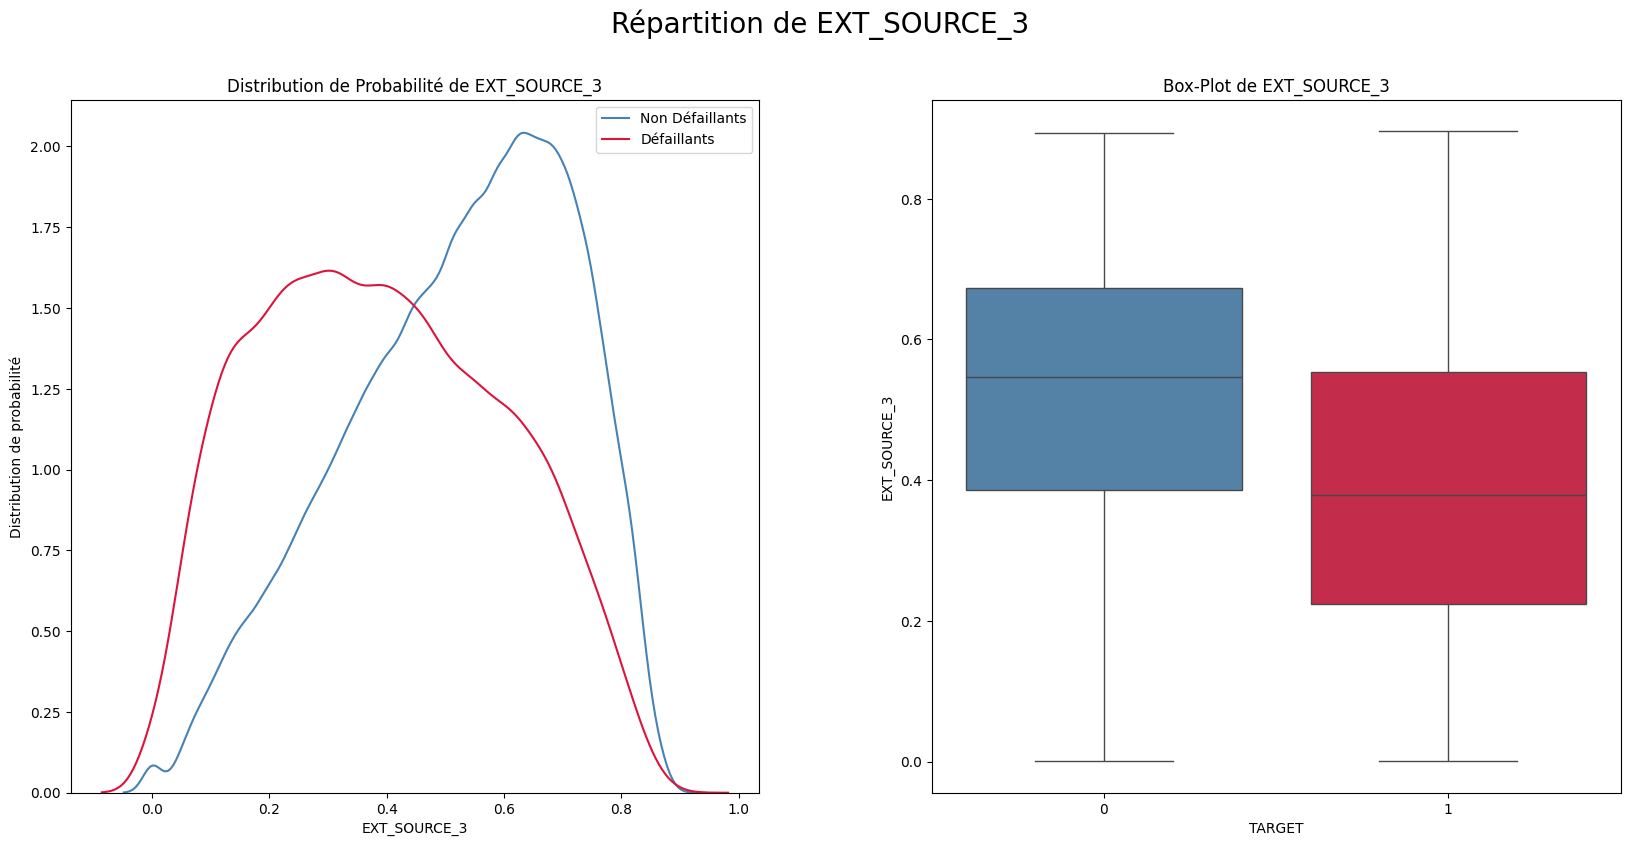

In [22]:
# Visualisation de la répartion des valeurs : 

ls_var = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

for var in ls_var: 
    
    fct_data.graph_variable_continue(
        data=df,
        column_name=var,
        plots=['kde','box'],
    )
    
del var, ls_var

D'après les graphiques précédents : 

Il y a une tendance similaire pour les 3 variables : 
- Des valeurs plus faibles augmentent le risque que le demandeur soit défaillant.
    
Les variables 'EXT_SOURCE_1' et 'EXT_SOURCE_3' semble mieux séparer les défaillants des non défaillants que la vairbale 'EXT_SOURCE_2'.


#### 3.1.10. <a id='toc3_1_10_'></a>[Variable DAY_BIRTH](#toc0_)
Cette variable donne l'âge du demandeur en jour au moment de la demande.

In [23]:
# Création d'une variable AGE_YEARS représentant l'âge en année du demandeur : 
df['AGE_YEARS'] = df['DAYS_BIRTH'] / -365

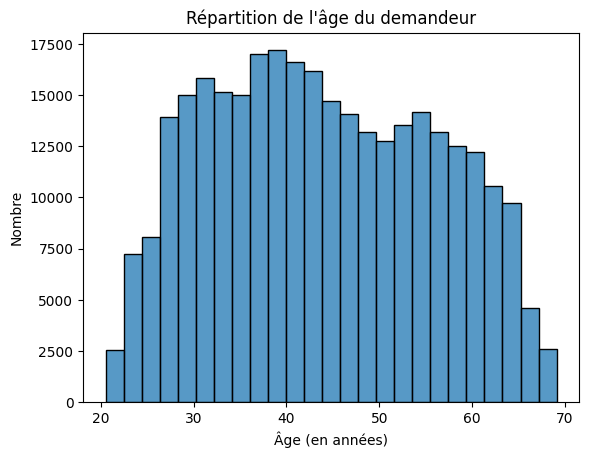

In [24]:
# Répartion de la variable : 

plt.figure()

sns.histplot(
    data=df['AGE_YEARS'],
    bins=25,
)

plt.title("Répartition de l'âge du demandeur")
plt.xlabel('Âge (en années)')
plt.ylabel('Nombre')

plt.show()

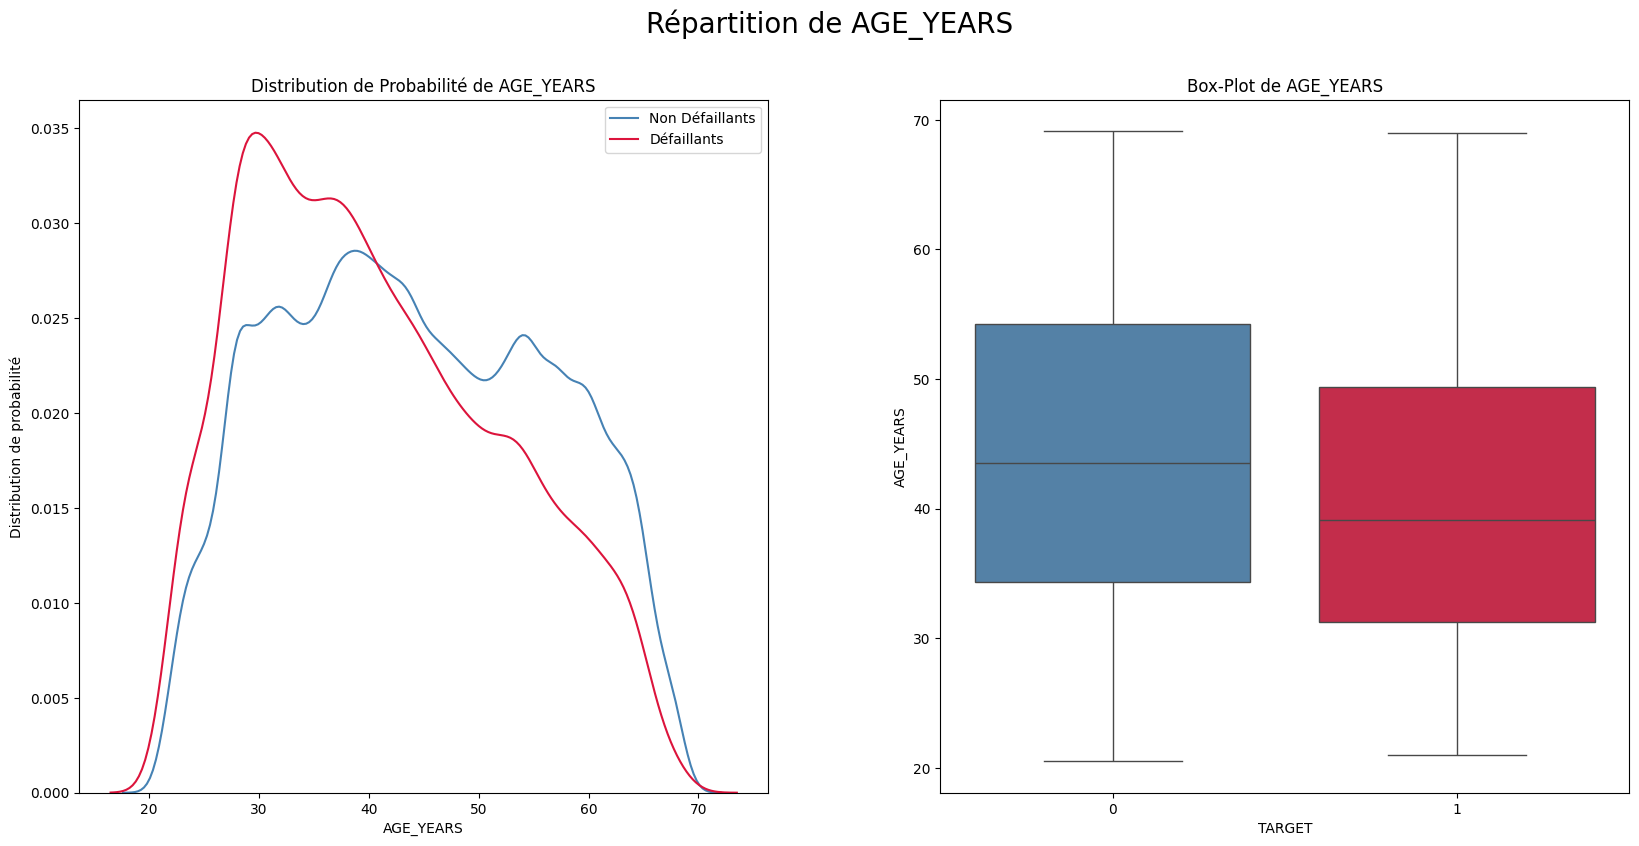

In [25]:
# Visualisation de la répartion des valeurs : 

fct_data.graph_variable_continue(
    data=df,
    column_name='AGE_YEARS',
    plots=['kde','box'],
    )

D'parès les graphiques précédents : 

- Le pic d'âge des défaillants se situe aux alentours de 30 ans. 
- En règle dénéral, les défaillants sont plus jeunes que les non défaillants: 
    - Médiane d'âge des défaillants : environ 40 ans
    - Médiane d'âges des non défaillans environ 44 ans



### 3.2. <a id='toc3_2_'></a>[Application_test](#toc0_)

Le DataFrame application_test est similaire à application_train (sans la variable TARGET qui devra être prédite)

In [26]:
# Récupération du DataFrame : 
df = dataframes['application_test'].copy()

Dimmension du DataFrame : (48744, 121)
----------------------------------------------------------------------------------------------------
Nombre de lignes dupliquées : 0
----------------------------------------------------------------------------------------------------
Information sur les types de variables :


Data_type
Nom_de_colonne                        
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OWN_CAR_AGE                    float64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL                       int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGION       int64
LIVE_REGION_NOT_WORK_REGION      int64
REG_CITY_NOT_LIVE_CITY           int64
REG_CITY_NOT_WORK_CITY           int64
LIVE_CITY_NOT_WORK_CITY          int64
ORGANIZATION_TYPE               object
EXT_SOURCE_1                   float64
EXT_SOURCE_2                   float64
EXT_SOURCE_3                   float64
APARTMENTS_AVG                 float64
BASEMENTAREA_AVG               float64
YEARS_BEGINEXPLUATATION_AVG    float64
YEARS_BUILD_AVG                float64
COMMONAREA_AVG                 float64
ELEVATORS_AVG                  float64
ENTRANCES_AVG                  float64
FLOORSMAX_AVG                  float64
FLOORSMIN_AVG                  float64
LANDAREA_AVG                   float64
LIVINGAPARTMENTS_AVG           float64
LIVINGAREA_AVG                 float64
NONLIVINGAPARTMENTS_AVG        float64
NONLIVINGAREA_AVG              float64
APARTMENTS_MODE                float64
BASEMENTAREA_MODE              float64
YEARS_BEGINEXPLUATATION_MODE   float64
YEARS_BUILD_MODE               float64
COMMONAREA_MODE                float64
ELEVATORS_MODE                 float64
ENTRANCES_MODE                 float64
FLOORSMAX_MODE                 float64
FLOORSMIN_MODE                 float64
LANDAREA_MODE                  float64
LIVINGAPARTMENTS_MODE          float64
LIVINGAREA_MODE                float64
NONLIVINGAPARTMENTS_MODE       float64
NONLIVINGAREA_MODE             float64
APARTMENTS_MEDI                float64
BASEMENTAREA_MEDI              float64
YEARS_BEGINEXPLUATATION_MEDI   float64
YEARS_BUILD_MEDI               float64
COMMONAREA_MEDI                float64
ELEVATORS_MEDI                 float64
ENTRANCES_MEDI                 float64
FLOORSMAX_MEDI                 float64
FLOORSMIN_MEDI                 float64
LANDAREA_MEDI                  float64
LIVINGAPARTMENTS_MEDI          float64
LIVINGAREA_MEDI                float64
NONLIVINGAPARTMENTS_MEDI       float64
NONLIVINGAREA_MEDI             float64
FONDKAPREMONT_MODE              object
HOUSETYPE_MODE                  object
TOTALAREA_MODE                 float64
WALLSMATERIAL_MODE              object
EMERGENCYSTATE_MODE             object
OBS_30_CNT_SOCIAL_CIRCLE       float64
DEF_30_CNT_SOCIAL_CIRCLE       float64
OBS_60_CNT_SOCIAL_CIRCLE       float64
DEF_60_CNT_SOCIAL_CIRCLE       float64
DAYS_LAST_PHONE_CHANGE         float64
FLAG_DOCUMENT_2                  int64
FLAG_DOCUMENT_3                  int64
FLAG_DOCUMENT_4                  int64
FLAG_DOCUMENT_5                  int64
FLAG_DOCUMENT_6                  int64
FLAG_DOCUMENT_7                  int64
FLAG_DOCUMEN

----------------------------------------------------------------------------------------------------
Répartition des types de variables :


Data_type  Nombre par type de variable  % des types de variable
0   float64                           65                53.719008
1     int64                           40                33.057851
2    object                           16                13.223140

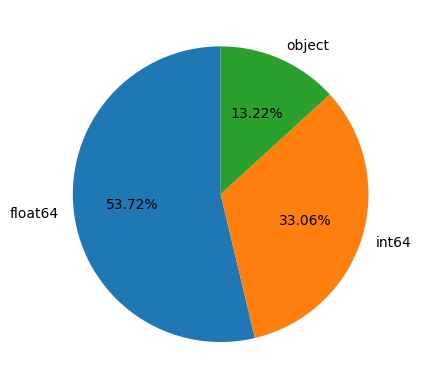

----------------------------------------------------------------------------------------------------


In [27]:
# Visualisation des informations sur les variables du dataframes : 
fct_data.info_variables(
    df=df,
    )

In [28]:
# Visualisation des statistiques descriptives : 
fct_data.describe_dataframe(
    df=df,
)

Statistiques descriptives des colonnes numériques : 



SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   48744.000000  48744.000000      4.874400e+04  4.874400e+04   
mean   277796.676350      0.397054      1.784318e+05  5.167404e+05   
std    103169.547296      0.709047      1.015226e+05  3.653970e+05   
min    100001.000000      0.000000      2.694150e+04  4.500000e+04   
25%    188557.750000      0.000000      1.125000e+05  2.606400e+05   
50%    277549.000000      0.000000      1.575000e+05  4.500000e+05   
75%    367555.500000      1.000000      2.250000e+05  6.750000e+05   
max    456250.000000     20.000000      4.410000e+06  2.245500e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   48720.000000     4.874400e+04                48744.000000   
mean    29426.240209     4.626188e+05                    0.021226   
std     16016.368315     3.367102e+05                    0.014428   
min      2295.000000     4.500000e+04                    0.000253   
25%     17973.000000     2.250000e+05                    0.010006   
50%     26199.000000     3.960000e+05                    0.018850   
75%     37390.500000     6.300000e+05                    0.028663   
max    180576.000000     2.245500e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  48744.000000   48744.000000       48744.000000     48744.000000   
mean  -16068.084605   67485.366322       -4967.652716     -3051.712949   
std     4325.900393  144348.507136        3552.612035      1569.276709   
min   -25195.000000  -17463.000000      -23722.000000     -6348.000000   
25%   -19637.000000   -2910.000000       -7459.250000     -4448.000000   
50%   -15785.000000   -1293.000000       -4490.000000     -3234.000000   
75%   -12496.000000    -296.000000       -1901.000000     -1706.000000   
max    -7338.000000  365243.000000           0.000000         0.000000   

        OWN_CAR_AGE    FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
count  16432.000000  48744.000000    48744.000000     48744.000000   
mean      11.786027      0.999979        0.809720         0.204702   
std       11.462889      0.004529        0.392526         0.403488   
min        0.000000      0.000000        0.000000         0.000000   
25%        4.000000      1.000000        1.000000         0.000000   
50%        9.000000      1.000000        1.000000         0.000000   
75%       15.000000      1.000000        1.000000         0.000000   
max       74.000000      1.000000        1.000000         1.000000   

       FLAG_CONT_MOBILE    FLAG_PHONE    FLAG_EMAIL  CNT_FAM_MEMBERS  \
count      48744.000000  48744.000000  48744.000000     48744.000000   
mean           0.998400      0.263130      0.162646         2.146767   
std            0.039971      0.440337      0.369046         0.890423   
min            0.000000      0.000000      0.000000         1.000000   
25%            1.000000      0.000000      0.000000         2.000000   
50%            1.000000      0.000000      0.000000         2.000000   
75%            1.000000      1.000000      0.000000         3.000000   
max            1.000000      1.000000      1.000000        21.000000   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count          48744.000000                 48744.000000   
mean               2.038159                     2.012596   
std                0.522694                     0.515804   
min                1.000000                    -1.000000   
25%                2.000000                     2.000000   
50%                2.000000                     2.000000   
75%                2.000000                     2.000000   
max                3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count             48744.000000                48744.000000   
mean                 12.007365                    0.018833   
std                   3.278172                    0.135937   
min                  

Statistiques descriptives des colonnes catégorielles : 



NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count               48744       48744        48744           48744   
unique                  2           2            2               2   
top            Cash loans           F            N               Y   
freq                48305       32678        32311           33658   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count            47833            48744                          48744   
unique               7                7                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq             39727            24533                          33988   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count               48744              48744           33139   
unique                  5                  6              18   
top               Married  House / apartment        Laborers   
freq                32283              43645            8655   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                       48744                   48744              15947   
unique                          7                      58                  4   
top                       TUESDAY  Business Entity Type 3   reg oper account   
freq                         9751                   10840              12124   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
count            25125              24851               26535  
unique               3                  7                   2  
top     block of flats              Panel                  No  
freq             24659              11269               26179

Nomnbrde valeurs manquantes : 1404419 | Nbre de données : 5898024 | -----> 23.81 % de valeurs manquantes 
----------------------------------------------------------------------------------------------------
Nombre de variables avec des valeurs manquantes : 64/121


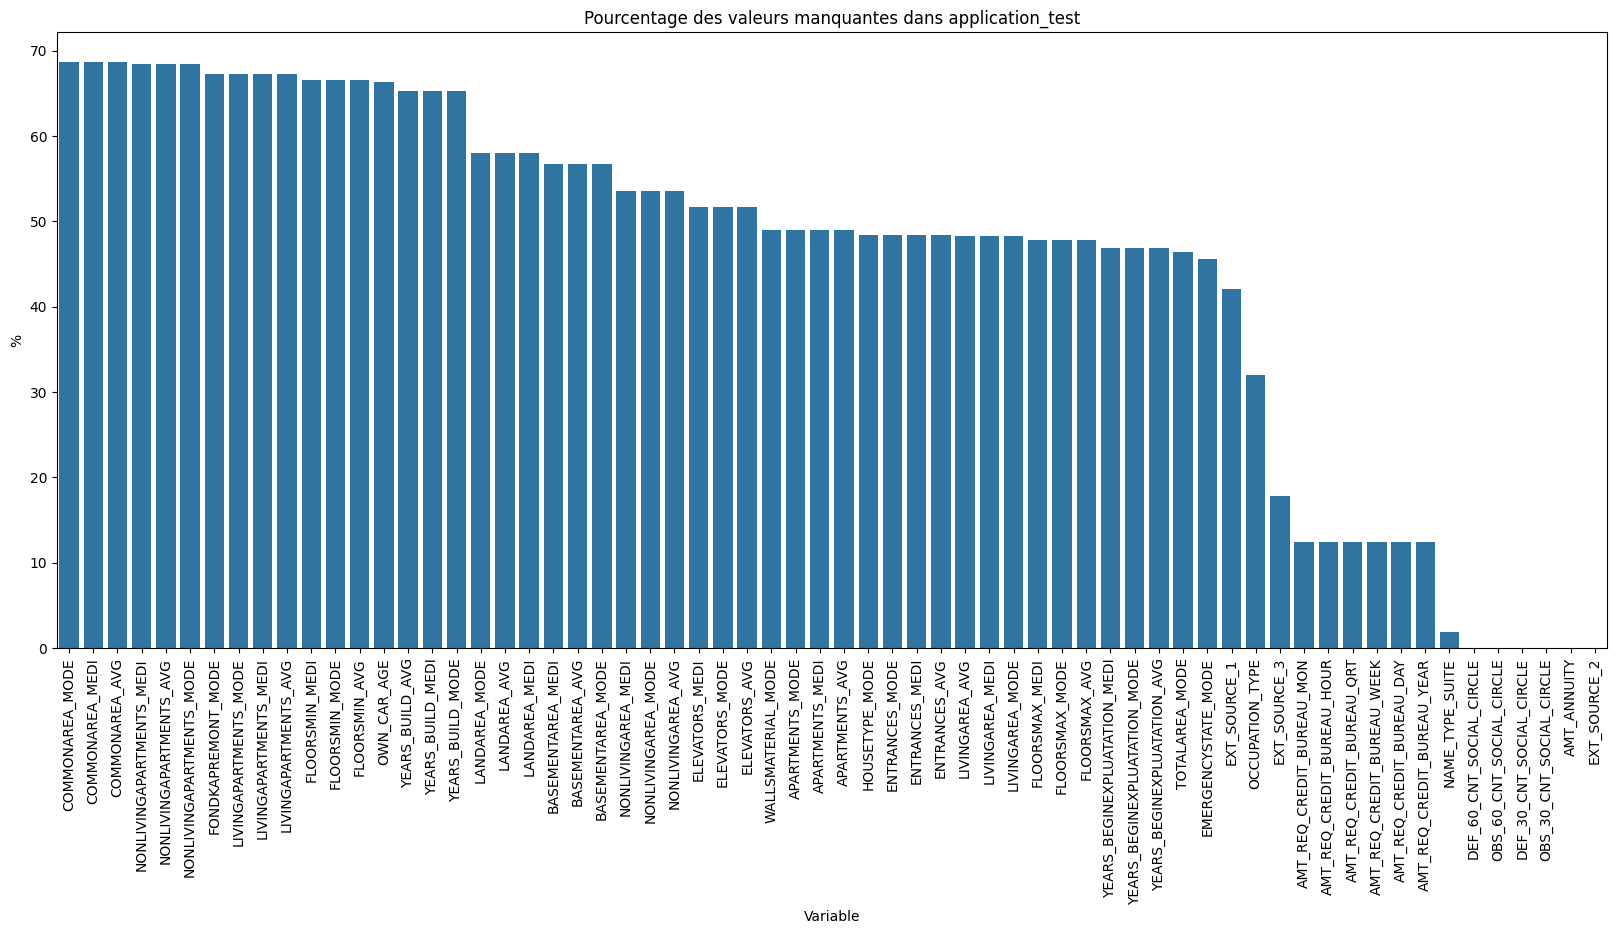

In [29]:
# Visualisation des valeurs manquantes : 

fct_data.valeurs_manquantes(
    df,
    titre_graph='application_test',
    )

Il y à 64 variables sur 121 qui possèdent des valeurs manquantes.  
Tout comme pour application_train, une grande partie de ces colonnes étant liées les unes aux autres (mode, medianne, moyenne pour la même variable)

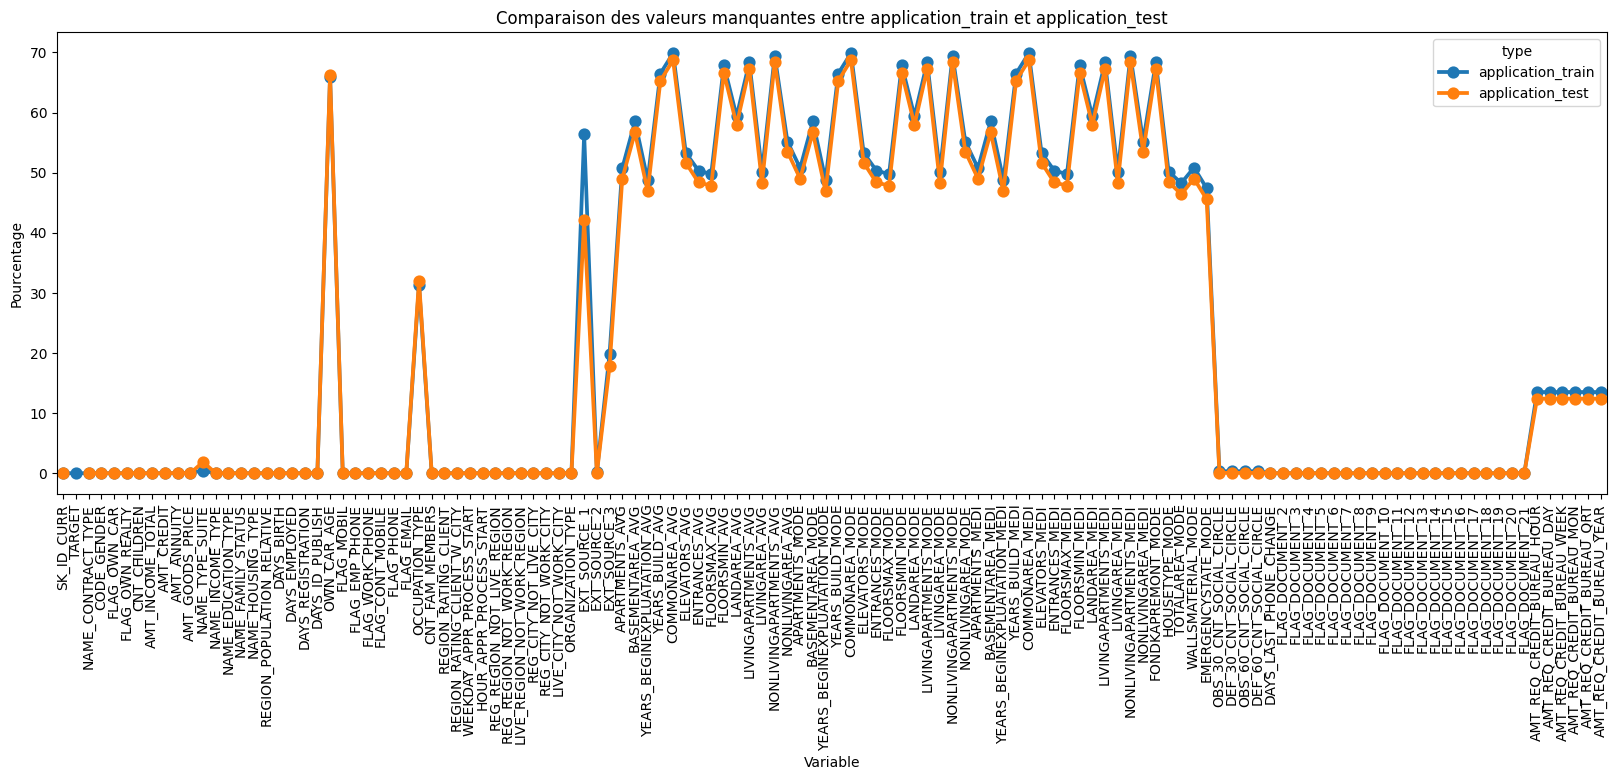

In [30]:
# Comparaison des pourcentages de valeurs manquantes entre les application_train et application_test : 

# 1. Création du DataFrame des pourcentages de valeurs manquantes de application_train :
miss_train = (dataframes['application_train'].isnull().sum() / dataframes['application_train'].shape[0] *100).to_frame('%').reset_index()

# 2. Création du DataFrame des pourcentages de valeurs manquantes de application_test :
miss_test = (dataframes['application_test'].isnull().sum() / dataframes['application_test'].shape[0] *100).to_frame('%').reset_index()

# 3. Création d'un DataFrame Commun : 
miss_train['type'] = 'application_train'
miss_test['type'] = 'application_test'
missing = pd.concat([miss_train, miss_test], axis=0)

# 4. Création du graphique de comparaison : 
plt.figure(figsize=(20,6))

sns.pointplot(
    data=missing,
    x='index',
    y='%',
    hue='type', 
)

plt.xticks(rotation=90)
plt.xlabel('Variable')
plt.ylabel('Pourcentage')
plt.title('Comparaison des valeurs manquantes entre application_train et application_test')

plt.show()

del miss_test, miss_train, missing


Le nombre de valeurs manquantes pour chaque variable est quasiment similaire dans les deux DataFrames.

### 3.3. <a id='toc3_3_'></a>[Bureau](#toc0_)
Le DataFrame bureau comprend tous les <u>antécédents de crédit antérieurs du demandeur auprès d'institutions financières autres que le Home Credit Group</u>, qui ont été signalés par le bureau de crédit.
#### 3.3.1. <a id='toc3_3_1_'></a>[Généralités](#toc0_)

In [31]:
# Récupération du DataFrame : 
df = dataframes['bureau'].copy()

df.head(5)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

Dimmension du DataFrame : (1716428, 17)
----------------------------------------------------------------------------------------------------
Nombre de lignes dupliquées : 0
----------------------------------------------------------------------------------------------------
Information sur les types de variables :


Data_type
Nom_de_colonne                  
SK_ID_CURR                 int64
SK_ID_BUREAU               int64
CREDIT_ACTIVE             object
CREDIT_CURRENCY           object
DAYS_CREDIT                int64
CREDIT_DAY_OVERDUE         int64
DAYS_CREDIT_ENDDATE      float64
DAYS_ENDDATE_FACT        float64
AMT_CREDIT_MAX_OVERDUE   float64
CNT_CREDIT_PROLONG         int64
AMT_CREDIT_SUM           float64
AMT_CREDIT_SUM_DEBT      float64
AMT_CREDIT_SUM_LIMIT     float64
AMT_CREDIT_SUM_OVERDUE   float64
CREDIT_TYPE               object
DAYS_CREDIT_UPDATE         int64
AMT_ANNUITY              float64

----------------------------------------------------------------------------------------------------
Répartition des types de variables :


Data_type  Nombre par type de variable  % des types de variable
0   float64                            8                47.058824
1     int64                            6                35.294118
2    object                            3                17.647059

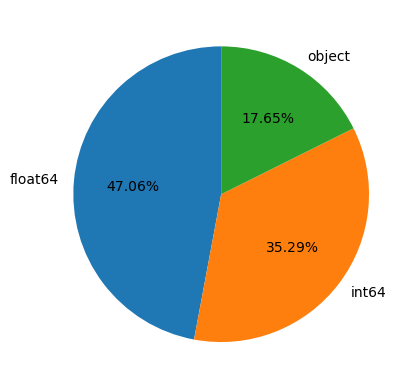

----------------------------------------------------------------------------------------------------


In [32]:
# Visualisation des informations sur les variables du dataframes : 
fct_data.info_variables(
    df=df,
    )

In [33]:
# Visualisation des statistiques descriptives : 
fct_data.describe_dataframe(
    df=df,
)

Statistiques descriptives des colonnes numériques : 



SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06   
mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01   
std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01   
min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00   
25%    1.888668e+05  5.463954e+06 -1.666000e+03        0.000000e+00   
50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00   
75%    3.674260e+05  6.385681e+06 -4.740000e+02        0.000000e+00   
max    4.562550e+05  6.843457e+06  0.000000e+00        2.792000e+03   

       DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
count         1.610875e+06       1.082775e+06            5.919400e+05   
mean          5.105174e+02      -1.017437e+03            3.825418e+03   
std           4.994220e+03       7.140106e+02            2.060316e+05   
min          -4.206000e+04      -4.202300e+04            0.000000e+00   
25%          -1.138000e+03      -1.489000e+03            0.000000e+00   
50%          -3.300000e+02      -8.970000e+02            0.000000e+00   
75%           4.740000e+02      -4.250000e+02            0.000000e+00   
max           3.119900e+04       0.000000e+00            1.159872e+08   

       CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
count        1.716428e+06    1.716415e+06         1.458759e+06   
mean         6.410406e-03    3.549946e+05         1.370851e+05   
std          9.622391e-02    1.149811e+06         6.774011e+05   
min          0.000000e+00    0.000000e+00        -4.705600e+06   
25%          0.000000e+00    5.130000e+04         0.000000e+00   
50%          0.000000e+00    1.255185e+05         0.000000e+00   
75%          0.000000e+00    3.150000e+05         4.015350e+04   
max          9.000000e+00    5.850000e+08         1.701000e+08   

       AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  DAYS_CREDIT_UPDATE  \
count          1.124648e+06            1.716428e+06        1.716428e+06   
mean           6.229515e+03            3.791276e+01       -5.937483e+02   
std            4.503203e+04            5.937650e+03        7.207473e+02   
min           -5.864061e+05            0.000000e+00       -4.194700e+04   
25%            0.000000e+00            0.000000e+00       -9.080000e+02   
50%            0.000000e+00            0.000000e+00       -3.950000e+02   
75%            0.000000e+00            0.000000e+00       -3.300000e+01   
max            4.705600e+06            3.756681e+06        3.720000e+02   

        AMT_ANNUITY  
count  4.896370e+05  
mean   1.571276e+04  
std    3.258269e+05  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    1.350000e+04  
max    1.184534e+08

Statistiques descriptives des colonnes catégorielles : 



CREDIT_ACTIVE CREDIT_CURRENCY      CREDIT_TYPE
count        1716428         1716428          1716428
unique             4               4               15
top           Closed      currency 1  Consumer credit
freq         1079273         1715020          1251615

Nomnbrde valeurs manquantes : 3939947 | Nbre de données : 29179276 | -----> 13.5 % de valeurs manquantes 
----------------------------------------------------------------------------------------------------
Nombre de variables avec des valeurs manquantes : 7/17


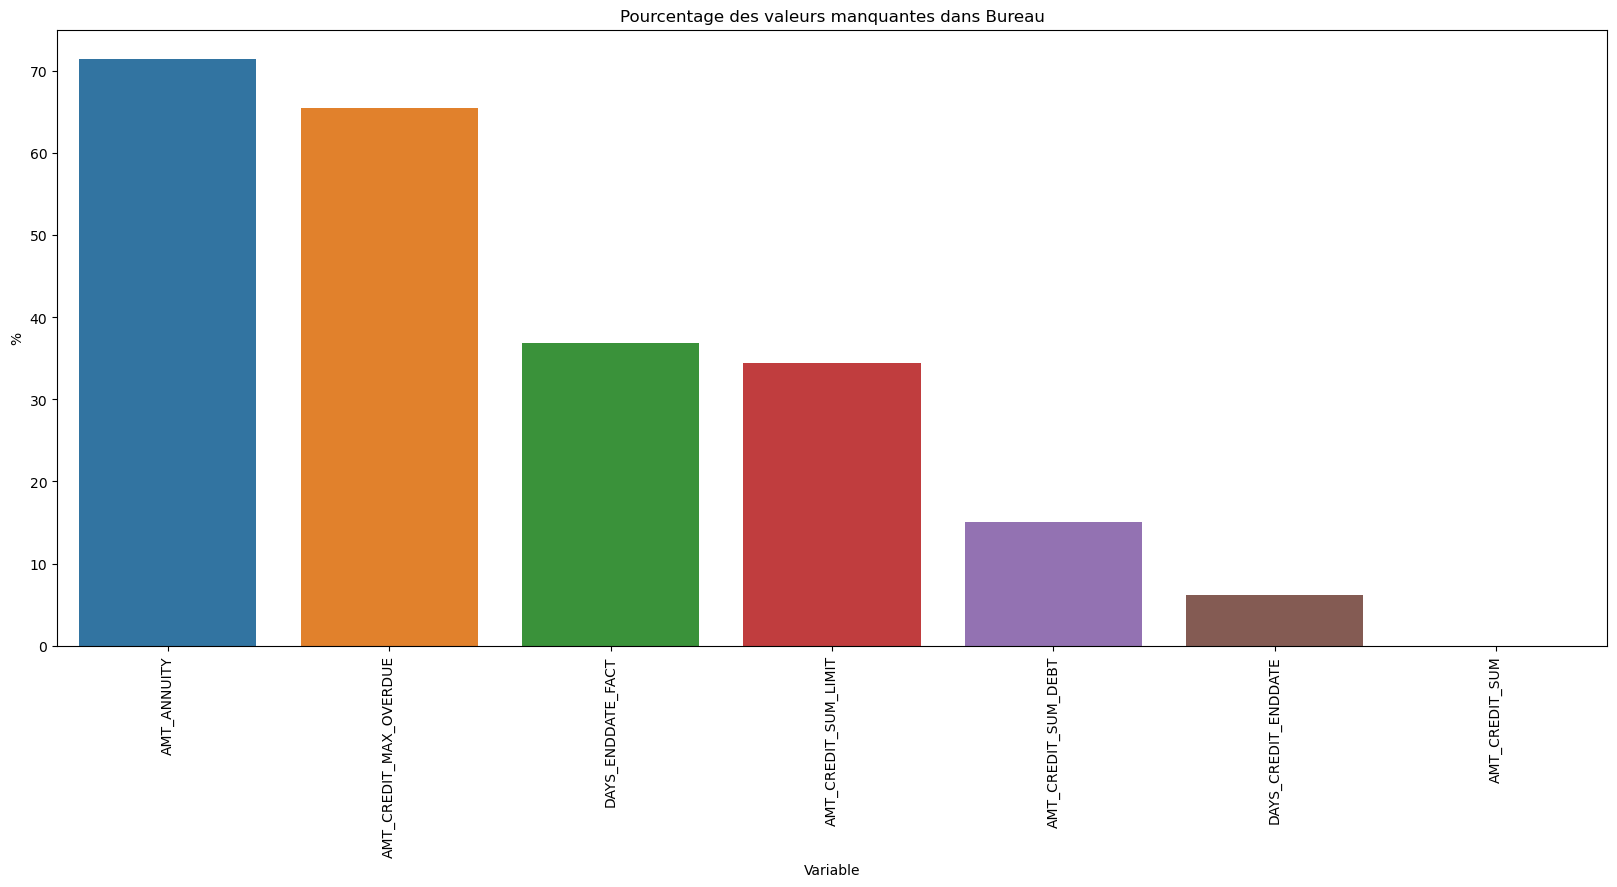

In [34]:
# Visualisation des valeurs manquantes : 

fct_data.valeurs_manquantes(
    df,
    titre_graph='Bureau',
    )

#### 3.3.2. <a id='toc3_3_2_'></a>[Matrice de corrélation Phi-K](#toc0_)

In [35]:
# Ajout de la variable cible : 

df = dataframes['application_train'].iloc[:, :2].merge(df,
                                                    on='SK_ID_CURR',
                                                    how='left')

df.head()

SK_ID_CURR  TARGET  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  \
0      100002       1     6158904.0        Closed      currency 1   
1      100002       1     6158905.0        Closed      currency 1   
2      100002       1     6158906.0        Closed      currency 1   
3      100002       1     6158907.0        Closed      currency 1   
4      100002       1     6158908.0        Closed      currency 1   

   DAYS_CREDIT  CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0      -1125.0                 0.0              -1038.0            -1038.0   
1       -476.0                 0.0                  NaN              -48.0   
2      -1437.0                 0.0              -1072.0            -1185.0   
3      -1121.0                 0.0               -911.0             -911.0   
4       -645.0                 0.0                 85.0              -36.0   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                 0.0         40761.0   
1                     NaN                 0.0             0.0   
2                   0.000                 0.0        135000.0   
3                3321.000                 0.0         19071.0   
4                5043.645                 0.0        120735.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  NaN                   NaN                     0.0   
1                  0.0                   NaN                     0.0   
2                  0.0                   0.0                     0.0   
3                  NaN                   NaN                     0.0   
4                  0.0                   0.0                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0      Credit card             -1038.0          0.0  
1      Credit card               -47.0          NaN  
2  Consumer credit             -1185.0          0.0  
3  Consumer credit              -906.0          0.0  
4  Consumer credit               -34.0          0.0

--------------------------------------------------


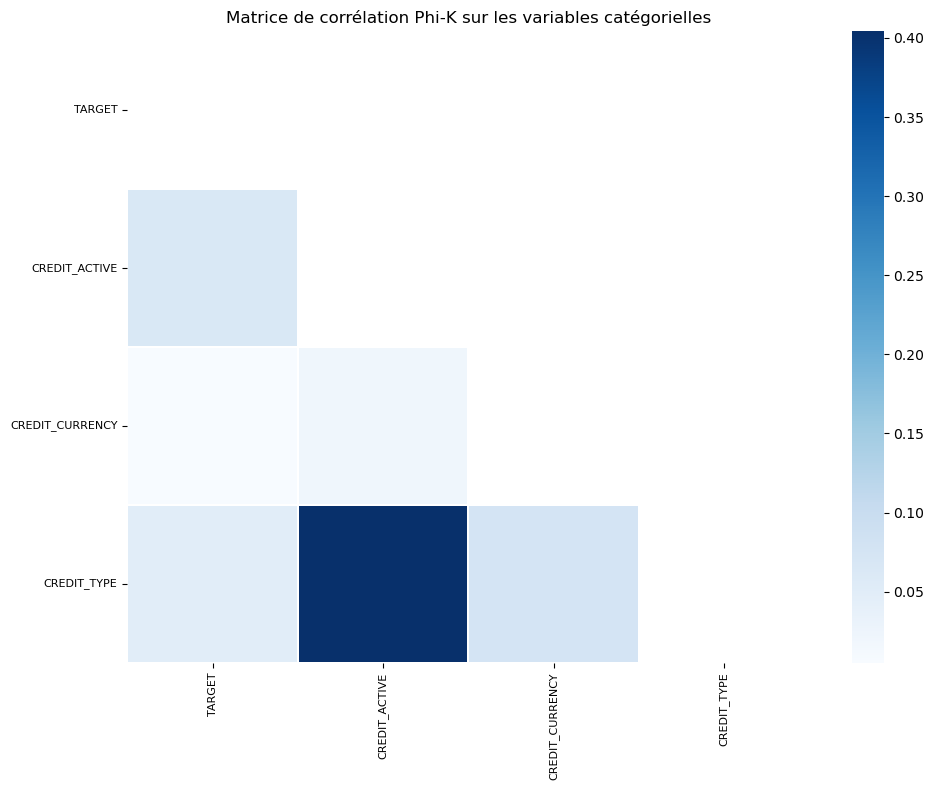

--------------------------------------------------
Les catégories possédant les valeurs de corrélation Phi-K les plus élevées avec la variable cible sont : 


Variables  Phik-Correlation
0    CREDIT_ACTIVE          0.064481
2      CREDIT_TYPE          0.049954
1  CREDIT_CURRENCY          0.004993

--------------------------------------------------


In [36]:
# Tracé de la matrice de corrélation Phi-K : 

var_categorielles = df.dtypes[df.dtypes == 'object'].index.tolist()
var_categorielles.insert(0, 'TARGET')

fct_data.plot_phik_matrix(
    data=df,
    categorical_columns=var_categorielles,
    figsize=(10,8),
    fontsize=8,
    )

Les variables CREDT_ACTIVE et CREDIT_TYPE semblent très fortement corrélées.  
Au global les variables catégorielles de Bureau de sont que tès peu corrélées avec la TARGET.

#### 3.3.3. <a id='toc3_3_3_'></a>[Matrice de corrélation](#toc0_)

In [37]:
# Récupération de la liste des variables numériques : 

var_numeriques = [col for col in df.columns if col not in var_categorielles]
var_numeriques.remove('SK_ID_CURR')
var_numeriques.remove('SK_ID_BUREAU')

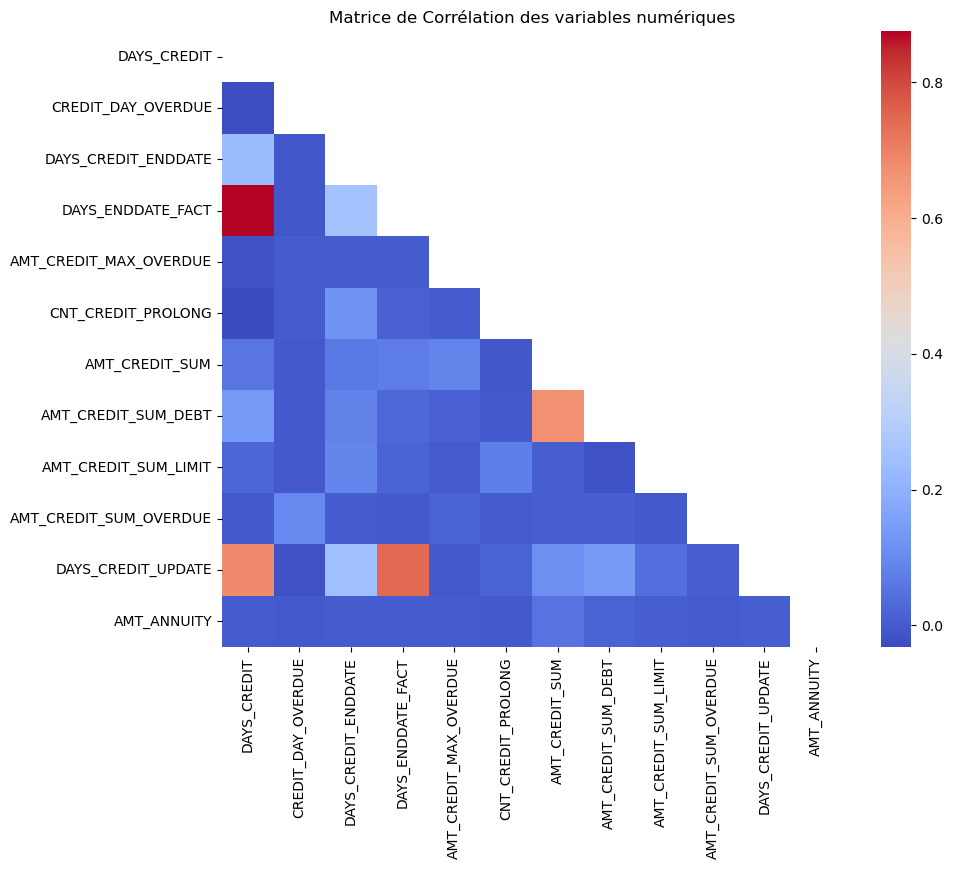

In [38]:
# Tracé de la matrice de corrélation ; 
fct_data.correlation_matrix(
    data=df, 
    var_num=var_numeriques,
    figsize=(10,8) 
)

In [39]:
# Visualisation des meilleures corrélations entre les variables numériques et la cible : 

fct_data.top_correlation_var_num_target(
    data=df, 
    var_num=var_numeriques,
    target='TARGET',
)

interval columns not set, guessing: ['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY', 'TARGET']
Les variables numériques possèdant les valeurs de corrélation Phik les plus élevées avec la variable cible sont : 


Variable  Phik-Correlation
0              DAYS_CREDIT          0.088651
2      DAYS_CREDIT_ENDDATE          0.018980
9   AMT_CREDIT_SUM_OVERDUE          0.005654
8     AMT_CREDIT_SUM_LIMIT          0.005192
4   AMT_CREDIT_MAX_OVERDUE          0.004280
5       CNT_CREDIT_PROLONG          0.003862
1       CREDIT_DAY_OVERDUE          0.002528
10      DAYS_CREDIT_UPDATE          0.002219
7      AMT_CREDIT_SUM_DEBT          0.001695
6           AMT_CREDIT_SUM          0.000670

Il y a une forte corrélation entre les variables : 
- DAYS_CREDIT, DAYS_CREDIT_UPDATE et DAYS_ENDDATE_FACT
- AMT_CREDIT_SUM_DEBT et AMT_CREDIT_SUM 

Tout comme les variables repérés dans application_train, la variable DAYS_CREDIT possède une corrélation correcte avec la cible.

#### 3.3.4. <a id='toc3_3_4_'></a>[Variable DAYS_CREDIT](#toc0_)
Cette variable décrit le nombre de jours avant la demande actuelle, lorsque le demaneur a fait une demande de crédit au bureau de crédit.

In [40]:
# Transformation en années à partir du nombre de jours : 
df['YEARS_CREDIT'] = - df['DAYS_CREDIT'] / 365

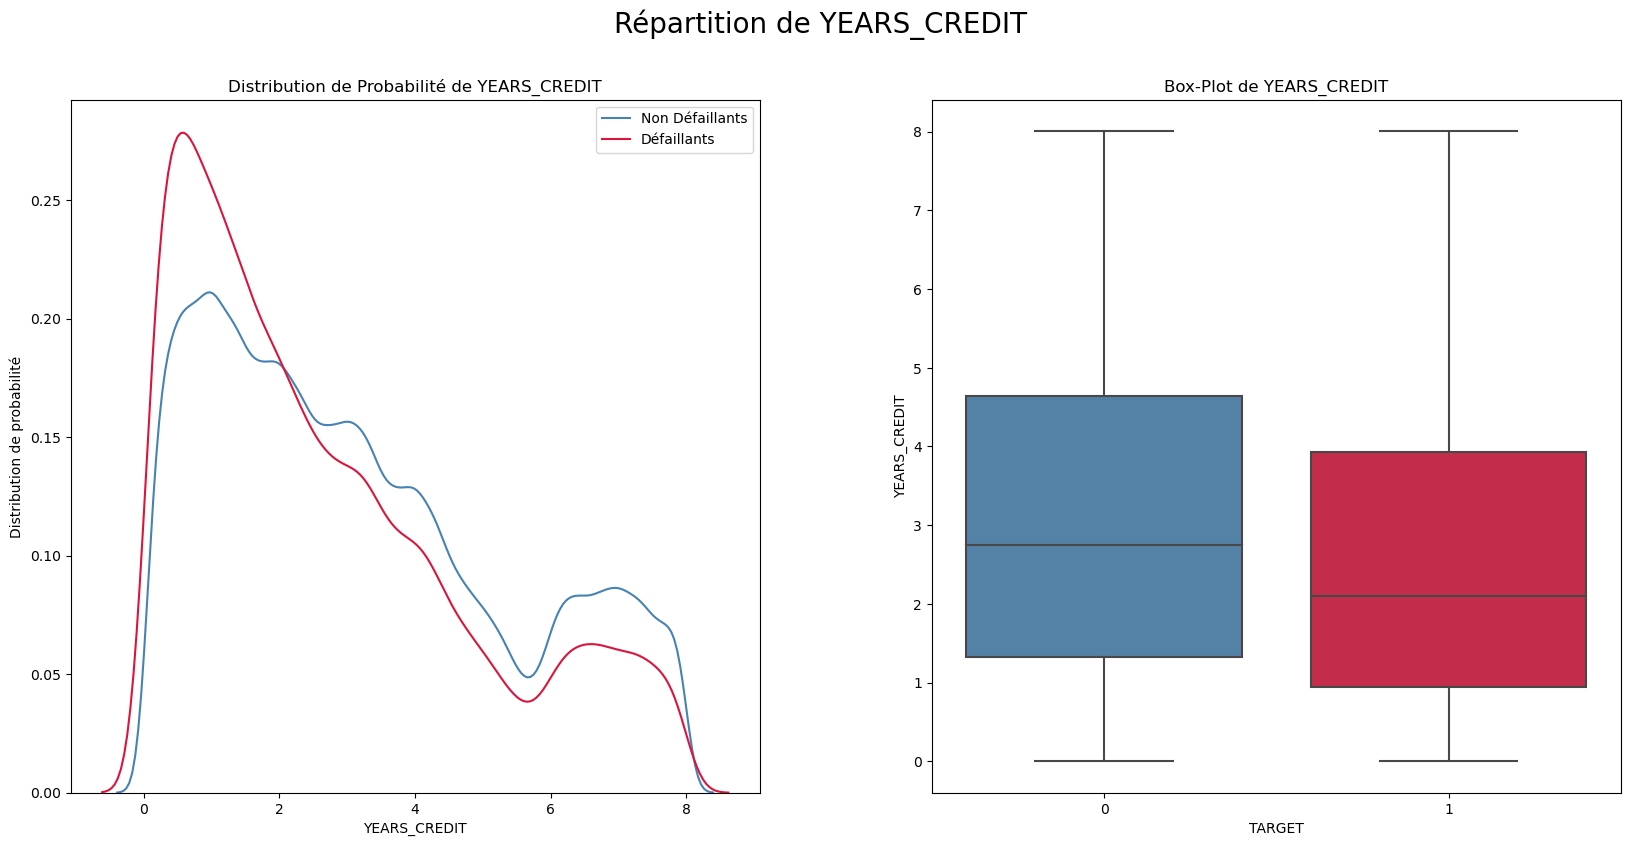

In [41]:
# Visualisation de la répartion des valeurs : 

fct_data.graph_variable_continue(
    data=df,
    column_name='YEARS_CREDIT',
    plots=['kde','box'],
    )

Les défaillants ont généralement moins d'années de crédit que les non-défaillants.

### 3.4. <a id='toc3_4_'></a>[Bureau_balance](#toc0_)
Le DataFrame bureau_balance est constitué du solde mensuel de chaque crédit pour chacun des crédits précédents que le demandeur a eu avec des institutions financières autres que Home Credit.
#### 3.4.1. <a id='toc3_4_1_'></a>[Généralités](#toc0_)

In [42]:
# Récupération du DataFrame : 
df = dataframes['bureau_balance'].copy()

df.head(5)

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

Dimmension du DataFrame : (27299925, 3)
----------------------------------------------------------------------------------------------------
Nombre de lignes dupliquées : 0
----------------------------------------------------------------------------------------------------
Information sur les types de variables :


Data_type
Nom_de_colonne          
SK_ID_BUREAU       int64
MONTHS_BALANCE     int64
STATUS            object

----------------------------------------------------------------------------------------------------
Répartition des types de variables :


Data_type  Nombre par type de variable  % des types de variable
0     int64                            2                66.666667
1    object                            1                33.333333

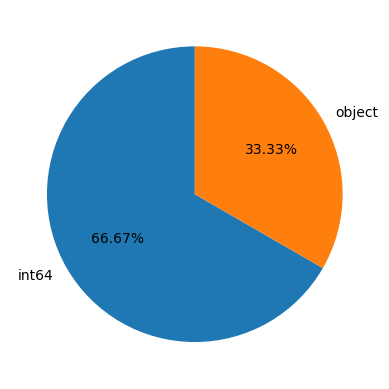

----------------------------------------------------------------------------------------------------


In [43]:
# Visualisation des informations sur les variables du dataframes : 
fct_data.info_variables(
    df=df,
    )

In [44]:
# Visualisation des statistiques descriptives : 
fct_data.describe_dataframe(
    df=df,
)

Statistiques descriptives des colonnes numériques : 



SK_ID_BUREAU  MONTHS_BALANCE
count  2.729992e+07    2.729992e+07
mean   6.036297e+06   -3.074169e+01
std    4.923489e+05    2.386451e+01
min    5.001709e+06   -9.600000e+01
25%    5.730933e+06   -4.600000e+01
50%    6.070821e+06   -2.500000e+01
75%    6.431951e+06   -1.100000e+01
max    6.842888e+06    0.000000e+00

Statistiques descriptives des colonnes catégorielles : 



STATUS
count   27299925
unique         8
top            C
freq    13646993

In [45]:
# Visualisation des valeurs manquantes : 

fct_data.valeurs_manquantes(
    df,
    titre_graph='Bureau_balance',
    )

Nomnbrde valeurs manquantes : 0 | Nbre de données : 81899775 | -----> 0.0 % de valeurs manquantes 
----------------------------------------------------------------------------------------------------
Nombre de variables avec des valeurs manquantes : 0/3


Le DataFrame bureau_balance ne contient que 3 variables : 

- STATUS, le statut mensuel de chacun des prêts précédents pour un demandeur particulier, rapporté par le département du Bureau de crédit : 
    - C signifie fermé,
    - X signifie statut inconnu,
    - 0 signifie pas de DPD,
    - 1 signifie DPD maximal pendant le mois entre 1-30,
    - 2 signifie DPD 31-60,...
    - 5 signifie DPD 120+ ou que vendu ou radié.
- MONTHS_BALANCE, mois du solde par rapport à la date de demande (-1 signifie la date du solde le plus récent)

Le fichier ne contient aucune valeur manquante. 

### 3.5. <a id='toc3_5_'></a>[Credit_card_balance](#toc0_)
Le DataFrame credit_card_balance comprend les données mensuelles relatives à une ou plusieurs cartes de crédit que le demandeur avait auprès de Home Credit Group.

#### 3.5.1. <a id='toc3_5_1_'></a>[Généralités](#toc0_)

In [46]:
# Récupération du DataFrame : 
df = dataframes['credit_card_balance'].copy()

df.head(5)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

Dimmension du DataFrame : (3840312, 23)
----------------------------------------------------------------------------------------------------
Nombre de lignes dupliquées : 0
----------------------------------------------------------------------------------------------------
Information sur les types de variables :


Data_type
Nom_de_colonne                      
SK_ID_PREV                     int64
SK_ID_CURR                     int64
MONTHS_BALANCE                 int64
AMT_BALANCE                  float64
AMT_CREDIT_LIMIT_ACTUAL        int64
AMT_DRAWINGS_ATM_CURRENT     float64
AMT_DRAWINGS_CURRENT         float64
AMT_DRAWINGS_OTHER_CURRENT   float64
AMT_DRAWINGS_POS_CURRENT     float64
AMT_INST_MIN_REGULARITY      float64
AMT_PAYMENT_CURRENT          float64
AMT_PAYMENT_TOTAL_CURRENT    float64
AMT_RECEIVABLE_PRINCIPAL     float64
AMT_RECIVABLE                float64
AMT_TOTAL_RECEIVABLE         float64
CNT_DRAWINGS_ATM_CURRENT     float64
CNT_DRAWINGS_CURRENT           int64
CNT_DRAWINGS_OTHER_CURRENT   float64
CNT_DRAWINGS_POS_CURRENT     float64
CNT_INSTALMENT_MATURE_CUM    float64
NAME_CONTRACT_STATUS          object
SK_DPD                         int64
SK_DPD_DEF                     int64

----------------------------------------------------------------------------------------------------
Répartition des types de variables :


Data_type  Nombre par type de variable  % des types de variable
0   float64                           15                65.217391
1     int64                            7                30.434783
2    object                            1                 4.347826

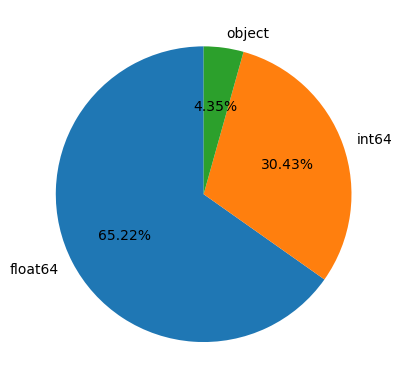

----------------------------------------------------------------------------------------------------


In [47]:
# Visualisation des informations sur les variables du dataframes : 
fct_data.info_variables(
    df=df,
    )

In [48]:
# Visualisation des statistiques descriptives : 
fct_data.describe_dataframe(
    df=df,
)

Statistiques descriptives des colonnes numériques : 



SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE   AMT_BALANCE  \
count  3.840312e+06  3.840312e+06    3.840312e+06  3.840312e+06   
mean   1.904504e+06  2.783242e+05   -3.452192e+01  5.830016e+04   
std    5.364695e+05  1.027045e+05    2.666775e+01  1.063070e+05   
min    1.000018e+06  1.000060e+05   -9.600000e+01 -4.202502e+05   
25%    1.434385e+06  1.895170e+05   -5.500000e+01  0.000000e+00   
50%    1.897122e+06  2.783960e+05   -2.800000e+01  0.000000e+00   
75%    2.369328e+06  3.675800e+05   -1.100000e+01  8.904669e+04   
max    2.843496e+06  4.562500e+05   -1.000000e+00  1.505902e+06   

       AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
count             3.840312e+06              3.090496e+06   
mean              1.538080e+05              5.961325e+03   
std               1.651457e+05              2.822569e+04   
min               0.000000e+00             -6.827310e+03   
25%               4.500000e+04              0.000000e+00   
50%               1.125000e+05              0.000000e+00   
75%               1.800000e+05              0.000000e+00   
max               1.350000e+06              2.115000e+06   

       AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
count          3.840312e+06                3.090496e+06   
mean           7.433388e+03                2.881696e+02   
std            3.384608e+04                8.201989e+03   
min           -6.211620e+03                0.000000e+00   
25%            0.000000e+00                0.000000e+00   
50%            0.000000e+00                0.000000e+00   
75%            0.000000e+00                0.000000e+00   
max            2.287098e+06                1.529847e+06   

       AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  \
count              3.090496e+06             3.535076e+06         3.072324e+06   
mean               2.968805e+03             3.540204e+03         1.028054e+04   
std                2.079689e+04             5.600154e+03         3.607808e+04   
min                0.000000e+00             0.000000e+00         0.000000e+00   
25%                0.000000e+00             0.000000e+00         1.523700e+02   
50%                0.000000e+00             0.000000e+00         2.702700e+03   
75%                0.000000e+00             6.633911e+03         9.000000e+03   
max                2.239274e+06             2.028820e+05         4.289207e+06   

       AMT_PAYMENT_TOTAL_CURRENT  AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  \
count               3.840312e+06              3.840312e+06   3.840312e+06   
mean                7.588857e+03              5.596588e+04   5.808881e+04   
std                 3.200599e+04              1.025336e+05   1.059654e+05   
min                 0.000000e+00             -4.233058e+05  -4.202502e+05   
25%                 0.000000e+00              0.000000e+00   0.000000e+00   
50%                 0.000000e+00              0.000000e+00   0.000000e+00   
75%                 6.750000e+03              8.535924e+04   8.889949e+04   
max                 4.278316e+06              1.472317e+06   1.493338e+06   

       AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
count          3.840312e+06              3.090496e+06          3.840312e+06   
mean           5.809829e+04              3.094490e-01          7.031439e-01   
std            1.059718e+05              1.100401e+00          3.190347e+00   
min           -4.202502e+05              0.000000e+00          0.000000e+00   
25%            0.000000e+00              0.000000e+00          0.000000e+00   
50%            0.000000e+00              0.000000e+00          0.000000e+00   
75%            8.891451e+04              0.000000e+00          0.000000e+00   
max            1.493338e+06              5.100000e+01          1.650000e+02   

       CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
count                3.090496e+06              3.090496e+06   
mean                 4.812496e-03              5.594791e-01   
std    

Statistiques descriptives des colonnes catégorielles : 



NAME_CONTRACT_STATUS
count               3840312
unique                    7
top                  Active
freq                3698436

Nomnbrde valeurs manquantes : 5877356 | Nbre de données : 88327176 | -----> 6.65 % de valeurs manquantes 
----------------------------------------------------------------------------------------------------
Nombre de variables avec des valeurs manquantes : 9/23


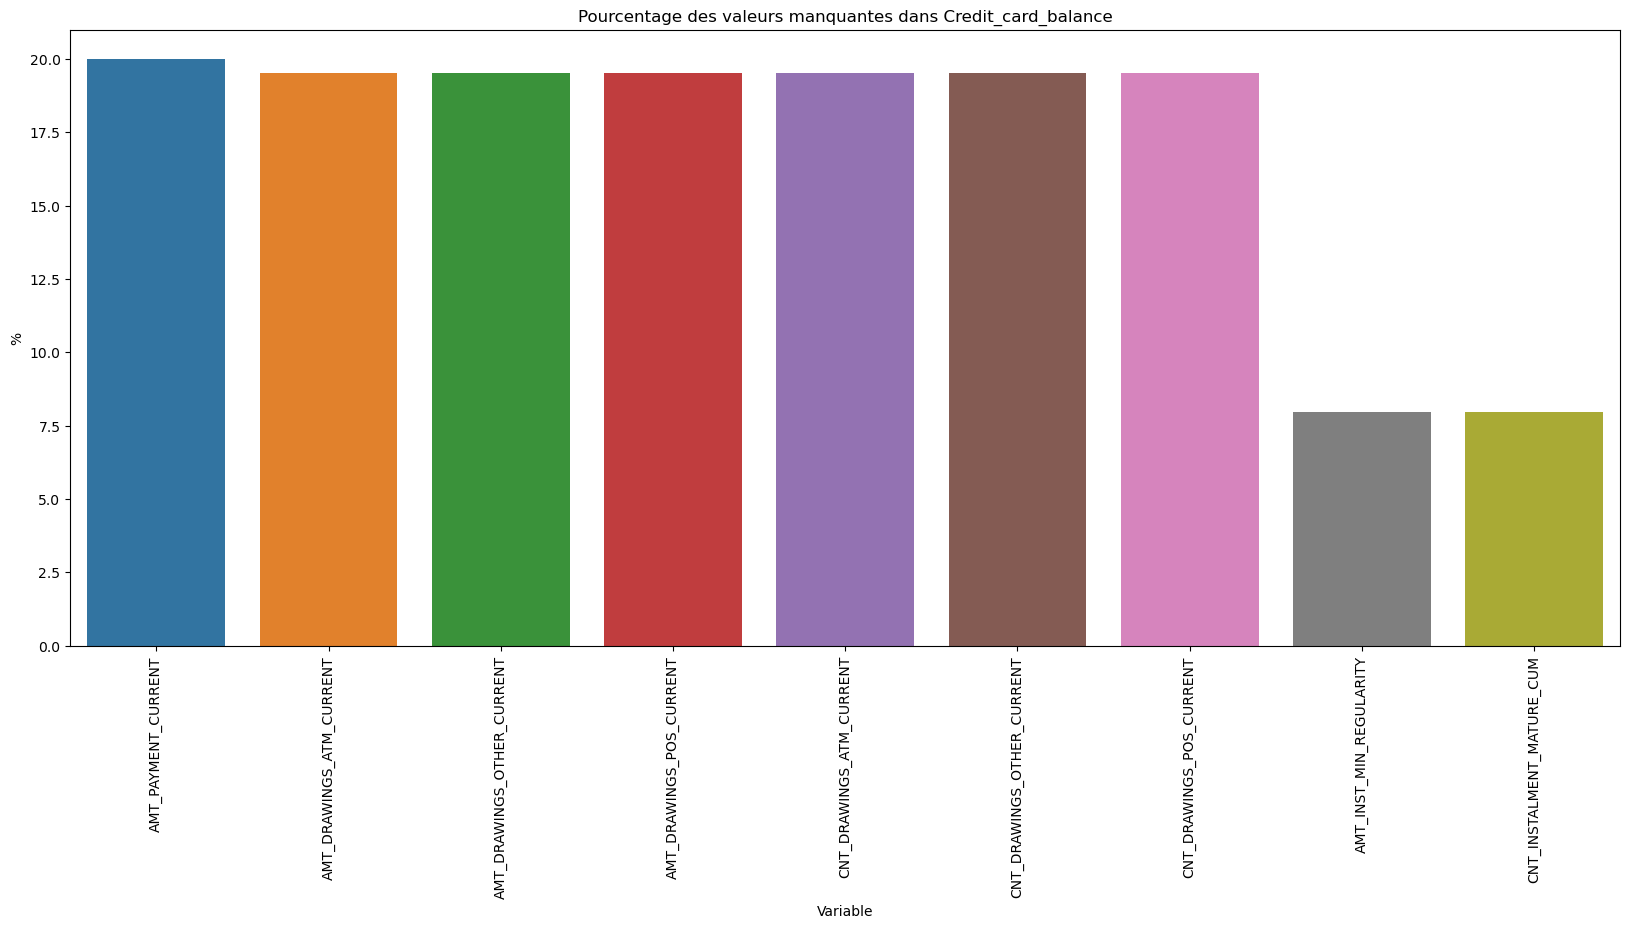

In [49]:
# Visualisation des valeurs manquantes : 

fct_data.valeurs_manquantes(
    df,
    titre_graph='Credit_card_balance',
    )

Ce DataFrame contient 23 variables, qui contiennent les statistiques sur le statut de la carte de crédit de chaque mois, comme le montant du solde, le montant des retraits, le nombre de retraits, le statut, etc.
9 d'entre elles ont des valeurs manaquentes. 

#### 3.5.2. <a id='toc3_5_2_'></a>[Matrice de corrélation](#toc0_)

In [50]:
# Ajout de la variable cible : 

df = dataframes['application_train'].iloc[:, :2].merge(df,
                                                    on='SK_ID_CURR',
                                                    how='left')

df.head()                                                                                                 

SK_ID_CURR  TARGET  SK_ID_PREV  MONTHS_BALANCE  AMT_BALANCE  \
0      100002       1         NaN             NaN          NaN   
1      100003       0         NaN             NaN          NaN   
2      100004       0         NaN             NaN          NaN   
3      100006       0   1489396.0            -2.0          0.0   
4      100006       0   1489396.0            -1.0          0.0   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                      NaN                       NaN                   NaN   
1                      NaN                       NaN                   NaN   
2                      NaN                       NaN                   NaN   
3                 270000.0                       NaN                   0.0   
4                 270000.0                       NaN                   0.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  ...  AMT_RECIVABLE  \
0                         NaN                       NaN  ...            NaN   
1                         NaN                       NaN  ...            NaN   
2                         NaN                       NaN  ...            NaN   
3                         NaN                       NaN  ...            0.0   
4                         NaN                       NaN  ...            0.0   

   AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
0                   NaN                       NaN                   NaN   
1                   NaN                       NaN                   NaN   
2                   NaN                       NaN                   NaN   
3                   0.0                       NaN                   0.0   
4                   0.0                       NaN                   0.0   

   CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
0                         NaN                       NaN   
1                         NaN                       NaN   
2                         NaN                       NaN   
3                         NaN                       NaN   
4                         NaN                       NaN   

   CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                        NaN                   NaN     NaN         NaN  
1                        NaN                   NaN     NaN         NaN  
2                        NaN                   NaN     NaN         NaN  
3                        0.0                Active     0.0         0.0  
4                        0.0                Active     0.0         0.0  

[5 rows x 24 columns]

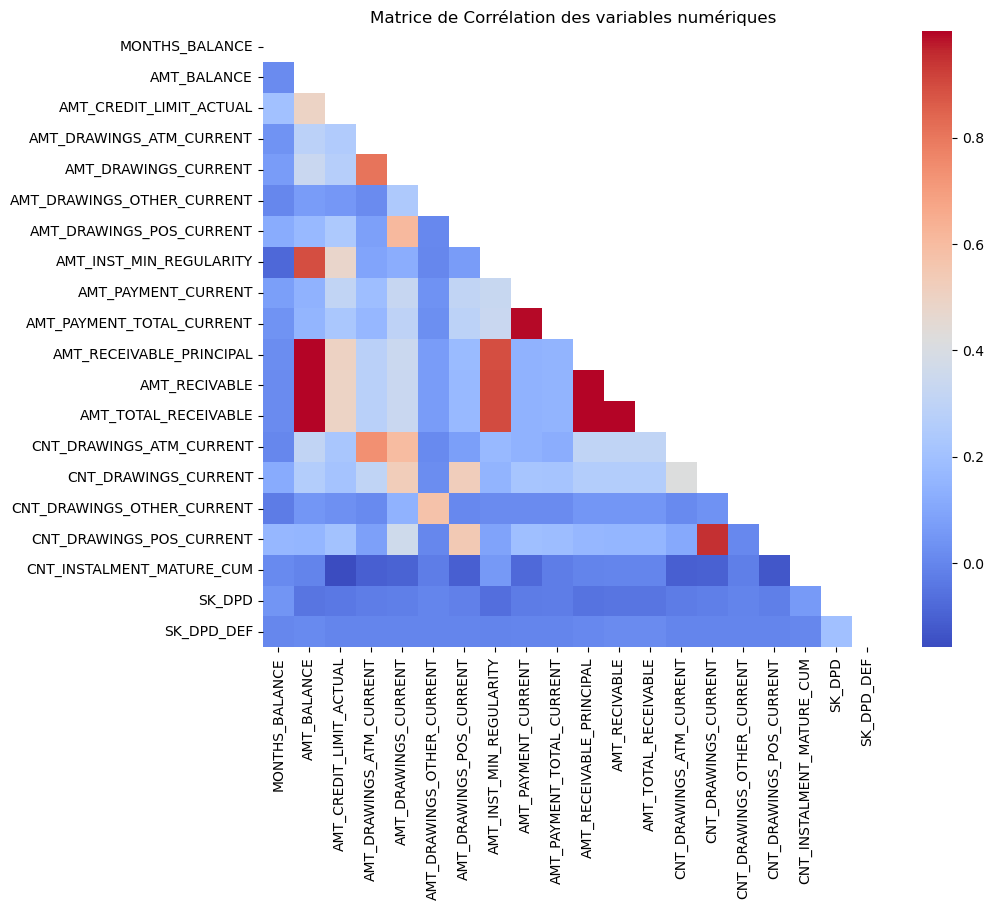

In [51]:
# Tracé de la matrice de corrélation ; 

var_categorielles = df.dtypes[df.dtypes == 'object'].index.tolist()
var_categorielles.insert(0, 'TARGET')

var_numeriques = [col for col in df.columns if col not in var_categorielles]
var_numeriques.remove('SK_ID_CURR')
var_numeriques.remove('SK_ID_PREV')

fct_data.correlation_matrix(
    data=df, 
    var_num=var_numeriques,
    figsize=(10,8) 
)

In [52]:
# Visualisation des meilleures corrélations entre les variables numériques et la cible : 

fct_data.top_correlation_var_num_target(
    data=df, 
    var_num=var_numeriques,
    target='TARGET',
)

interval columns not set, guessing: ['MONTHS_BALANCE', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD', 'SK_DPD_DEF', 'TARGET']


/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Les variables numériques possèdant les valeurs de corrélation Phik les plus élevées avec la variable cible sont : 


Variable  Phik-Correlation
1                 AMT_BALANCE          0.059838
11              AMT_RECIVABLE          0.059311
12       AMT_TOTAL_RECEIVABLE          0.059287
10   AMT_RECEIVABLE_PRINCIPAL          0.058895
0              MONTHS_BALANCE          0.050360
7     AMT_INST_MIN_REGULARITY          0.042174
17  CNT_INSTALMENT_MATURE_CUM          0.038261
13   CNT_DRAWINGS_ATM_CURRENT          0.030052
2     AMT_CREDIT_LIMIT_ACTUAL          0.028752
14       CNT_DRAWINGS_CURRENT          0.027868

Il y a une forte corrélation entre les variables : 
- AMT_RECEIVABLE_PRINCIPLE, AMT_RECIVABLE, AMT_TOTAL_RECEIVABLE et AMT_BALANCE. 
- AMT_PAYMENT_TOTAL_CURRENT et AMT_PAYMENT_CURRENT

L'ensemble des variables de Credit_card_balance ne présentent de corrélation particuière avec la variable TARGET.
Il n'y a donc aucune relation linéaire particulière avec la cible.

### 3.6. <a id='toc3_6_'></a>[Installments_payments](#toc0_)
Le DataFrame installments_payments présente l'historique de remboursement de chacun des prêts que le demandeur a contractés auprès de Home Credit Group.

#### 3.6.1. <a id='toc3_6_1_'></a>[Généralités](#toc0_)

In [53]:
# Récupération du DataFrame : 
df = dataframes['installments_payments'].copy()

df.head(5)

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

Dimmension du DataFrame : (13605401, 8)
----------------------------------------------------------------------------------------------------
Nombre de lignes dupliquées : 0
----------------------------------------------------------------------------------------------------
Information sur les types de variables :


Data_type
Nom_de_colonne                  
SK_ID_PREV                 int64
SK_ID_CURR                 int64
NUM_INSTALMENT_VERSION   float64
NUM_INSTALMENT_NUMBER      int64
DAYS_INSTALMENT          float64
DAYS_ENTRY_PAYMENT       float64
AMT_INSTALMENT           float64
AMT_PAYMENT              float64

----------------------------------------------------------------------------------------------------
Répartition des types de variables :


Data_type  Nombre par type de variable  % des types de variable
0   float64                            5                     62.5
1     int64                            3                     37.5

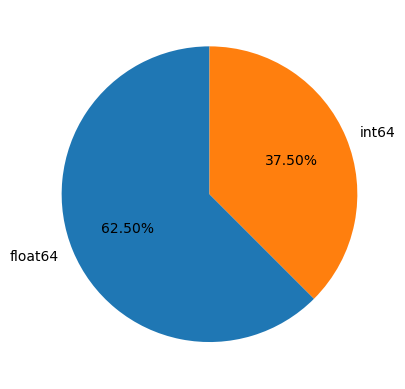

----------------------------------------------------------------------------------------------------


In [54]:
# Visualisation des informations sur les variables du dataframes : 
fct_data.info_variables(
    df=df,
    )

In [55]:
# Visualisation des statistiques descriptives : 
fct_data.describe_dataframe(
    df=df,
)

Statistiques descriptives des colonnes numériques : 



SK_ID_PREV    SK_ID_CURR  NUM_INSTALMENT_VERSION  \
count  1.360540e+07  1.360540e+07            1.360540e+07   
mean   1.903365e+06  2.784449e+05            8.566373e-01   
std    5.362029e+05  1.027183e+05            1.035216e+00   
min    1.000001e+06  1.000010e+05            0.000000e+00   
25%    1.434191e+06  1.896390e+05            0.000000e+00   
50%    1.896520e+06  2.786850e+05            1.000000e+00   
75%    2.369094e+06  3.675300e+05            1.000000e+00   
max    2.843499e+06  4.562550e+05            1.780000e+02   

       NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
count           1.360540e+07     1.360540e+07        1.360250e+07   
mean            1.887090e+01    -1.042270e+03       -1.051114e+03   
std             2.666407e+01     8.009463e+02        8.005859e+02   
min             1.000000e+00    -2.922000e+03       -4.921000e+03   
25%             4.000000e+00    -1.654000e+03       -1.662000e+03   
50%             8.000000e+00    -8.180000e+02       -8.270000e+02   
75%             1.900000e+01    -3.610000e+02       -3.700000e+02   
max             2.770000e+02    -1.000000e+00       -1.000000e+00   

       AMT_INSTALMENT   AMT_PAYMENT  
count    1.360540e+07  1.360250e+07  
mean     1.705091e+04  1.723822e+04  
std      5.057025e+04  5.473578e+04  
min      0.000000e+00  0.000000e+00  
25%      4.226085e+03  3.398265e+03  
50%      8.884080e+03  8.125515e+03  
75%      1.671021e+04  1.610842e+04  
max      3.771488e+06  3.771488e+06

Nomnbrde valeurs manquantes : 5810 | Nbre de données : 108843208 | -----> 0.01 % de valeurs manquantes 
----------------------------------------------------------------------------------------------------
Nombre de variables avec des valeurs manquantes : 2/8


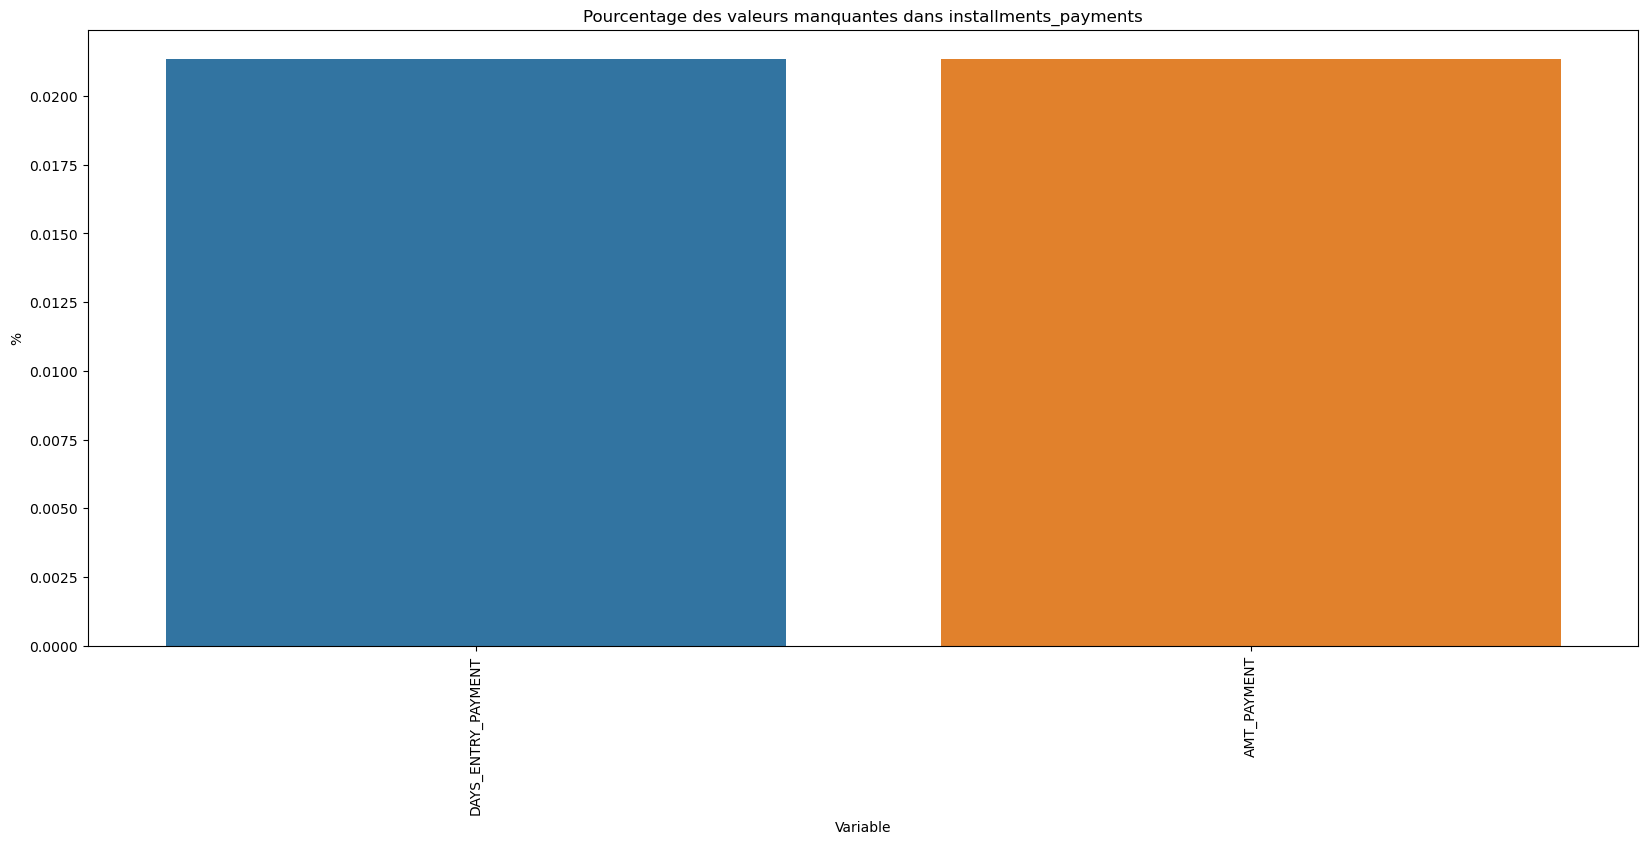

In [56]:
# Visualisation des valeurs manquantes : 
fct_data.valeurs_manquantes(
    df,
    titre_graph='installments_payments',
    )


Ce DataFrame contient 8 variables, dont 6 décrivent les statistiques de chaque versement pour le prêt précédent.  
2 d'entre elles ont des valeurs manaquentes (dans des proprtions très minime : 0,02%)


#### 3.6.2. <a id='toc3_6_2_'></a>[Matrice de corrélation](#toc0_)

In [57]:
# Ajout de la variable cible : 

df = dataframes['application_train'].iloc[:, :2].merge(df,
                                                    on='SK_ID_CURR',
                                                    how='left')

df.head()                                                                                                 

SK_ID_CURR  TARGET  SK_ID_PREV  NUM_INSTALMENT_VERSION  \
0      100002       1   1038818.0                     1.0   
1      100002       1   1038818.0                     1.0   
2      100002       1   1038818.0                     2.0   
3      100002       1   1038818.0                     1.0   
4      100002       1   1038818.0                     1.0   

   NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  \
0                   16.0           -115.0              -133.0        9251.775   
1                    8.0           -355.0              -375.0        9251.775   
2                   19.0            -25.0               -49.0       53093.745   
3                   12.0           -235.0              -250.0        9251.775   
4                    9.0           -325.0              -344.0        9251.775   

   AMT_PAYMENT  
0     9251.775  
1     9251.775  
2    53093.745  
3     9251.775  
4     9251.775

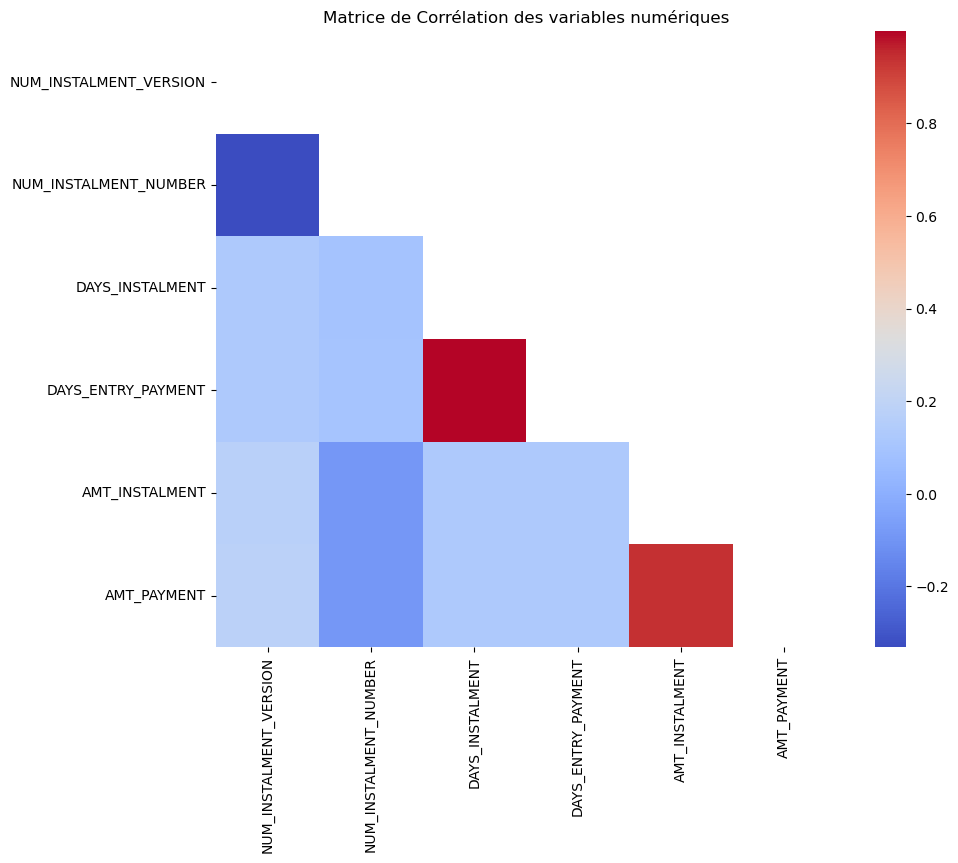

In [58]:
# Tracé de la matrice de corrélation ; 

var_numeriques = [col for col in df.columns if col != 'TARGET']
var_numeriques.remove('SK_ID_CURR')
var_numeriques.remove('SK_ID_PREV')

fct_data.correlation_matrix(
    data=df, 
    var_num=var_numeriques,
    figsize=(10,8) 
)

In [59]:
# Visualisation des meilleures corrélations entre les variables numériques et la cible : 

fct_data.top_correlation_var_num_target(
    data=df, 
    var_num=var_numeriques,
    target='TARGET',
)

interval columns not set, guessing: ['NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT', 'TARGET']


/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Les variables numériques possèdant les valeurs de corrélation Phik les plus élevées avec la variable cible sont : 


Variable  Phik-Correlation
2         DAYS_INSTALMENT          0.046824
3      DAYS_ENTRY_PAYMENT          0.033128
1   NUM_INSTALMENT_NUMBER          0.022993
4          AMT_INSTALMENT          0.004125
5             AMT_PAYMENT          0.003084
0  NUM_INSTALMENT_VERSION          0.002198

Il y a une forte corrélation entre les variables : 
- AMT_INSTALMENT et AMT_PAYMENT
- DAYS_INSTALMENT et DAYS_ENTRY_PAYMENT

L'ensemble des variables de Credit_card_balance ne présentent de corrélation particuière avec la variable TARGET.
Il n'y a donc aucune relation linéaire particulière avec la cible.

### 3.7. <a id='toc3_7_'></a>[POS_cash_balance](#toc0_)
Le DataFrame POS_CASH_balance contient les instantanés des soldes mensuels des prêts aux points de vente et des prêts en espèces que le demandeur a obtenus auprès de Home Credit Group

#### 3.7.1. <a id='toc3_7_1_'></a>[Généralités](#toc0_)

In [60]:
# Récupération du DataFrame : 
df = dataframes['POS_CASH_balance'].copy()

df.head(5)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

Dimmension du DataFrame : (10001358, 8)
----------------------------------------------------------------------------------------------------
Nombre de lignes dupliquées : 0
----------------------------------------------------------------------------------------------------
Information sur les types de variables :


Data_type
Nom_de_colonne                 
SK_ID_PREV                int64
SK_ID_CURR                int64
MONTHS_BALANCE            int64
CNT_INSTALMENT          float64
CNT_INSTALMENT_FUTURE   float64
NAME_CONTRACT_STATUS     object
SK_DPD                    int64
SK_DPD_DEF                int64

----------------------------------------------------------------------------------------------------
Répartition des types de variables :


Data_type  Nombre par type de variable  % des types de variable
0   float64                            2                     25.0
1     int64                            5                     62.5
2    object                            1                     12.5

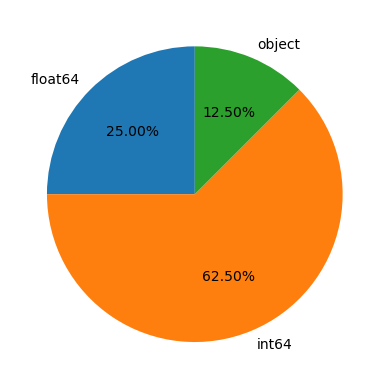

----------------------------------------------------------------------------------------------------


In [61]:
# Visualisation des informations sur les variables du dataframes : 
fct_data.info_variables(
    df=df,
    )

In [62]:
# Visualisation des statistiques descriptives : 
fct_data.describe_dataframe(
    df=df,
)

Statistiques descriptives des colonnes numériques : 



SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
count  1.000136e+07  1.000136e+07    1.000136e+07    9.975287e+06   
mean   1.903217e+06  2.784039e+05   -3.501259e+01    1.708965e+01   
std    5.358465e+05  1.027637e+05    2.606657e+01    1.199506e+01   
min    1.000001e+06  1.000010e+05   -9.600000e+01    1.000000e+00   
25%    1.434405e+06  1.895500e+05   -5.400000e+01    1.000000e+01   
50%    1.896565e+06  2.786540e+05   -2.800000e+01    1.200000e+01   
75%    2.368963e+06  3.674290e+05   -1.300000e+01    2.400000e+01   
max    2.843499e+06  4.562550e+05   -1.000000e+00    9.200000e+01   

       CNT_INSTALMENT_FUTURE        SK_DPD    SK_DPD_DEF  
count           9.975271e+06  1.000136e+07  1.000136e+07  
mean            1.048384e+01  1.160693e+01  6.544684e-01  
std             1.110906e+01  1.327140e+02  3.276249e+01  
min             0.000000e+00  0.000000e+00  0.000000e+00  
25%             3.000000e+00  0.000000e+00  0.000000e+00  
50%             7.000000e+00  0.000000e+00  0.000000e+00  
75%             1.400000e+01  0.000000e+00  0.000000e+00  
max             8.500000e+01  4.231000e+03  3.595000e+03

Statistiques descriptives des colonnes catégorielles : 



NAME_CONTRACT_STATUS
count              10001358
unique                    9
top                  Active
freq                9151119

Nomnbrde valeurs manquantes : 52158 | Nbre de données : 80010864 | -----> 0.07 % de valeurs manquantes 
----------------------------------------------------------------------------------------------------
Nombre de variables avec des valeurs manquantes : 2/8


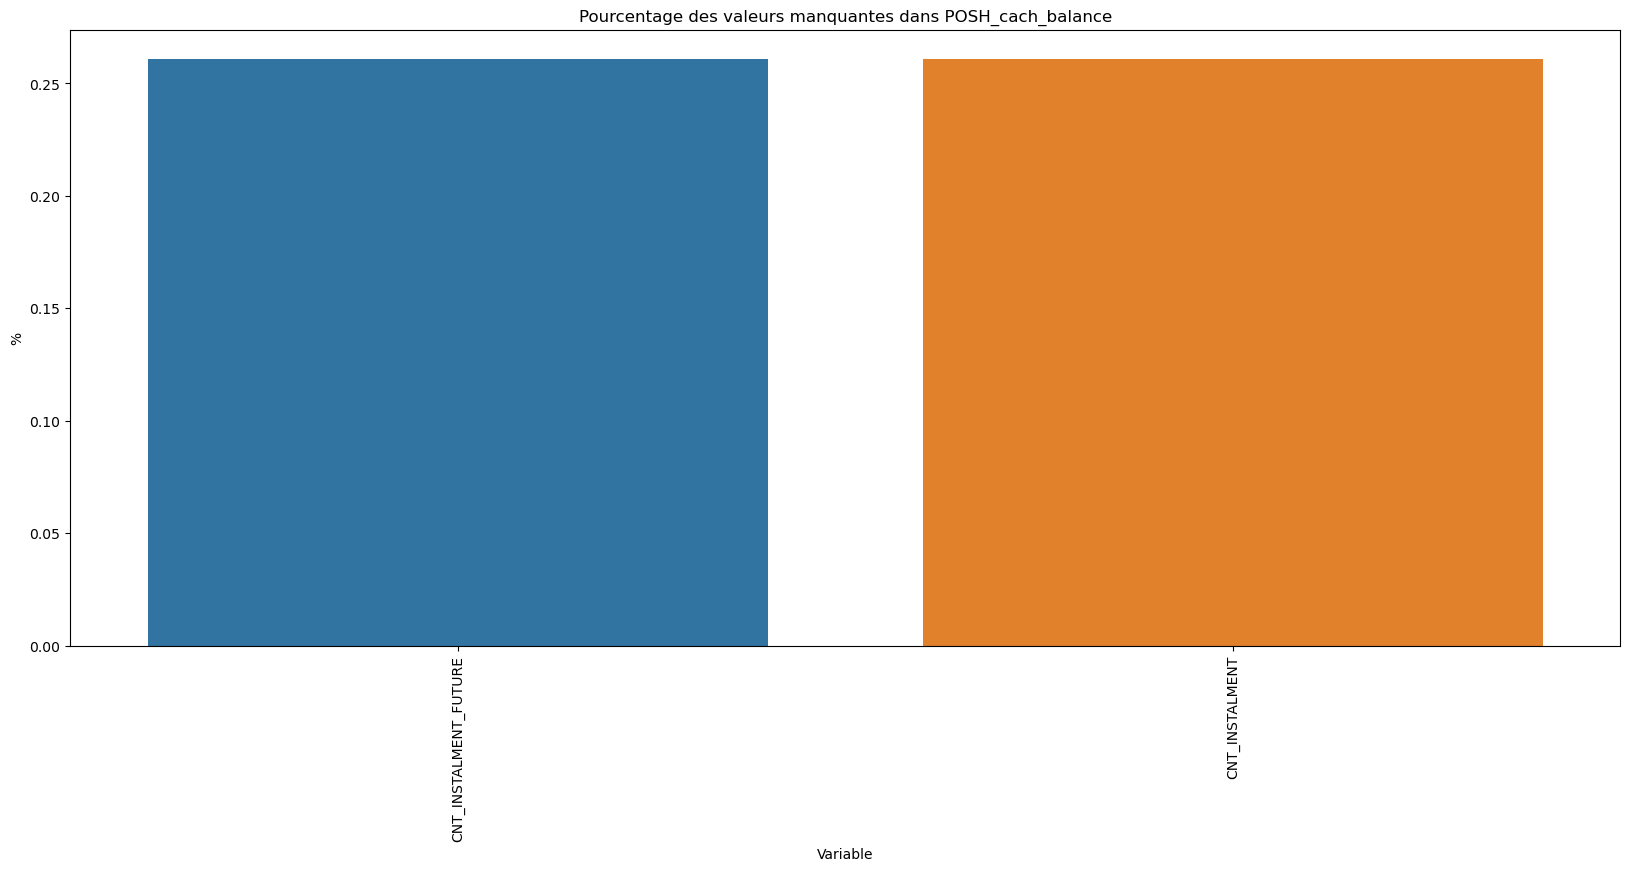

In [63]:
# Visualisation des valeurs manquantes : 
fct_data.valeurs_manquantes(
    df,
    titre_graph='POSH_cach_balance',
    )

Ce DataFrame contient 8 variables (dont SK_ID_CURR et SK_ID_PREV).  
Deux d'entre elles ont des valeurs manaquentes (dans des proportions très minime : 0,25%)


#### 3.7.2. <a id='toc3_7_2_'></a>[Matrice de corrélation](#toc0_)

In [64]:
# Ajout de la variable cible : 

df = dataframes['application_train'].iloc[:, :2].merge(df,
                                                    on='SK_ID_CURR',
                                                    how='left')

df.head()          

SK_ID_CURR  TARGET  SK_ID_PREV  MONTHS_BALANCE  CNT_INSTALMENT  \
0      100002       1   1038818.0           -13.0            24.0   
1      100002       1   1038818.0           -16.0            24.0   
2      100002       1   1038818.0           -18.0            24.0   
3      100002       1   1038818.0           -17.0            24.0   
4      100002       1   1038818.0            -5.0            24.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   18.0               Active     0.0         0.0  
1                   21.0               Active     0.0         0.0  
2                   23.0               Active     0.0         0.0  
3                   22.0               Active     0.0         0.0  
4                   10.0               Active     0.0         0.0

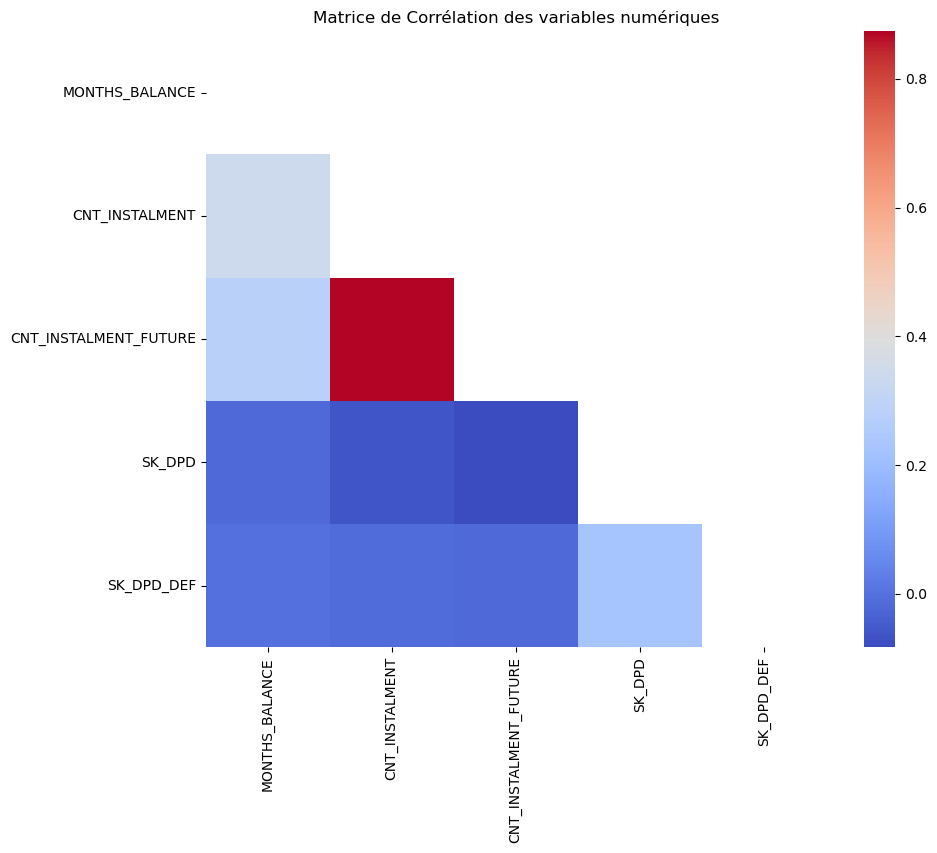

In [65]:
# Tracé de la matrice de corrélation ; 

var_numeriques = [col for col in df.columns if col != 'TARGET' and df[col].dtypes != 'object']
var_numeriques.remove('SK_ID_CURR')
var_numeriques.remove('SK_ID_PREV')

fct_data.correlation_matrix(
    data=df, 
    var_num=var_numeriques,
    figsize=(10,8) 
)

In [66]:
# Visualisation des meilleures corrélations entre les variables numériques et la cible : 
fct_data.top_correlation_var_num_target(
    data=df, 
    var_num=var_numeriques,
    target='TARGET',
)

interval columns not set, guessing: ['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF', 'TARGET']


/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Les variables numériques possèdant les valeurs de corrélation Phik les plus élevées avec la variable cible sont : 


Variable  Phik-Correlation
2  CNT_INSTALMENT_FUTURE          0.033194
1         CNT_INSTALMENT          0.030947
0         MONTHS_BALANCE          0.027391
3                 SK_DPD          0.012773
4             SK_DPD_DEF          0.010539

IL y a une forte corrélation entre les variables : 
- CNT_INSTALMENT et CNT_INSTALMENT_FUTURE  

L'ensemble des variables de POSH_cas_balance ne présentent de corrélation particuière avec la variable TARGET.

#### 3.7.3. <a id='toc3_7_3_'></a>[Variable NAME_CONTRACT_STATUS](#toc0_)

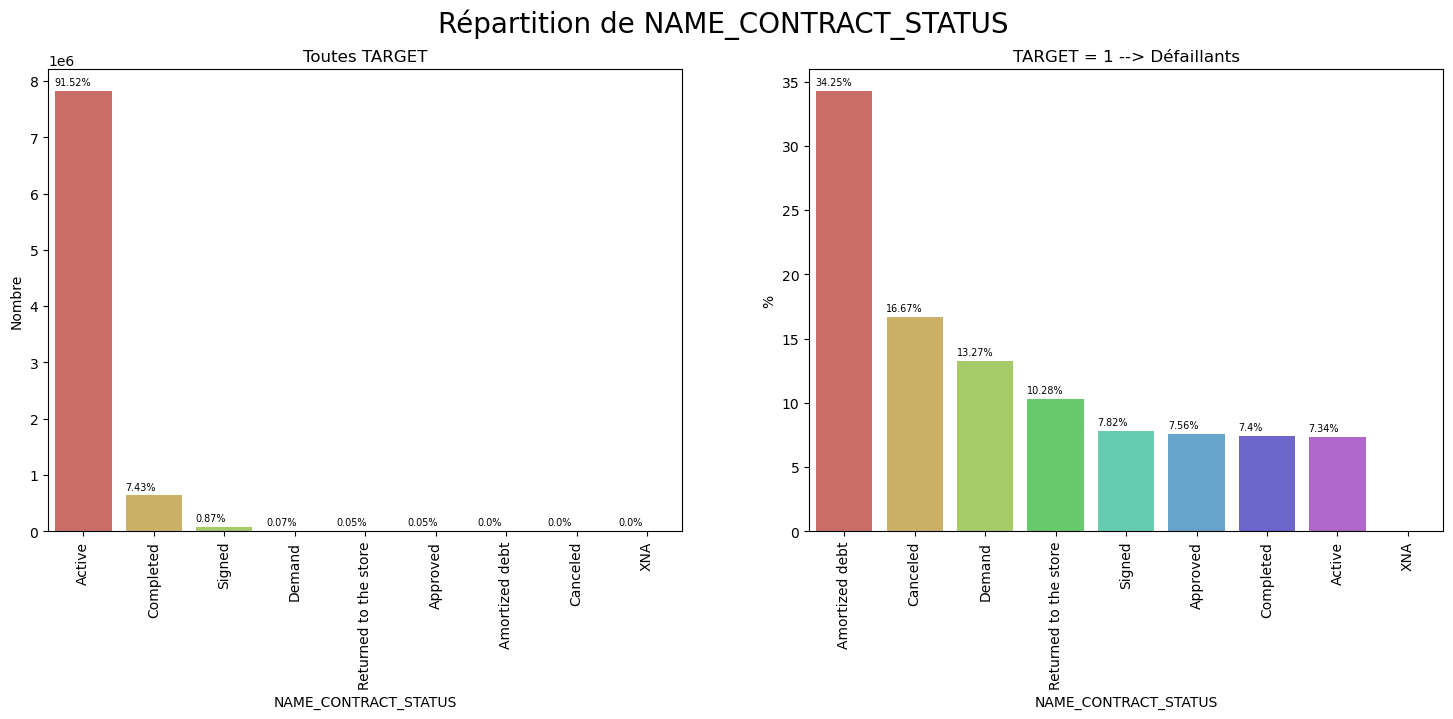

In [67]:
# Visualisation de la répartion des valeurs : 
fct_data.repartition_var_categorielle(
    data=df,
    var_categorielle='NAME_CONTRACT_STATUS',
)

- La majorité des états des contrats des prêts sont Actif ou Terminé.
- Pour les défaillants, l'état des contrat sont en priorité tous sauf ceux de la majorité des demandeurs Actifs ou Terminés.
- Les non-défaillants ont plus de prêts actifs que les défaillants.

### 3.8. <a id='toc3_8_'></a>[Previous_application](#toc0_)
Le DataFrame previous_application contient les données statiques du précédent prêt que le demmdeur a eu avec Home Credit. 

#### 3.8.1. <a id='toc3_8_1_'></a>[Généralités](#toc0_)

In [68]:
# Récupération du DataFrame : 
df = dataframes['previous_application'].copy()

df.head(5)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

Dimmension du DataFrame : (1670214, 37)
----------------------------------------------------------------------------------------------------
Nombre de lignes dupliquées : 0
----------------------------------------------------------------------------------------------------
Information sur les types de variables :


Data_type
Nom_de_colonne                       
SK_ID_PREV                      int64
SK_ID_CURR                      int64
NAME_CONTRACT_TYPE             object
AMT_ANNUITY                   float64
AMT_APPLICATION               float64
AMT_CREDIT                    float64
AMT_DOWN_PAYMENT              float64
AMT_GOODS_PRICE               float64
WEEKDAY_APPR_PROCESS_START     object
HOUR_APPR_PROCESS_START         int64
FLAG_LAST_APPL_PER_CONTRACT    object
NFLAG_LAST_APPL_IN_DAY          int64
RATE_DOWN_PAYMENT             float64
RATE_INTEREST_PRIMARY         float64
RATE_INTEREST_PRIVILEGED      float64
NAME_CASH_LOAN_PURPOSE         object
NAME_CONTRACT_STATUS           object
DAYS_DECISION                   int64
NAME_PAYMENT_TYPE              object
CODE_REJECT_REASON             object
NAME_TYPE_SUITE                object
NAME_CLIENT_TYPE               object
NAME_GOODS_CATEGORY            object
NAME_PORTFOLIO                 object
NAME_PRODUCT_TYPE              object
CHANNEL_TYPE                   object
SELLERPLACE_AREA                int64
NAME_SELLER_INDUSTRY           object
CNT_PAYMENT                   float64
NAME_YIELD_GROUP               object
PRODUCT_COMBINATION            object
DAYS_FIRST_DRAWING            float64
DAYS_FIRST_DUE                float64
DAYS_LAST_DUE_1ST_VERSION     float64
DAYS_LAST_DUE                 float64
DAYS_TERMINATION              float64
NFLAG_INSURED_ON_APPROVAL     float64

----------------------------------------------------------------------------------------------------
Répartition des types de variables :


Data_type  Nombre par type de variable  % des types de variable
0   float64                           15                40.540541
1     int64                            6                16.216216
2    object                           16                43.243243

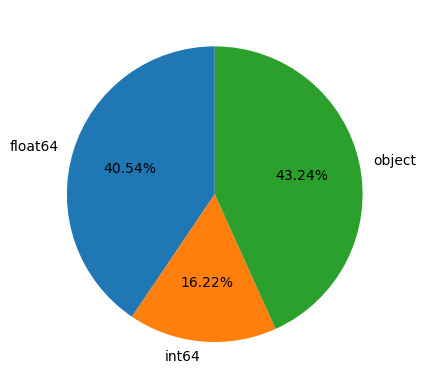

----------------------------------------------------------------------------------------------------


In [69]:
# Visualisation des informations sur les variables du dataframes : 
fct_data.info_variables(
    df=df,
    )

In [70]:
# Visualisation des statistiques descriptives : 
fct_data.describe_dataframe(
    df=df,
)

Statistiques descriptives des colonnes numériques : 



SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

Statistiques descriptives des colonnes catégorielles : 



NAME_CONTRACT_TYPE WEEKDAY_APPR_PROCESS_START  \
count             1670214                    1670214   
unique                  4                          7   
top            Cash loans                    TUESDAY   
freq               747553                     255118   

       FLAG_LAST_APPL_PER_CONTRACT NAME_CASH_LOAN_PURPOSE  \
count                      1670214                1670214   
unique                           2                     25   
top                              Y                    XAP   
freq                       1661739                 922661   

       NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE CODE_REJECT_REASON  \
count               1670214                1670214            1670214   
unique                    4                      4                  9   
top                Approved  Cash through the bank                XAP   
freq                1036781                1033552            1353093   

       NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
count           849809          1670214             1670214        1670214   
unique               7                4                  28              5   
top      Unaccompanied         Repeater                 XNA            POS   
freq            508970          1231261              950809         691011   

       NAME_PRODUCT_TYPE             CHANNEL_TYPE NAME_SELLER_INDUSTRY  \
count            1670214                  1670214              1670214   
unique                 3                        8                   11   
top                  XNA  Credit and cash offices                  XNA   
freq             1063666                   719968               855720   

       NAME_YIELD_GROUP PRODUCT_COMBINATION  
count           1670214             1669868  
unique                5                  17  
top                 XNA                Cash  
freq             517215              285990

Nomnbrde valeurs manquantes : 11109336 | Nbre de données : 61797918 | -----> 17.98 % de valeurs manquantes 
----------------------------------------------------------------------------------------------------
Nombre de variables avec des valeurs manquantes : 16/37


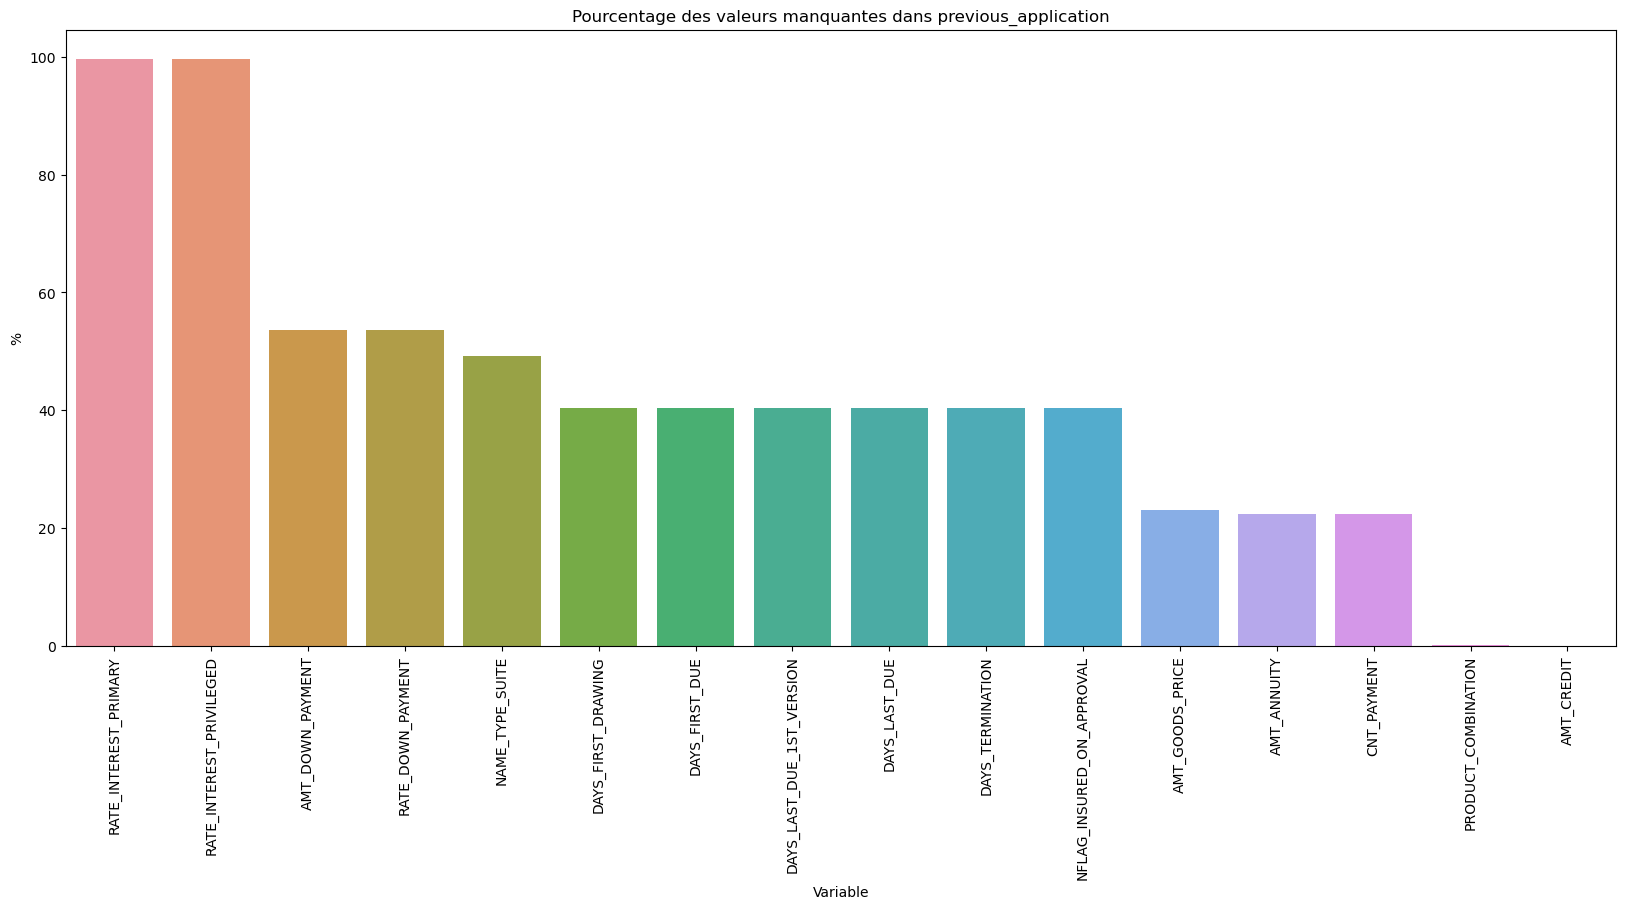

In [71]:
# Visualisation des valeurs manquantes : 
fct_data.valeurs_manquantes(
    df,
    titre_graph='previous_application',
    )

Ce DataFrame contient 37 variables, contenant les détails du prêt précédent.
16 variables sur 37 possèdent des valeurs manquantes, dont deux à quasiment 100% (ce qui est extrêmement élevé)

#### 3.8.2. <a id='toc3_8_2_'></a>[Matrice de corrélation Phi-K](#toc0_)

In [72]:
# Ajout de la variable cible : 

df = dataframes['application_train'].iloc[:, :2].merge(df,
                                                    on='SK_ID_CURR',
                                                    how='left')

df.head()

SK_ID_CURR  TARGET  SK_ID_PREV NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0      100002       1   1038818.0     Consumer loans     9251.775   
1      100003       0   1810518.0         Cash loans    98356.995   
2      100003       0   2636178.0     Consumer loans    64567.665   
3      100003       0   2396755.0     Consumer loans     6737.310   
4      100004       0   1564014.0     Consumer loans     5357.250   

   AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0         179055.0    179055.0               0.0         179055.0   
1         900000.0   1035882.0               NaN         900000.0   
2         337500.0    348637.5               0.0         337500.0   
3          68809.5     68053.5            6885.0          68809.5   
4          24282.0     20106.0            4860.0          24282.0   

  WEEKDAY_APPR_PROCESS_START  ...  NAME_SELLER_INDUSTRY CNT_PAYMENT  \
0                   SATURDAY  ...       Auto technology        24.0   
1                     FRIDAY  ...                   XNA        12.0   
2                     SUNDAY  ...             Furniture         6.0   
3                   SATURDAY  ...  Consumer electronics        12.0   
4                     FRIDAY  ...          Connectivity         4.0   

   NAME_YIELD_GROUP          PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0        low_normal      POS other with interest            365243.0   
1        low_normal             Cash X-Sell: low            365243.0   
2            middle   POS industry with interest            365243.0   
3            middle  POS household with interest            365243.0   
4            middle  POS mobile without interest            365243.0   

   DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION DAYS_LAST_DUE  DAYS_TERMINATION  \
0          -565.0                     125.0         -25.0             -17.0   
1          -716.0                    -386.0        -536.0            -527.0   
2          -797.0                    -647.0        -647.0            -639.0   
3         -2310.0                   -1980.0       -1980.0           -1976.0   
4          -784.0                    -694.0        -724.0            -714.0   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       0.0  
3                       1.0  
4                       0.0  

[5 rows x 38 columns]

--------------------------------------------------


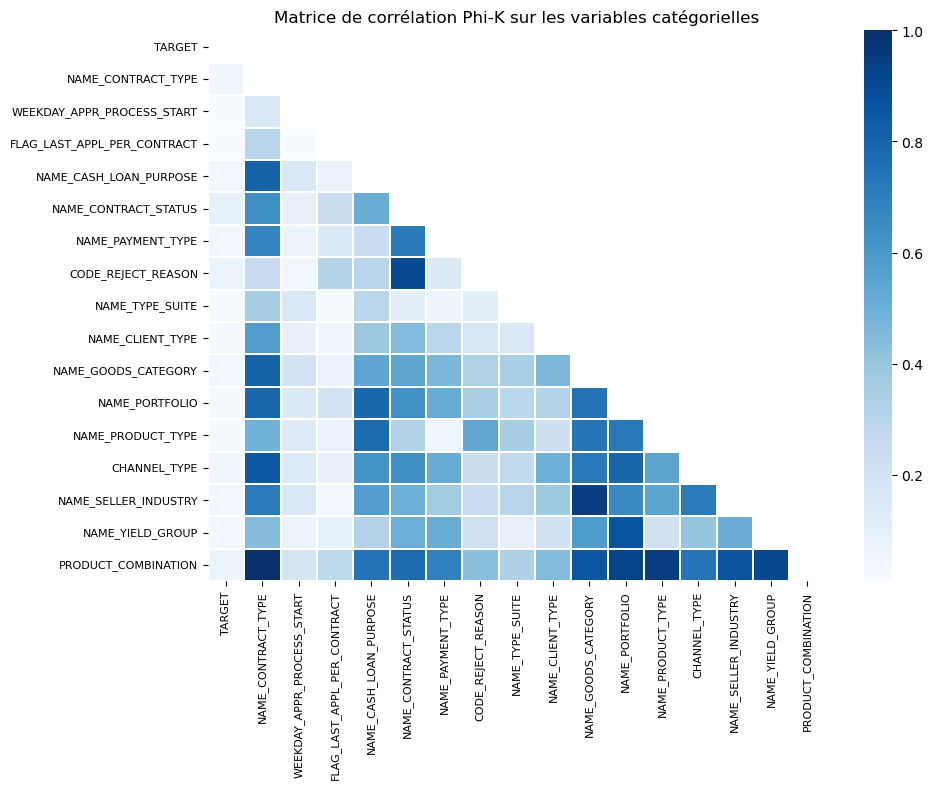

--------------------------------------------------
Les catégories possédant les valeurs de corrélation Phi-K les plus élevées avec la variable cible sont : 


Variables  Phik-Correlation
4     NAME_CONTRACT_STATUS          0.088266
15     PRODUCT_COMBINATION          0.063839
6       CODE_REJECT_REASON          0.062771
0       NAME_CONTRACT_TYPE          0.050859
12            CHANNEL_TYPE          0.050302
9      NAME_GOODS_CATEGORY          0.042951
3   NAME_CASH_LOAN_PURPOSE          0.040305
5        NAME_PAYMENT_TYPE          0.039752
13    NAME_SELLER_INDUSTRY          0.038077
14        NAME_YIELD_GROUP          0.034626

--------------------------------------------------


In [73]:
# Tracé de la matrice de corrélation Phi-K : 

var_categorielles = df.dtypes[df.dtypes == 'object'].index.tolist()
var_categorielles.insert(0, 'TARGET')

fct_data.plot_phik_matrix(
    data=df,
    categorical_columns=var_categorielles,
    figsize=(10,8),
    fontsize=8,
    )

De nombreuses variables montrent une corrélation : 
- PRODUCT_COMBINATION, NAME_CONTRACT_TYPE, NAME_PRODUCT_TYPE, NAME_PORTFOLIO etc...
- NOM_GOODS_CATEGORY et NOM_SELLER_INDUSTRY

Tout comme les variables repérés dans application_train, la variable NAME_CONTRACT_STATUS possède une corrélation correcte. 

#### 3.8.3. <a id='toc3_8_3_'></a>[Matrice de corrélation](#toc0_)

In [74]:
# Récupération de la liste des variables numériques : 

var_numeriques = [col for col in df.columns if col not in var_categorielles]
var_numeriques.remove('SK_ID_CURR')
var_numeriques.remove('SK_ID_PREV')

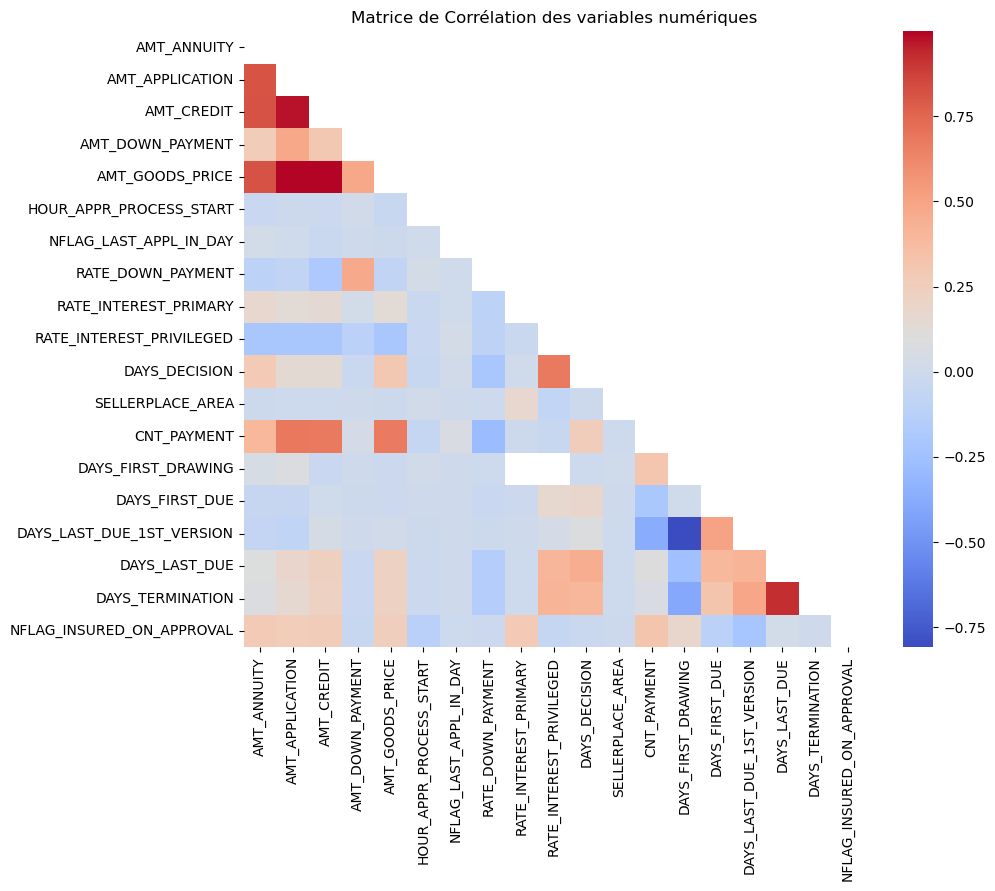

In [75]:
# Tracé de la matrice de corrélation ; 
fct_data.correlation_matrix(
    data=df, 
    var_num=var_numeriques,
    figsize=(10,8) 
)

In [76]:
# Visualisation des meilleures corrélations entre les variables numériques et la cible : 

fct_data.top_correlation_var_num_target(
    data=df, 
    var_num=var_numeriques,
    target='TARGET',
)

interval columns not set, guessing: ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'TARGET']
Les variables numériques possèdant les valeurs de corrélation Phik les plus élevées avec la variable cible sont : 


Variable  Phik-Correlation
12                CNT_PAYMENT          0.056639
10              DAYS_DECISION          0.053694
13         DAYS_FIRST_DRAWING          0.048993
7           RATE_DOWN_PAYMENT          0.039592
5     HOUR_APPR_PROCESS_START          0.038121
9    RATE_INTEREST_PRIVILEGED          0.028204
15  DAYS_LAST_DUE_1ST_VERSION          0.027878
16              DAYS_LAST_DUE          0.027320
17           DAYS_TERMINATION          0.026479
0                 AMT_ANNUITY          0.013808

Il y a une forte corrélation entre les variables : 
- DAYS_TERMINATION et DAYS_DERNIER_DUE
- AMT_CREDIT et AMT_APPLICATION
- AMT_APPLICATION et AMT_GOODS_PRICE
- AMT_CREDIT et AMT_ANNUITE
- AMT_ANNUITY et AMT_CREDIT
- AMT_CREDIT et AMT_GOODS_PRICE

L'ensemble des variables de previous_application ne présentent de corrélation particuière avec la variable TARGET.
Il n'y a donc aucune relation linéaire particulière avec la cible.

#### 3.8.4. <a id='toc3_8_4_'></a>[Variable NAME_CONTRACT_STATUS](#toc0_)
État du contrat (approuvé ou annulé ...) de la demande précédente.

In [77]:
# Visualisation des valeurs de la variable : 

fct_data.type_donnees_uniques(
    data=df, 
    col='NAME_CONTRACT_STATUS',
)

----------------------------------------------------------------------------------------------------
Nombre de valeur unique de la variable NAME_CONTRACT_STATUS : 5
----------------------------------------------------------------------------------------------------
Pourcentage de valeurs manquantes : 1.15 %
----------------------------------------------------------------------------------------------------
Valeurs uniques : 

	-Approved
	-Canceled
	-Refused
	-nan
	-Unused offer


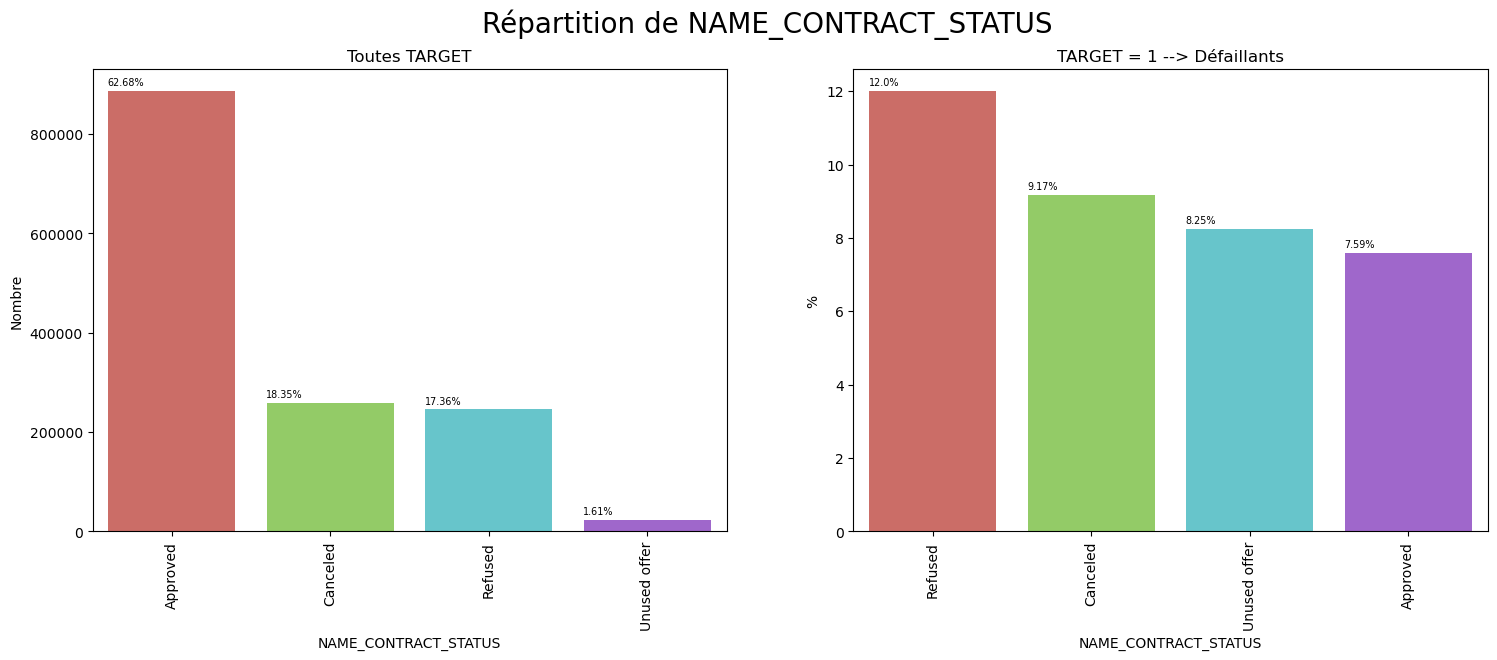

In [78]:
# Visualisation de la répartion des valeurs : 
fct_data.repartition_var_categorielle(
    data=df, 
    var_categorielle='NAME_CONTRACT_STATUS'
)


- Le type le plus courant de statut de contrat est le statut approuvé. (63% environ) 
- Les prêts qui avaient auparavant le statut Refusé ont tendance à être les plus défaillants dans les prêts actuels. (12% environ), suivi de prés par les prêts annulés (9%).

### 3.9. <a id='toc3_9_'></a>[Bilan](#toc0_)

En ce basant sur les corrélations (Phi_k et numériques) ayant un indice supérieur à 0.08 : 
| DataFrale | Var. intéressantes |
| --- | --- |
|**application_train**|EXT_SOURCE_3<br>EXT_SOURCE_1<br>EXT_SOURCE_2<br>DAYS_BIRTH<br>OCCUPATION_TYPE<br>ORGANIZATION_TYPE <br>NAME_INCOME_TYPE<br>REG_CITY_NOT_WORK_CITY|
|**bureau**|DAYS_CREDIT|
|**bureau_balance**|Il faut d'abord lier ce DataFrame à bureau|
|**credit_card_balance**||
|**installments_payments**||
|**POS_CASH_balance**|NAME_CONTRACT_STATUS|
|**previous_application**|NAME_CONTRACT_STATUS|

In [79]:
# Suppression des variables : 
del df, var_categorielles, var_numeriques, var_categorielles_application_train, var_numeriques_application_train

## 4. <a id='toc4_'></a>[Regroupement des DataFrames](#toc0_)
Dans cette partie, nous allons nous attarder aux regroupement de l'ensemble des DataFrames en un seul et même ficher.  

***Etapes :***
- La plupart des variables sont créées en appliquant les fonctions min, max, moyenne, somme et var à des tables groupées.
- Idées clés suivantes utilisées :
    - Division ou soustraction des éléments importants pour obtenir des taux (comme la rente et le revenu)
    - Dans bureau : création de variables spécifiques pour les crédits actifs et les crédits clôturés
    - Dans previous_application : création de variables spécifiques pour les candidatures approuvées et refusées
    - OneHotEncoding pour les variables catégorielles
- Toutes les DataFrames sont joints à application à l'aide de la clé SK_ID_CURR (sauf bureau_balance)

### 4.1. <a id='toc4_1_'></a>[Création de Data à partir d'application_train et application_test](#toc0_)

In [3]:
# Création de data à partir de application_train et application_test :

# 1. Récupértion des fichiers application_train et application_test : 
train = dataframes['application_train'].copy()
test = dataframes['application_test'].copy()

# 2. Concaténation des fichier en un seul DataFrames : 
data = pd.concat([train, test], ignore_index=True)

print(f"Dimension de train : {train.shape}")
print(f"Dimension de test : {test.shape}")
print(f"Dimension de data : {data.shape}")

del train, test 

# 3. Filtre des XNA sur la variable CODE_GENDER : 
data = data.loc[data['CODE_GENDER'] != 'XNA']

# 4. Gestion des colonnes avec variables Binaires : 
for feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        data[feature], _ = pd.factorize(data[feature])
        
del feature

# 5. Encodage des variables catégorielles : 
data, _ = fct_data.one_hot_encoder(
        df=data, 
        nan_as_category=False,
)

# 6.   Remplacement des valeurs de DAYS_EMPLOYED: 365.243 par nan : 
data['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
    
# 7. Création de nouvelles features (en pourcentage) : 
data['DAYS_EMPLOYED_PERC'] = data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']
data['INCOME_CREDIT_PERC'] = data['AMT_INCOME_TOTAL'] / data['AMT_CREDIT']
data['INCOME_PER_PERSON'] = data['AMT_INCOME_TOTAL'] / data['CNT_FAM_MEMBERS']
data['ANNUITY_INCOME_PERC'] = data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
data['PAYMENT_RATE'] = data['AMT_ANNUITY'] / data['AMT_CREDIT']

Dimension de train : (307511, 122)
Dimension de test : (48744, 121)
Dimension de data : (356255, 122)


### 4.2. <a id='toc4_2_'></a>[Bureau et bureau_balance](#toc0_)

In [4]:
# Aggrégation de bureau et bureau_balance : 

# 1. Récupération des fichiers : 
bureau = dataframes['bureau'].copy()
bureau_balance = dataframes['bureau_balance'].copy()

# 2. Encodage des variables catégorielles de bureau_balance et bureau : 
bureau_balance, bb_cat = fct_data.one_hot_encoder(
    df=bureau_balance, 
    nan_as_category=True,
)

bureau, bureau_cat = fct_data.one_hot_encoder(
    df=bureau, 
    nan_as_category=True,
)

# 3. Aggrégation de bureau_balance en fonction de la variable 'SK_ID_BUREAU' :
bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']} # Création du dictionnaire d'aggrégation

for col in bb_cat:
    bb_aggregations[col] = ['mean'] # Complétion du dictionnaire pour les colonnes catégorielles
    
bureau_balance = bureau_balance.groupby('SK_ID_BUREAU').agg(bb_aggregations) # Aggrégation
bureau_balance.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bureau_balance.columns.tolist()]) # Applatissement des noms de colonnes

del col, bb_aggregations

# 4. Ajout des variables de bureau_balance à bureau : 
bureau = bureau.join(bureau_balance, how='left', on='SK_ID_BUREAU')
bureau = bureau.drop(['SK_ID_BUREAU'], axis=1)

del bureau_balance

# 5. Création d'un dictionnaire d'aggrégation pour les variables numériques de bureau : 
num_aggregations = {
    'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
    'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
    'DAYS_CREDIT_UPDATE': ['mean'],
    'CREDIT_DAY_OVERDUE': ['max', 'mean'],
    'AMT_CREDIT_MAX_OVERDUE': ['mean'],
    'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_OVERDUE': ['mean'],
    'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
    'AMT_ANNUITY': ['max', 'mean'],
    'CNT_CREDIT_PROLONG': ['sum'],
    'MONTHS_BALANCE_MIN': ['min'],
    'MONTHS_BALANCE_MAX': ['max'],
    'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }

# 6. Création d'un dictionnaire d'aggrégation pour les variables catgorielles de bureau : 
cat_aggregations = {}

for cat in bureau_cat: # Pour les variables initales de bureau
    cat_aggregations[cat] = ['mean']
    
for cat in bb_cat: # Pour les variables provenant de bureau_balance
    cat_aggregations[cat + "_MEAN"] = ['mean']

del cat, bb_cat, bureau_cat

# 7. Aggrégation de bureau en fonction de la variable 'SK_ID_CURR' :
bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])

del cat_aggregations

# 8. Création de variables spécifiques pour les crédits Actifs (utilisation uniquement des variables numériques)
active = bureau.loc[bureau['CREDIT_ACTIVE_Active'] == 1] # Récupération des crédits actifs 
active = active.groupby('SK_ID_CURR').agg(num_aggregations) # Aggrégation spécifiques sur ces crédits
active.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active.columns.tolist()])
bureau_agg = bureau_agg.join(active, how='left', on='SK_ID_CURR') # Ajout de ces variables à bureau_agg 

del active

# 9. Création de variables spécifiques pour les crédits clôturés (utilisation uniquement des variables numériques)
closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
closed = closed.groupby('SK_ID_CURR').agg(num_aggregations)
closed.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed.columns.tolist()])
bureau_agg = bureau_agg.join(closed, how='left', on='SK_ID_CURR')
    
    
print(f"Dimension bureau + bureau_balance : {bureau_agg.shape}")
del closed, bureau, num_aggregations

Dimension bureau + bureau_balance : (305811, 116)


In [5]:
# Ajout de bureau_agg à data : 
data = data.join(bureau_agg, how='left', on='SK_ID_CURR')

print(f"Nouvelles dimensions de data : {data.shape}")

del bureau_agg

Nouvelles dimensions de data : (356251, 363)


### 4.3. <a id='toc4_3_'></a>[Previous_application](#toc0_)

In [6]:
# Aggrégation de previous_applications :

# 1. Récupération du fichier : 
previous = dataframes['previous_application'].copy()

# 2. Encodage des variables catégorielles : 
previous, cat_col = fct_data.one_hot_encoder(
    df=previous, 
    nan_as_category=True,
)

# 3. Gestion des jours égals à 365243 : (mise à valeur nan)
previous['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
previous['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
previous['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
previous['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
previous['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)

# 4. Création d'une nouvelle variable : (pourcentage - valeur demandé / valeur reçue)
previous['APP_CREDIT_PERC'] = previous['AMT_APPLICATION'] / previous['AMT_CREDIT']

# 5. Création d'un dictionnaire d'aggrégation pour les variables numériques de previous : 
num_aggregations = {
    'AMT_ANNUITY': ['min', 'max', 'mean'],
    'AMT_APPLICATION': ['min', 'max', 'mean'],
    'AMT_CREDIT': ['min', 'max', 'mean'],
    'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
    'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
    'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
    'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
    'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
    'DAYS_DECISION': ['min', 'max', 'mean'],
    'CNT_PAYMENT': ['mean', 'sum'],
    }

# 6. Création d'un dictionnaire d'aggrégation pour les variables catgorielles de previous : 
cat_aggregations = {}

for cat in cat_col:
    cat_aggregations[cat] = ['mean']
    
del cat, cat_col
    
# 7. Aggrégation de previous en fonction de la variable 'SK_ID_CURR' : 
prev_agg = previous.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])

del cat_aggregations

# 8. Création de variables spécifiques pour les candidatures approuvées (utilisation uniquement des variables numériques)
approved = previous.loc[previous['NAME_CONTRACT_STATUS_Approved'] == 1]
approved = approved.groupby('SK_ID_CURR').agg(num_aggregations)
approved.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved.columns.tolist()])

prev_agg = prev_agg.join(approved, how='left', on='SK_ID_CURR')

del approved

# 9. Création de variables spécifiques pour les candidatures refusées (utilisation uniquement des variables numériques)
refused = previous.loc[previous['NAME_CONTRACT_STATUS_Refused'] == 1]
refused = refused.groupby('SK_ID_CURR').agg(num_aggregations)
refused.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused.columns.tolist()])
prev_agg = prev_agg.join(refused, how='left', on='SK_ID_CURR')

del refused, previous, num_aggregations


In [7]:
# Ajout de prev_agg à data : 
data = data.join(prev_agg, how='left', on='SK_ID_CURR')

print(f"Nouvelles dimensions de data : {data.shape}")

del prev_agg

Nouvelles dimensions de data : (356251, 612)


### 4.4. <a id='toc4_4_'></a>[POS_cash_balance](#toc0_)

In [8]:
# Aggrégation de POSH_cash_balance :

# 1. Récupération du fichier : 
pos_cash = dataframes['POS_CASH_balance'].copy()

# 2. Encodage des variables catégorielles de pos_cash: 
pos_cash, cat_col = fct_data.one_hot_encoder(
    df=pos_cash, 
    nan_as_category=True,
)
# 3. Création d'un dictionnaire d'aggrégation pour pos_cash : 
aggregations = {
    'MONTHS_BALANCE': ['max', 'mean', 'size'],
    'SK_DPD': ['max', 'mean'],
    'SK_DPD_DEF': ['max', 'mean']
    }
 
for cat in cat_col:
    aggregations[cat] = ['mean']

# 4. Aggrégation de pos_cash en fonction de la variable 'SK_ID_CURR' : 
pos_agg = pos_cash.groupby('SK_ID_CURR').agg(aggregations)
pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])

# 5. Création de la variables 'POS_COUNT' (nombre de dépôt effectué par le demandeur)
pos_agg['POS_COUNT'] = pos_cash.groupby('SK_ID_CURR').size()

del pos_cash, cat_col, aggregations, cat

In [9]:
# Ajout de pos_agg à data : 
data = data.join(pos_agg, how='left', on='SK_ID_CURR')

print(f"Nouvelles dimensions de data : {data.shape}")

del pos_agg

Nouvelles dimensions de data : (356251, 630)


### 4.5. <a id='toc4_5_'></a>[Installments_payments](#toc0_)

In [10]:
# Aggrégation de installments_payments :

# 1. Récupération du fichier : 
installments = dataframes['installments_payments'].copy()

# 2. Encodage des variables catégorielles de pos_cash: 
installments, cat_col = fct_data.one_hot_encoder(
    df=installments, 
    nan_as_category=True,
)

# 3. Création de nouvelles variables : (Pourcentage et différence payés à chaque versement) 
installments['PAYMENT_PERC'] = installments['AMT_PAYMENT'] / installments['AMT_INSTALMENT']
installments['PAYMENT_DIFF'] = installments['AMT_INSTALMENT'] - installments['AMT_PAYMENT']

# 4. Créaton des variables DPD et DBD : 
"""
DPD (days past due) : nombre de jours de retard dans le paiement. 
DBD (days before due) : nombre de jours restants avant la date prévue de paiement. 

----> SUpression des valeurs négatives (mise à O).
"""
    
installments['DPD'] = installments['DAYS_ENTRY_PAYMENT'] - installments['DAYS_INSTALMENT']
installments['DBD'] = installments['DAYS_INSTALMENT'] - installments['DAYS_ENTRY_PAYMENT']

installments['DPD'] = installments['DPD'].apply(lambda x: x if x > 0 else 0)
installments['DBD'] = installments['DBD'].apply(lambda x: x if x > 0 else 0)

# 5. Création d'un dictionnaire d'aggrégation pour installments : 
aggregations = {
    'NUM_INSTALMENT_VERSION': ['nunique'],
    'DPD': ['max', 'mean', 'sum'],
    'DBD': ['max', 'mean', 'sum'],
    'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
    'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
    'AMT_INSTALMENT': ['max', 'mean', 'sum'],
    'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
    'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
    }
 
for cat in cat_col:
    aggregations[cat] = ['mean']

# 4. Aggrégation de installments en fonction de la variable 'SK_ID_CURR' : 
installments_agg = installments.groupby('SK_ID_CURR').agg(aggregations)
installments_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in installments_agg.columns.tolist()])

# 5. Création de la variables 'INSTAL_COUNT' (nombre de versemant effectué par le demandeur)
installments_agg['INSTAL_COUNT'] = installments.groupby('SK_ID_CURR').size()

del installments, cat_col, aggregations

In [11]:
# Ajout de installments_agg à data : 
data = data.join(installments_agg, how='left', on='SK_ID_CURR')

print(f"Nouvelles dimensions de data : {data.shape}")

del installments_agg

Nouvelles dimensions de data : (356251, 656)


### 4.6. <a id='toc4_6_'></a>[Credit_card_balance](#toc0_)

In [12]:
# Aggrégation de credit_card_balance :

# 1. Récupération du fichier : 
credit_card = dataframes['credit_card_balance'].copy()

# 2. Encodage des variables catégorielles de credit_card: 
credit_card, cat_col = fct_data.one_hot_encoder(
    df=credit_card, 
    nan_as_category=True,
)

# 3. Suppression de 'SK_ID_PREV' : 
credit_card = credit_card.drop('SK_ID_PREV', axis=1)

# 4. Récupération des variables numériques : 
num_col = [col for col in credit_card.columns if col not in cat_col]

# 5.Création d'un dictionnaire d'aggrégation : 
aggregations = {}

for col in num_col: 
    aggregations[col] = ['min', 'max', 'mean', 'sum', 'var']

for col in cat_col: 
    aggregations[col] = ['mean', 'sum', 'var']   

# 4. Aggrégation de credit_card :

credit_card_agg = credit_card.groupby('SK_ID_CURR').agg(aggregations)
credit_card_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in credit_card_agg.columns.tolist()])

# 5. Création de la variables 'CC_COUNT' (nombre de carte de crédit par demandeur)
credit_card_agg['CC_COUNT'] = credit_card.groupby('SK_ID_CURR').size()

del credit_card, cat_col

In [13]:
# Ajout de credit_card_agg à data : 
data = data.join(credit_card_agg, how='left', on='SK_ID_CURR')

print(f"Nouvelles dimensions de data : {data.shape}")

del credit_card_agg

Nouvelles dimensions de data : (356251, 786)


### 4.7. <a id='toc4_7_'></a>[Enregistrement de data](#toc0_)

In [14]:
# Enregistrement de data : 

fct_data.enregistrement_pickle(
    name='data_agg_with_nan', 
    chemin='2. Sauvegardes', 
    fichier=data,
)

Nomnbrde valeurs manquantes : 69321010 | Nbre de données : 280013286 | -----> 24.76 % de valeurs manquantes 
----------------------------------------------------------------------------------------------------
Nombre de variables avec des valeurs manquantes : 606/786


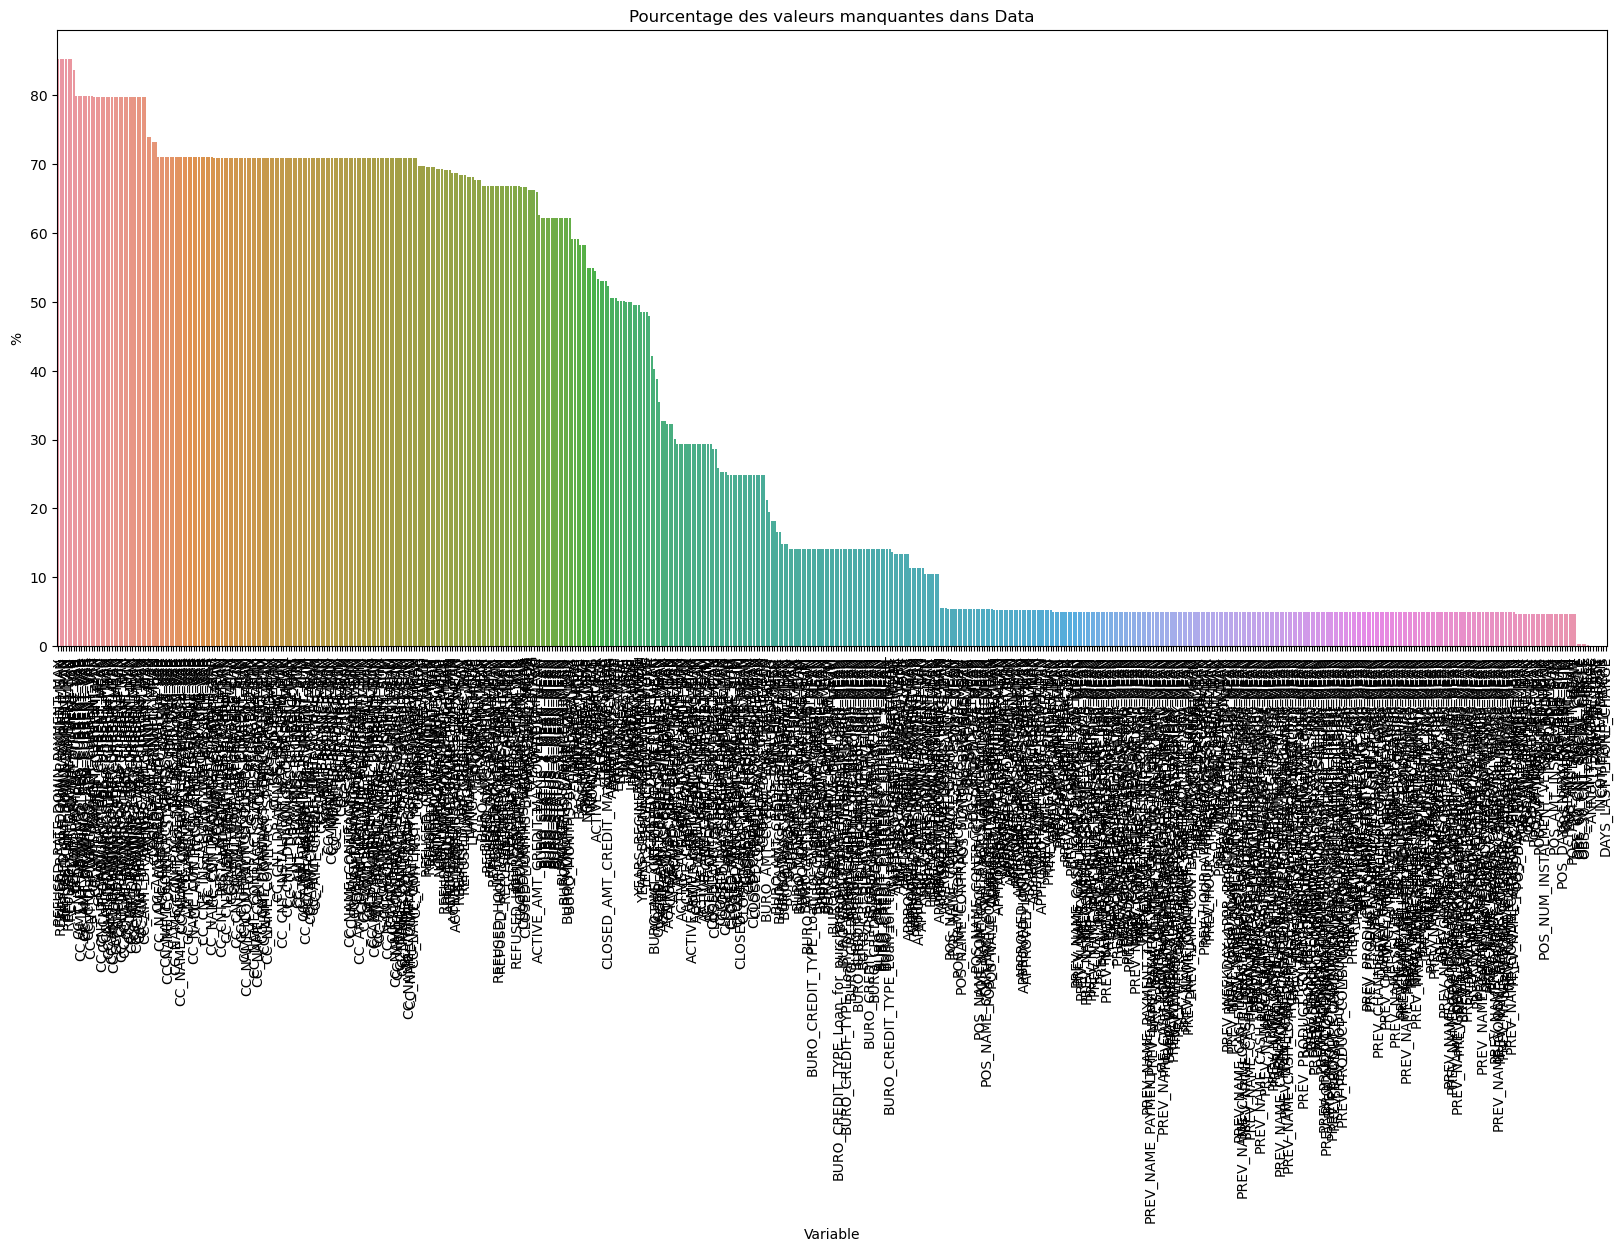

In [15]:
# Visualisation des valeurs manquantes de data : 
fct_data.valeurs_manquantes(
    df=data,
    titre_graph='Data'
)

In [16]:
# Séparation en train et test : 

train = data.loc[data['TARGET'].notna()]
test = data.loc[data['TARGET'].isna()]

print(f"Dimensions de train :{train.shape}")
print(f"Dimensions de test :{test.shape}")

Dimensions de train :(307507, 786)
Dimensions de test :(48744, 786)


Nomnbrde valeurs manquantes : 61117501 | Nbre de données : 241700502 | -----> 25.29 % de valeurs manquantes 
----------------------------------------------------------------------------------------------------
Nombre de variables avec des valeurs manquantes : 605/786


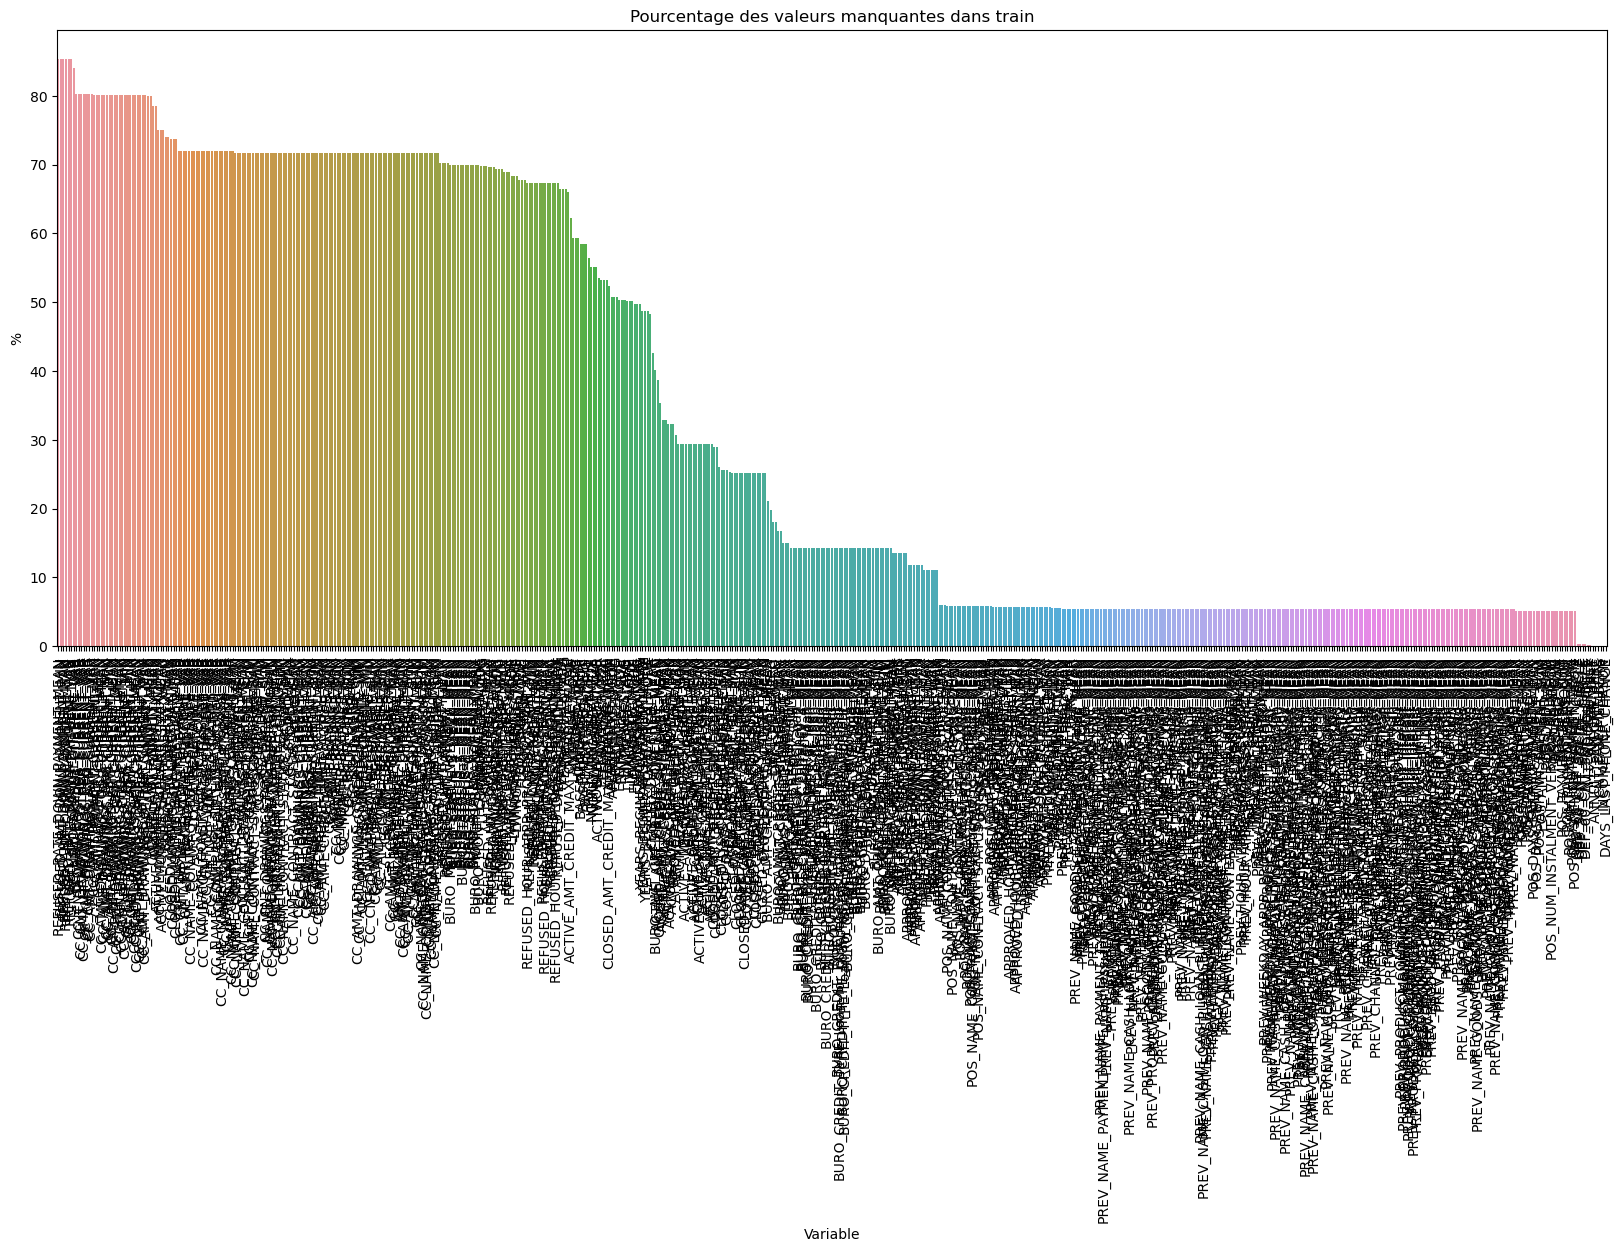

Nomnbrde valeurs manquantes : 8203509 | Nbre de données : 38312784 | -----> 21.41 % de valeurs manquantes 
----------------------------------------------------------------------------------------------------
Nombre de variables avec des valeurs manquantes : 602/786


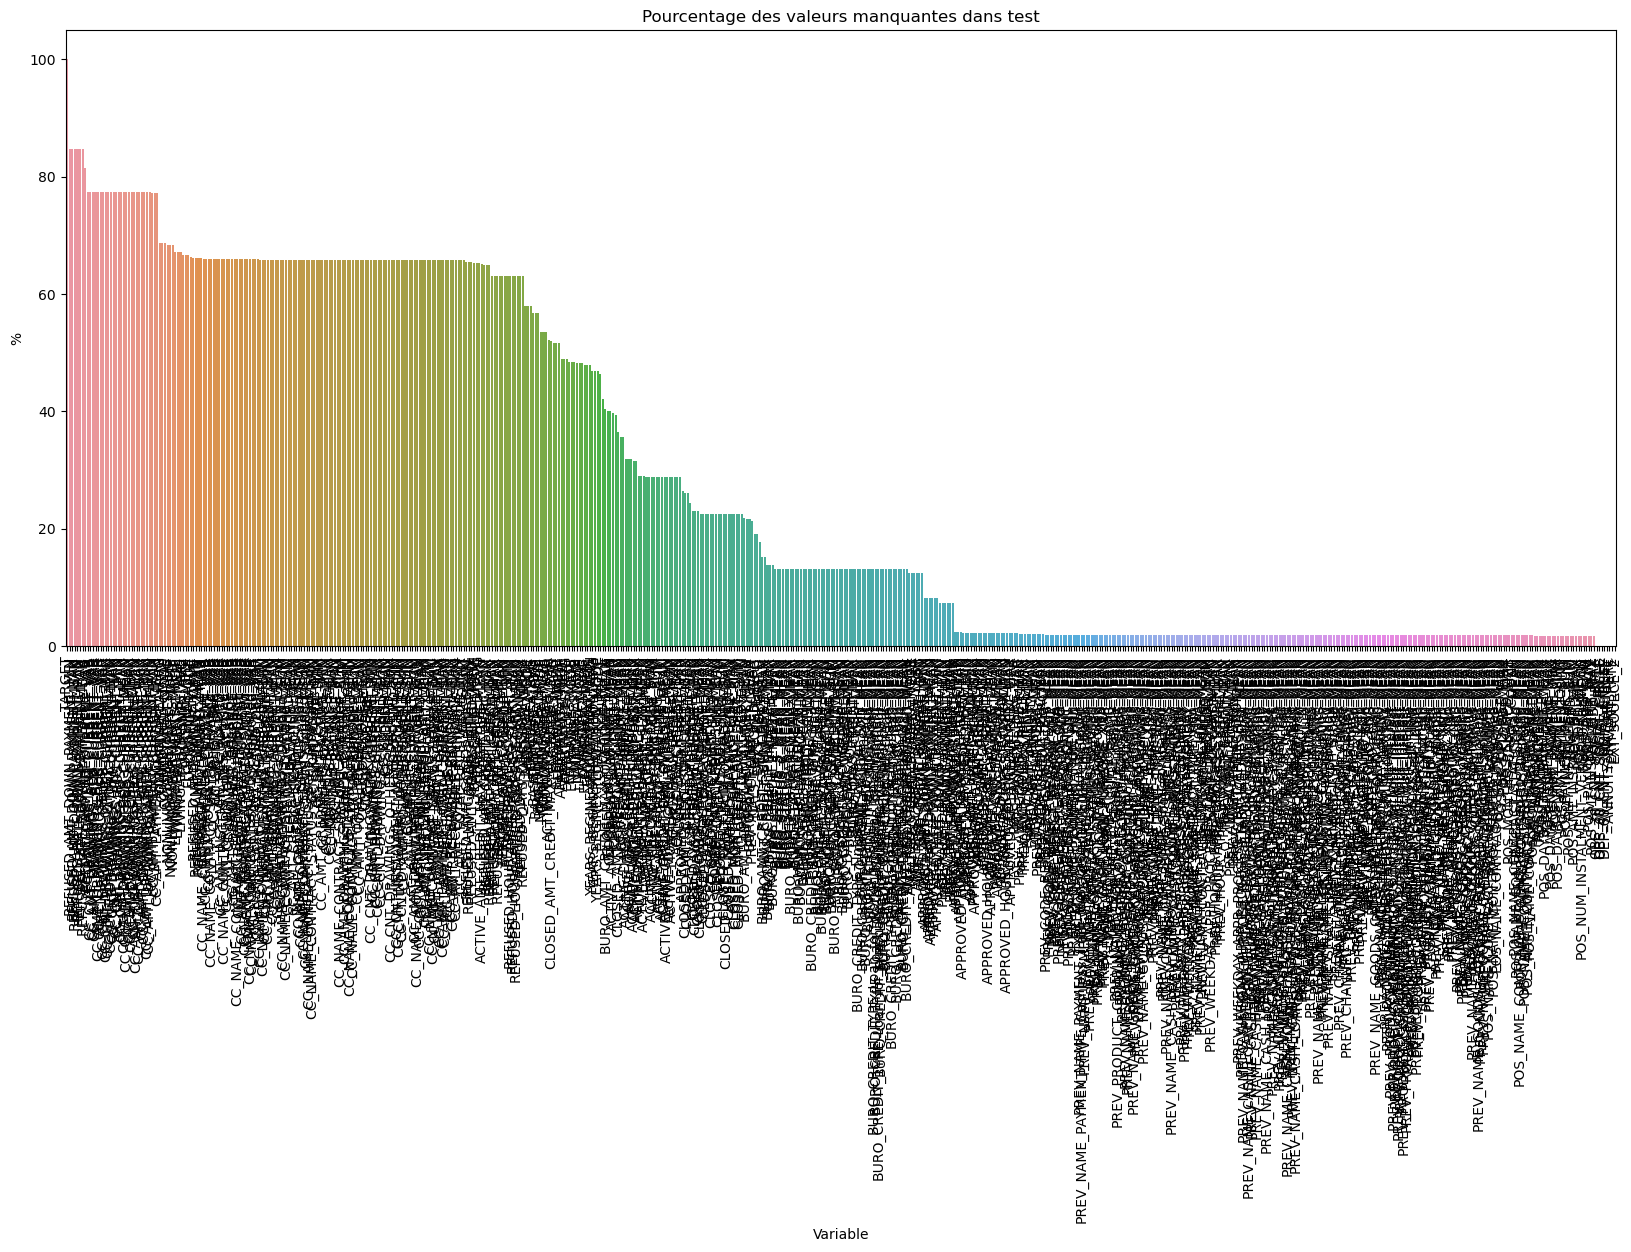

In [17]:
# Visualisation des valeurs manquantes : 
fct_data.valeurs_manquantes(
    df=train,
    titre_graph='train',
)

fct_data.valeurs_manquantes(
    df=test,
    titre_graph='test',
)

## 5. <a id='toc5_'></a>[Features selection](#toc0_)
Ici nous utiliserons LightGBM en validation croisée avec de ressortir les features importance de chaque features de data.

In [31]:
feature_importance_df = fct_data.features_importance_lightgbm(
    df=data,
    num_folds=10,
)

Dimension de train : (307507, 786)
Dimension de test : (48744, 786)


/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[200]	valid_0's auc: 0.77633	valid_0's binary_logloss: 0.244452
[400]	valid_0's auc: 0.787527	valid_0's binary_logloss: 0.239865
[600]	valid_0's auc: 0.791231	valid_0's binary_logloss: 0.238402
[800]	valid_0's auc: 0.79281	valid_0's binary_logloss: 0.23779
[1000]	valid_0's auc: 0.793718	valid_0's binary_logloss: 0.237405
[1200]	valid_0's auc: 0.79418	valid_0's binary_logloss: 0.23722
[1400]	valid_0's auc: 0.794586	valid_0's binary_logloss: 0.237107
Fold  1.00, score AUC : 0.794627


/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[200]	valid_0's auc: 0.768343	valid_0's binary_logloss: 0.243192
[400]	valid_0's auc: 0.778252	valid_0's binary_logloss: 0.239292
[600]	valid_0's auc: 0.78181	valid_0's binary_logloss: 0.238037
[800]	valid_0's auc: 0.783542	valid_0's binary_logloss: 0.237493
[1000]	valid_0's auc: 0.784514	valid_0's binary_logloss: 0.237217
[1200]	valid_0's auc: 0.785072	valid_0's binary_logloss: 0.237067
[1400]	valid_0's auc: 0.78528	valid_0's binary_logloss: 0.237027
[1600]	valid_0's auc: 0.785275	valid_0's binary_logloss: 0.237052
Fold  2.00, score AUC : 0.785309


/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[200]	valid_0's auc: 0.774932	valid_0's binary_logloss: 0.238359
[400]	valid_0's auc: 0.78606	valid_0's binary_logloss: 0.233999
[600]	valid_0's auc: 0.789871	valid_0's binary_logloss: 0.232558
[800]	valid_0's auc: 0.791301	valid_0's binary_logloss: 0.231984
[1000]	valid_0's auc: 0.792277	valid_0's binary_logloss: 0.231575
[1200]	valid_0's auc: 0.792486	valid_0's binary_logloss: 0.23146
[1400]	valid_0's auc: 0.792612	valid_0's binary_logloss: 0.231407
[1600]	valid_0's auc: 0.792571	valid_0's binary_logloss: 0.231391
Fold  3.00, score AUC : 0.792733


/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[200]	valid_0's auc: 0.778	valid_0's binary_logloss: 0.240124
[400]	valid_0's auc: 0.787857	valid_0's binary_logloss: 0.23609
[600]	valid_0's auc: 0.791847	valid_0's binary_logloss: 0.234754
[800]	valid_0's auc: 0.793816	valid_0's binary_logloss: 0.234159
[1000]	valid_0's auc: 0.794656	valid_0's binary_logloss: 0.233915
[1200]	valid_0's auc: 0.795014	valid_0's binary_logloss: 0.23377
[1400]	valid_0's auc: 0.795426	valid_0's binary_logloss: 0.233623
Fold  4.00, score AUC : 0.795673


/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[200]	valid_0's auc: 0.770311	valid_0's binary_logloss: 0.247908
[400]	valid_0's auc: 0.780946	valid_0's binary_logloss: 0.243719
[600]	valid_0's auc: 0.784701	valid_0's binary_logloss: 0.242288
[800]	valid_0's auc: 0.786538	valid_0's binary_logloss: 0.241637
[1000]	valid_0's auc: 0.787158	valid_0's binary_logloss: 0.241358
[1200]	valid_0's auc: 0.787463	valid_0's binary_logloss: 0.241258
[1400]	valid_0's auc: 0.787916	valid_0's binary_logloss: 0.24112
Fold  5.00, score AUC : 0.787989


/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[200]	valid_0's auc: 0.766775	valid_0's binary_logloss: 0.246115
[400]	valid_0's auc: 0.777453	valid_0's binary_logloss: 0.242111
[600]	valid_0's auc: 0.781542	valid_0's binary_logloss: 0.240754
[800]	valid_0's auc: 0.783712	valid_0's binary_logloss: 0.240062
[1000]	valid_0's auc: 0.785025	valid_0's binary_logloss: 0.239662
[1200]	valid_0's auc: 0.785593	valid_0's binary_logloss: 0.239483
[1400]	valid_0's auc: 0.786216	valid_0's binary_logloss: 0.239314
[1600]	valid_0's auc: 0.786622	valid_0's binary_logloss: 0.239201
[1800]	valid_0's auc: 0.78661	valid_0's binary_logloss: 0.239202
[2000]	valid_0's auc: 0.78704	valid_0's binary_logloss: 0.239068
[2200]	valid_0's auc: 0.787289	valid_0's binary_logloss: 0.23903
Fold  6.00, score AUC : 0.787357


/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[200]	valid_0's auc: 0.772831	valid_0's binary_logloss: 0.241241
[400]	valid_0's auc: 0.78307	valid_0's binary_logloss: 0.237108
[600]	valid_0's auc: 0.786475	valid_0's binary_logloss: 0.235787
[800]	valid_0's auc: 0.787506	valid_0's binary_logloss: 0.235325
[1000]	valid_0's auc: 0.788047	valid_0's binary_logloss: 0.235085
[1200]	valid_0's auc: 0.788195	valid_0's binary_logloss: 0.234997
[1400]	valid_0's auc: 0.788008	valid_0's binary_logloss: 0.235053
Fold  7.00, score AUC : 0.788249


/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[200]	valid_0's auc: 0.779408	valid_0's binary_logloss: 0.237561
[400]	valid_0's auc: 0.790738	valid_0's binary_logloss: 0.232814
[600]	valid_0's auc: 0.794796	valid_0's binary_logloss: 0.231211
[800]	valid_0's auc: 0.795934	valid_0's binary_logloss: 0.230693
[1000]	valid_0's auc: 0.796392	valid_0's binary_logloss: 0.230454
[1200]	valid_0's auc: 0.796603	valid_0's binary_logloss: 0.230288
[1400]	valid_0's auc: 0.796584	valid_0's binary_logloss: 0.230292
Fold  8.00, score AUC : 0.79683


/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[200]	valid_0's auc: 0.776018	valid_0's binary_logloss: 0.243628
[400]	valid_0's auc: 0.786451	valid_0's binary_logloss: 0.239421
[600]	valid_0's auc: 0.790396	valid_0's binary_logloss: 0.237938
[800]	valid_0's auc: 0.792458	valid_0's binary_logloss: 0.237217
[1000]	valid_0's auc: 0.793497	valid_0's binary_logloss: 0.236845
[1200]	valid_0's auc: 0.794288	valid_0's binary_logloss: 0.236528
[1400]	valid_0's auc: 0.794516	valid_0's binary_logloss: 0.236502
Fold  9.00, score AUC : 0.794617


/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[200]	valid_0's auc: 0.777022	valid_0's binary_logloss: 0.241393
[400]	valid_0's auc: 0.786338	valid_0's binary_logloss: 0.237501
[600]	valid_0's auc: 0.789383	valid_0's binary_logloss: 0.236303
[800]	valid_0's auc: 0.790831	valid_0's binary_logloss: 0.235789
[1000]	valid_0's auc: 0.791673	valid_0's binary_logloss: 0.235545
[1200]	valid_0's auc: 0.792075	valid_0's binary_logloss: 0.235455
[1400]	valid_0's auc: 0.792275	valid_0's binary_logloss: 0.23546
Fold  10.00, score AUC : 0.792245
AUC score total : 0.791495


In [38]:
# Sauvegarde du fichier : 

fct_data.enregistrement_pickle(
    name='df_feature_importance_LightGBM', 
    chemin='2. Sauvegardes',
    fichier=feature_importance_df,
)

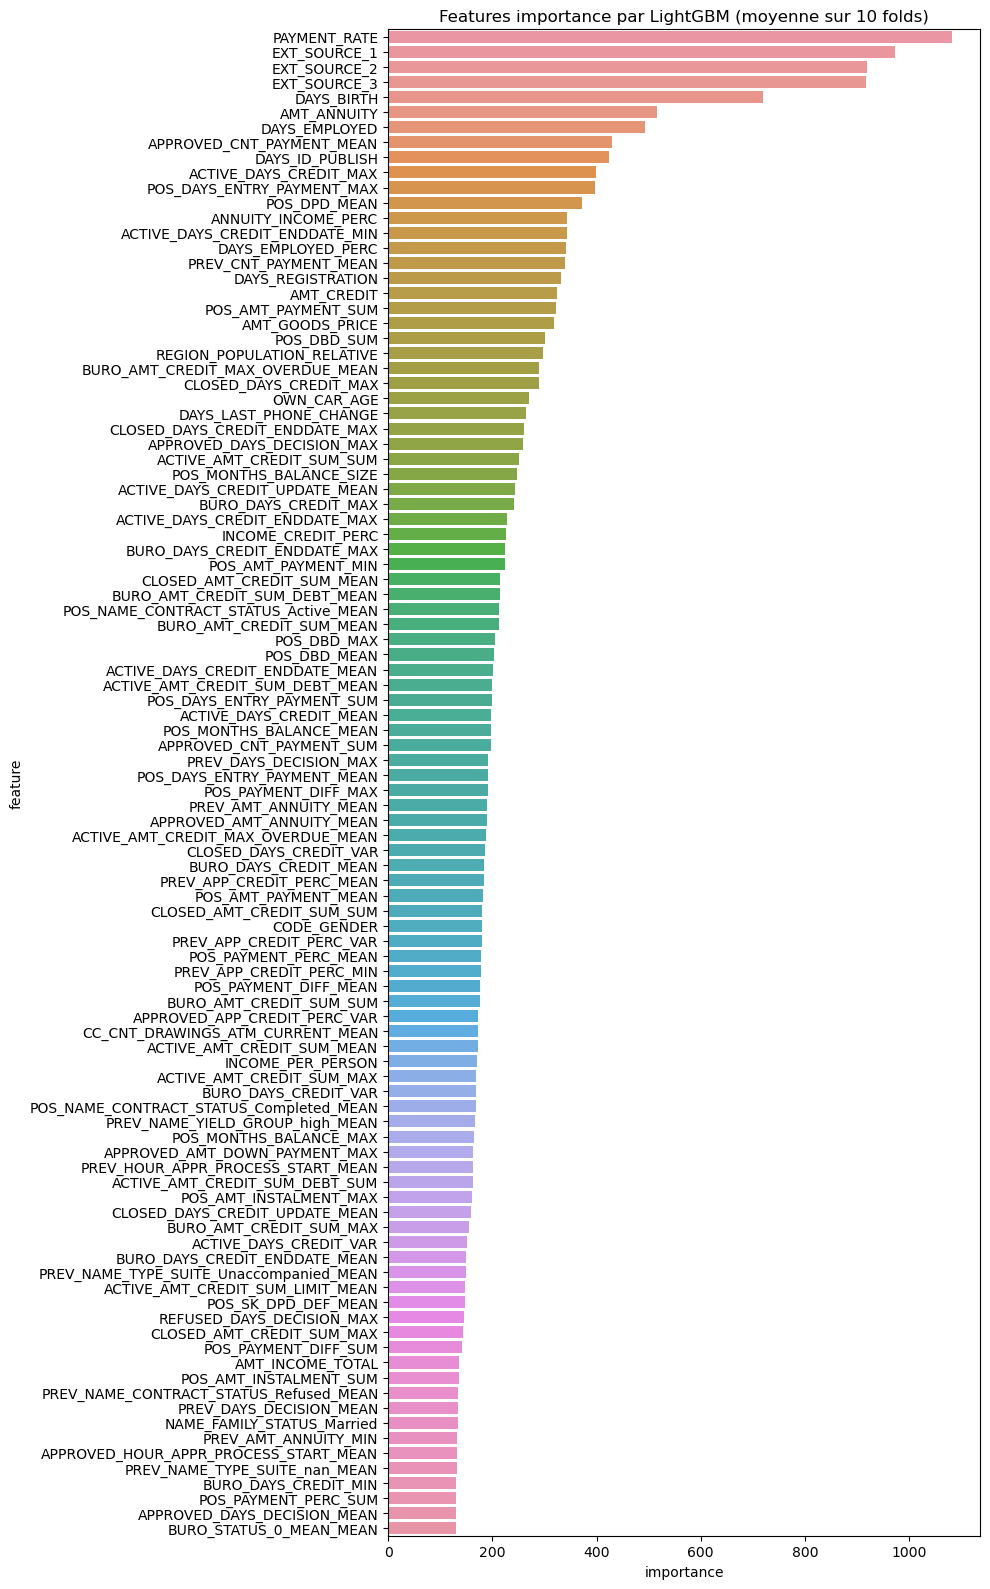

In [4]:
# Visualisation des features possédant le plus d'importance : 

# Récupération des 100 Features les plus importantes : 
col = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:100].index.tolist()

# Filtre sur le DataFrame : 
best_features = feature_importance_df.loc[feature_importance_df['feature'].isin(col)]
best_features = best_features.groupby('feature')['importance'].mean().to_frame('importance').sort_values('importance', ascending=False)

# Affichage du graphique : 
plt.figure(figsize=(10, 16))

sns.barplot(
    x="importance",
    y=best_features.index,
    data=best_features,
    )

plt.title('Features importance par LightGBM (moyenne sur 10 folds)')
plt.tight_layout()

plt.show()

del col 

Dans les 100 fetaures possédant le plus d'importance en utilisant LightGBM, nous retrouvons les variables : 
- EXT_SOURCE_1
- EXT SOURCE_2
- EXT_SOURCE_3
- DAYS_BIRTH 
- NAME_CONTRACT_STATUS (avec modification)  
identifiées lors de l'analyse exploratoire préliminaire.

In [5]:
# Sélection de features : 

# 1. Récupération des 100 features depuis data : 
data_selected_features = data.loc[:,best_features.index]

# 2. Calcul de la matrice de corréaltion :
correlation_matrix = data_selected_features.corr()

# 3. Récupération des paires de variables fortement corrélées :
correlated_pairs = set()

for i in range(len(best_features.index)):
    
    for j in range(i + 1, len(best_features.index)):
        feature1 = best_features.index[i]
        feature2 = best_features.index[j]
        correlation = correlation_matrix.loc[feature1, feature2]
       
        if abs(correlation) > 0.6: 
            correlated_pairs.add((feature1, feature2))


# 4. Sélection des features à éliminées : 
features_to_remove = set()

for pair in correlated_pairs:
    feature1, feature2 = pair
    
    # 4.1 Sélection de la variables à éliminer en fonction de son importance :
 
    if best_features.loc[feature1, 'importance'] < best_features.loc[feature2, 'importance']: 
        features_to_remove.add(feature1)
    else: 
        features_to_remove.add(feature2)

# 5. Affichage : 
print(f"Sur {len(best_features)} variables possédant les meilleures importances, nous pouvons en éliminer {len(features_to_remove)}"
      f" qui ont une corrélation importantes avec les autres\n")

print(f"Liste ds features à garder : ")
display(best_features.loc[~best_features.index.isin(list(features_to_remove))].sort_values('importance', ascending=False))

del correlated_pairs, correlation, correlation_matrix, data_selected_features, feature1, feature2, i, j, pair

Sur 100 variables possédant les meilleures importances, nous pouvons en éliminer 43 qui ont une corrélation importantes avec les autres

Liste ds features à garder : 


importance
feature                                            
PAYMENT_RATE                                 1081.9
EXT_SOURCE_1                                  973.0
EXT_SOURCE_2                                  919.9
EXT_SOURCE_3                                  917.7
DAYS_BIRTH                                    718.6
AMT_ANNUITY                                   516.5
DAYS_EMPLOYED                                 491.9
APPROVED_CNT_PAYMENT_MEAN                     429.0
DAYS_ID_PUBLISH                               424.3
ACTIVE_DAYS_CREDIT_MAX                        398.5
POS_DAYS_ENTRY_PAYMENT_MAX                    396.8
POS_DPD_MEAN                                  372.3
ANNUITY_INCOME_PERC                           343.5
ACTIVE_DAYS_CREDIT_ENDDATE_MIN                342.8
DAYS_REGISTRATION                             331.3
POS_AMT_PAYMENT_SUM                           321.7
POS_DBD_SUM                                   300.3
REGION_POPULATION_RELATIVE                    296.9
BURO_AMT_CREDIT_MAX_OVERDUE_MEAN              289.9
CLOSED_DAYS_CREDIT_MAX                        288.4
OWN_CAR_AGE                                   269.6
DAYS_LAST_PHONE_CHANGE                        263.6
CLOSED_DAYS_CREDIT_ENDDATE_MAX                261.4
ACTIVE_AMT_CREDIT_SUM_SUM                     251.8
ACTIVE_DAYS_CREDIT_UPDATE_MEAN                242.6
ACTIVE_DAYS_CREDIT_ENDDATE_MAX                228.1
INCOME_CREDIT_PERC                            226.2
POS_AMT_PAYMENT_MIN                           223.2
CLOSED_AMT_CREDIT_SUM_MEAN                    215.2
BURO_AMT_CREDIT_SUM_DEBT_MEAN                 214.2
POS_NAME_CONTRACT_STATUS_Active_MEAN          211.8
POS_DBD_MAX                                   205.6
POS_DBD_MEAN                                  202.4
POS_PAYMENT_DIFF_MAX                          191.2
PREV_AMT_ANNUITY_MEAN                         189.9
ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN            187.0
CLOSED_DAYS_CREDIT_VAR                        185.6
PREV_APP_CREDIT_PERC_MEAN                     183.3
POS_AMT_PAYMENT_MEAN                          182.4
CODE_GENDER                                   179.1
PREV_APP_CREDIT_PERC_VAR                      179.0
POS_PAYMENT_PERC_MEAN                         178.8
POS_PAYMENT_DIFF_MEAN                         176.5
CC_CNT_DRAWINGS_ATM_CURRENT_MEAN              172.2
INCOME_PER_PERSON                             169.5
PREV_NAME_YIELD_GROUP_high_MEAN               166.4
APPROVED_AMT_DOWN_PAYMENT_MAX                 163.6
PREV_HOUR_APPR_PROCESS_START_MEAN             162.3
ACTIVE_DAYS_CREDIT_VAR                        151.4
PREV_NAME_TYPE_SUITE_Unaccompanied_MEAN       149.3
ACTIVE_AMT_CREDIT_SUM_LIMIT_MEAN              147.3
POS_SK_DPD_DEF_MEAN                           147.1
REFUSED_DAYS_DECISION_MAX                     144.7
PREV_NAME_CONTRACT_STATUS_Refused_MEAN        134.6
NAME_FAMILY_STATUS_Married                    133.8
PREV_NAME_TYPE_SUITE_nan_MEAN                 131.7
BURO_STATUS_0_MEAN_MEAN                       129.6

In [5]:
# Evaluation avec LightGBM : 

# 1. Récupération des features à garder : 
ls_features = [f for f in best_features.index if f not in features_to_remove]
ls_features.append('TARGET')

# 2. Filtre sur data : 
data_filtre = data.loc[:, ls_features]

# 3. Evalutation : 
_ = fct_data.features_importance_lightgbm(
    df=data_filtre, 
    num_folds=10,
)

Dimension de train : (307507, 58)
Dimension de test : (48744, 58)


/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[200]	valid_0's auc: 0.773344	valid_0's binary_logloss: 0.245365
[400]	valid_0's auc: 0.781926	valid_0's binary_logloss: 0.241794
[600]	valid_0's auc: 0.785018	valid_0's binary_logloss: 0.24069
[800]	valid_0's auc: 0.786445	valid_0's binary_logloss: 0.24021
[1000]	valid_0's auc: 0.786715	valid_0's binary_logloss: 0.240058
[1200]	valid_0's auc: 0.786596	valid_0's binary_logloss: 0.240076
[1400]	valid_0's auc: 0.786763	valid_0's binary_logloss: 0.240026
Fold 1, score AUC : 0.786836


/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[200]	valid_0's auc: 0.763789	valid_0's binary_logloss: 0.244336
[400]	valid_0's auc: 0.772472	valid_0's binary_logloss: 0.24117
[600]	valid_0's auc: 0.77579	valid_0's binary_logloss: 0.240185
[800]	valid_0's auc: 0.777019	valid_0's binary_logloss: 0.239818
[1000]	valid_0's auc: 0.778	valid_0's binary_logloss: 0.239584
[1200]	valid_0's auc: 0.777942	valid_0's binary_logloss: 0.239584
Fold 2, score AUC : 0.778081


/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[200]	valid_0's auc: 0.772442	valid_0's binary_logloss: 0.23916
[400]	valid_0's auc: 0.783472	valid_0's binary_logloss: 0.235122
[600]	valid_0's auc: 0.787325	valid_0's binary_logloss: 0.233683
[800]	valid_0's auc: 0.789201	valid_0's binary_logloss: 0.23303
[1000]	valid_0's auc: 0.79	valid_0's binary_logloss: 0.232733
[1200]	valid_0's auc: 0.790271	valid_0's binary_logloss: 0.232625
Fold 3, score AUC : 0.790498


/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[200]	valid_0's auc: 0.774608	valid_0's binary_logloss: 0.240859
[400]	valid_0's auc: 0.783789	valid_0's binary_logloss: 0.237174
[600]	valid_0's auc: 0.787194	valid_0's binary_logloss: 0.235929
[800]	valid_0's auc: 0.788553	valid_0's binary_logloss: 0.235493
[1000]	valid_0's auc: 0.789191	valid_0's binary_logloss: 0.235306
[1200]	valid_0's auc: 0.789641	valid_0's binary_logloss: 0.235174
[1400]	valid_0's auc: 0.789866	valid_0's binary_logloss: 0.235092
[1600]	valid_0's auc: 0.789763	valid_0's binary_logloss: 0.235147
Fold 4, score AUC : 0.790014


/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[200]	valid_0's auc: 0.768619	valid_0's binary_logloss: 0.248662
[400]	valid_0's auc: 0.778073	valid_0's binary_logloss: 0.244966
[600]	valid_0's auc: 0.78102	valid_0's binary_logloss: 0.243827
[800]	valid_0's auc: 0.782135	valid_0's binary_logloss: 0.243388
[1000]	valid_0's auc: 0.782402	valid_0's binary_logloss: 0.243296
[1200]	valid_0's auc: 0.78246	valid_0's binary_logloss: 0.243271
[1400]	valid_0's auc: 0.782595	valid_0's binary_logloss: 0.243258
Fold 5, score AUC : 0.782572


/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[200]	valid_0's auc: 0.764167	valid_0's binary_logloss: 0.246876
[400]	valid_0's auc: 0.773314	valid_0's binary_logloss: 0.243449
[600]	valid_0's auc: 0.777453	valid_0's binary_logloss: 0.242104
[800]	valid_0's auc: 0.779548	valid_0's binary_logloss: 0.241491
[1000]	valid_0's auc: 0.780451	valid_0's binary_logloss: 0.241161
[1200]	valid_0's auc: 0.781274	valid_0's binary_logloss: 0.240896
[1400]	valid_0's auc: 0.781635	valid_0's binary_logloss: 0.240759
[1600]	valid_0's auc: 0.782209	valid_0's binary_logloss: 0.240591
[1800]	valid_0's auc: 0.782247	valid_0's binary_logloss: 0.240566
Fold 6, score AUC : 0.78232


/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[200]	valid_0's auc: 0.769269	valid_0's binary_logloss: 0.242228
[400]	valid_0's auc: 0.778873	valid_0's binary_logloss: 0.23857
[600]	valid_0's auc: 0.78261	valid_0's binary_logloss: 0.237264
[800]	valid_0's auc: 0.783244	valid_0's binary_logloss: 0.236913
[1000]	valid_0's auc: 0.783865	valid_0's binary_logloss: 0.236705
[1200]	valid_0's auc: 0.78418	valid_0's binary_logloss: 0.236602
Fold 7, score AUC : 0.784221


/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[200]	valid_0's auc: 0.775653	valid_0's binary_logloss: 0.238535
[400]	valid_0's auc: 0.784704	valid_0's binary_logloss: 0.234761
[600]	valid_0's auc: 0.788103	valid_0's binary_logloss: 0.233426
[800]	valid_0's auc: 0.788978	valid_0's binary_logloss: 0.233096
[1000]	valid_0's auc: 0.789644	valid_0's binary_logloss: 0.232859
[1200]	valid_0's auc: 0.789555	valid_0's binary_logloss: 0.232913
Fold 8, score AUC : 0.789653


/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[200]	valid_0's auc: 0.772418	valid_0's binary_logloss: 0.244418
[400]	valid_0's auc: 0.782312	valid_0's binary_logloss: 0.240575
[600]	valid_0's auc: 0.785463	valid_0's binary_logloss: 0.239352
[800]	valid_0's auc: 0.7868	valid_0's binary_logloss: 0.238883
[1000]	valid_0's auc: 0.787281	valid_0's binary_logloss: 0.238713
[1200]	valid_0's auc: 0.788083	valid_0's binary_logloss: 0.238452
[1400]	valid_0's auc: 0.788372	valid_0's binary_logloss: 0.238342
[1600]	valid_0's auc: 0.788498	valid_0's binary_logloss: 0.238305
[1800]	valid_0's auc: 0.788611	valid_0's binary_logloss: 0.238275
[2000]	valid_0's auc: 0.788484	valid_0's binary_logloss: 0.238331
Fold 9, score AUC : 0.788663


/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/maxime/Formation Data Scientist /Projets /7 - Implémentez un modèle de scoring/.conda_P7/lib/python3.11/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[200]	valid_0's auc: 0.774143	valid_0's binary_logloss: 0.242254
[400]	valid_0's auc: 0.782554	valid_0's binary_logloss: 0.238708
[600]	valid_0's auc: 0.785447	valid_0's binary_logloss: 0.237581
[800]	valid_0's auc: 0.786395	valid_0's binary_logloss: 0.237215
[1000]	valid_0's auc: 0.786862	valid_0's binary_logloss: 0.237057
[1200]	valid_0's auc: 0.786857	valid_0's binary_logloss: 0.237061
Fold 10, score AUC : 0.786998
AUC score total : 0.785892


***Evaluation avec LightGBM***

|Features|score AUC moyen sur 10 folds|
|--|--|
|Toutes features (785)|0.791495|
|Features sélectionnées (57)|0.785892|

Au vu de la faible perte de performance, nous ne garderons donc pour la suite que les 57 variables. 

In [7]:
# Suppression des variables : 
del best_features, data, feature_importance_df, features_to_remove, ls_features

## 6. <a id='toc6_'></a>[Pre_processing](#toc0_)

Dimmension du DataFrame : (356251, 58)
----------------------------------------------------------------------------------------------------
Nombre de lignes dupliquées : 0
----------------------------------------------------------------------------------------------------
Information sur les types de variables :


Data_type
Nom_de_colonne                                   
PAYMENT_RATE                              float64
EXT_SOURCE_1                              float64
EXT_SOURCE_2                              float64
EXT_SOURCE_3                              float64
DAYS_BIRTH                                  int64
AMT_ANNUITY                               float64
DAYS_EMPLOYED                             float64
APPROVED_CNT_PAYMENT_MEAN                 float64
DAYS_ID_PUBLISH                             int64
ACTIVE_DAYS_CREDIT_MAX                    float64
POS_DAYS_ENTRY_PAYMENT_MAX                float64
POS_DPD_MEAN                              float64
ANNUITY_INCOME_PERC                       float64
ACTIVE_DAYS_CREDIT_ENDDATE_MIN            float64
DAYS_REGISTRATION                         float64
POS_AMT_PAYMENT_SUM                       float64
POS_DBD_SUM                               float64
REGION_POPULATION_RELATIVE                float64
BURO_AMT_CREDIT_MAX_OVERDUE_MEAN          float64
CLOSED_DAYS_CREDIT_MAX                    float64
OWN_CAR_AGE                               float64
DAYS_LAST_PHONE_CHANGE                    float64
CLOSED_DAYS_CREDIT_ENDDATE_MAX            float64
ACTIVE_AMT_CREDIT_SUM_SUM                 float64
ACTIVE_DAYS_CREDIT_UPDATE_MEAN            float64
ACTIVE_DAYS_CREDIT_ENDDATE_MAX            float64
INCOME_CREDIT_PERC                        float64
POS_AMT_PAYMENT_MIN                       float64
CLOSED_AMT_CREDIT_SUM_MEAN                float64
BURO_AMT_CREDIT_SUM_DEBT_MEAN             float64
POS_NAME_CONTRACT_STATUS_Active_MEAN      float64
POS_DBD_MAX                               float64
POS_DBD_MEAN                              float64
POS_PAYMENT_DIFF_MAX                      float64
PREV_AMT_ANNUITY_MEAN                     float64
ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN        float64
CLOSED_DAYS_CREDIT_VAR                    float64
PREV_APP_CREDIT_PERC_MEAN                 float64
POS_AMT_PAYMENT_MEAN                      float64
CODE_GENDER                                 int64
PREV_APP_CREDIT_PERC_VAR                  float64
POS_PAYMENT_PERC_MEAN                     float64
POS_PAYMENT_DIFF_MEAN                     float64
CC_CNT_DRAWINGS_ATM_CURRENT_MEAN          float64
INCOME_PER_PERSON                         float64
PREV_NAME_YIELD_GROUP_high_MEAN           float64
APPROVED_AMT_DOWN_PAYMENT_MAX             float64
PREV_HOUR_APPR_PROCESS_START_MEAN         float64
ACTIVE_DAYS_CREDIT_VAR                    float64
PREV_NAME_TYPE_SUITE_Unaccompanied_MEAN   float64
ACTIVE_AMT_CREDIT_SUM_LIMIT_MEAN          float64
POS_SK_DPD_DEF_MEAN                       float64
REFUSED_DAYS_DECISION_MAX                 float64
PREV_NAME_CONTRACT_STATUS_Refused_MEAN    float64
NAME_FAMILY_STATUS_Married                   bool
PREV_NAME_TYPE_SUITE_nan_MEAN             float64
BURO_STATUS_0_MEAN_MEAN                   float64
TARGET                                    float64

----------------------------------------------------------------------------------------------------
Répartition des types de variables :


Data_type  Nombre par type de variable  % des types de variable
0      bool                            1                 1.724138
1   float64                           54                93.103448
2     int64                            3                 5.172414

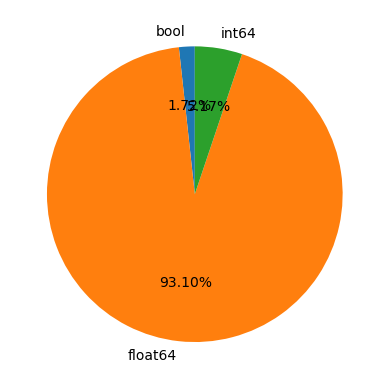

----------------------------------------------------------------------------------------------------
Nomnbrde valeurs manquantes : 3561154 | Nbre de données : 20662558 | -----> 17.23 % de valeurs manquantes 
----------------------------------------------------------------------------------------------------
Nombre de variables avec des valeurs manquantes : 51/58


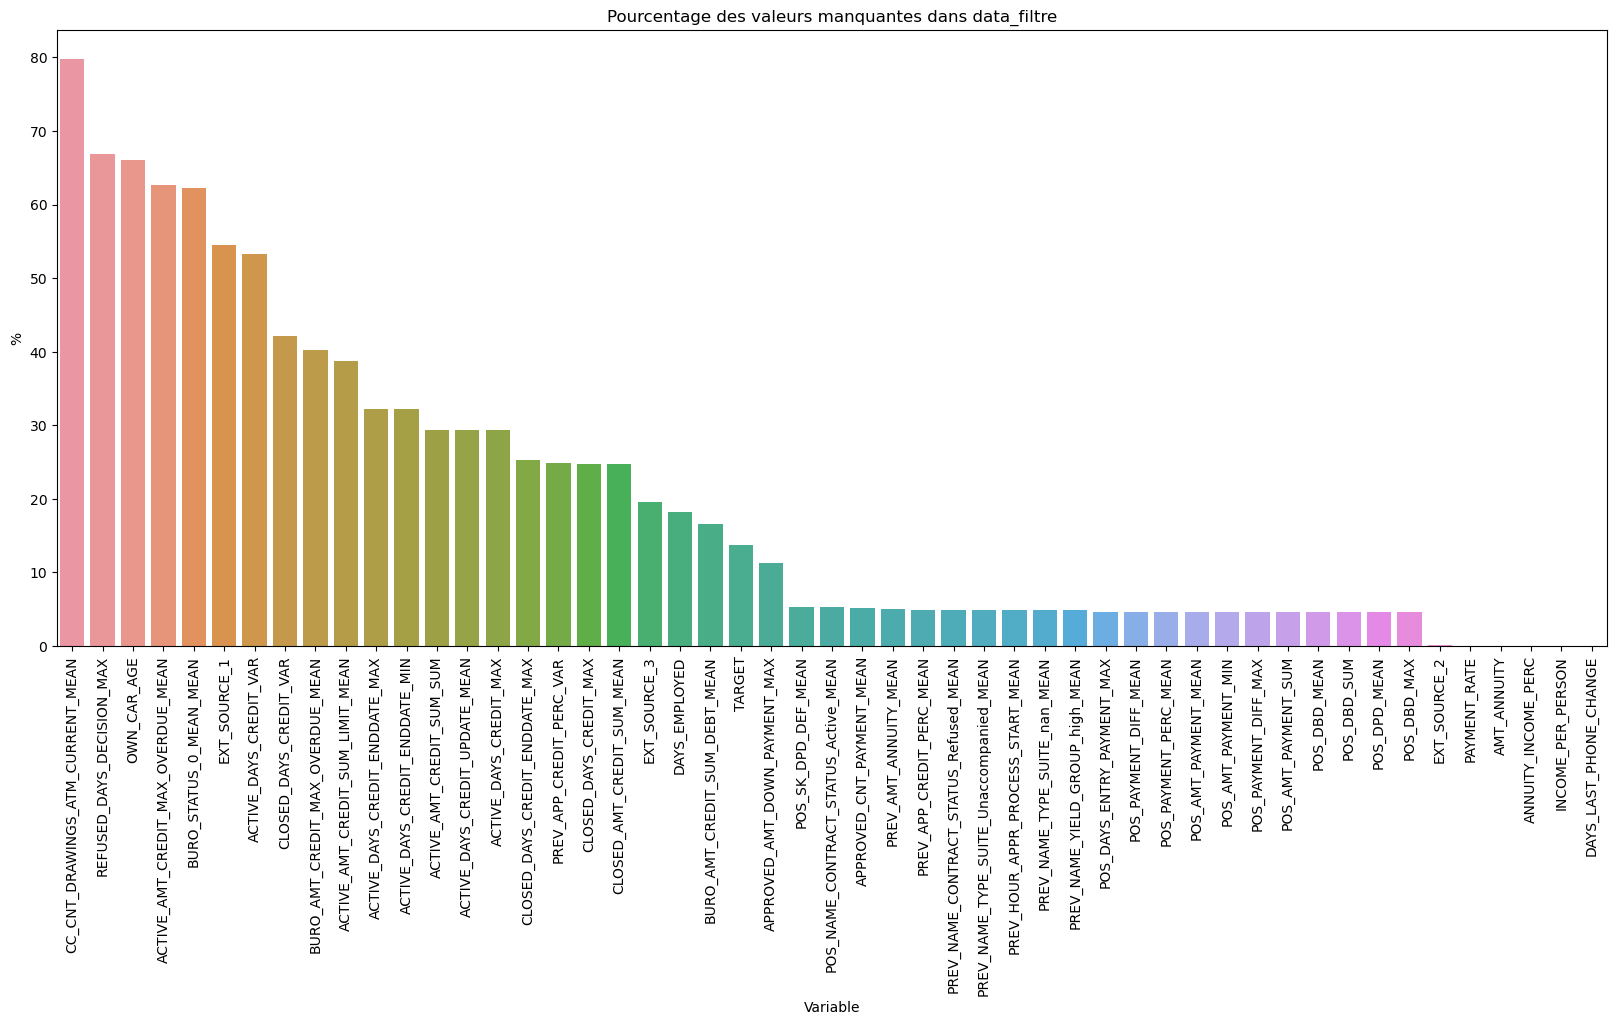

In [8]:
fct_data.info_variables(
    df=data_filtre,
)

fct_data.valeurs_manquantes(
    df=data_filtre,
    titre_graph='data_filtre',
)

De nombreuses variables possèdent des valeurs manquantes. 
Nous utiliserons ici plusieurs complétion simple de ses valeurs: 

    le mode, la moyenne ou encore la mediane

Pour améliorer la mémoire, nous allons également réduire la taille des variables : 

    flot64 --> flot32
    int64 --> int8
    bool --> int8
    TARGET --> int8

In [13]:
# Complétion par la moyenne : 
train_mean_imputed, test_mean_imputed = fct_data.pre_process_dataframe(df=data_filtre, 
                                                              fillna_strategy='mean',
                                                              )

print(f"Dimension train : {train_mean_imputed.shape}")
print(f"Dimension test : {test_mean_imputed.shape}")

****************************************************************************************************

TRAIN
Nombre de colonnes avec au moins une valeur manquante : 0
type de données : [dtype('float32'), dtype('int8')]

****************************************************************************************************
****************************************************************************************************

TEST
Nombre de colonnes avec au moins une valeur manquante : 0
type de données : [dtype('float32'), dtype('int8')]

****************************************************************************************************
Dimension train : (307507, 58)
Dimension test : (48744, 57)


In [14]:
# Complétion par la médianne : 
train_median_imputed, test_median_imputed = fct_data.pre_process_dataframe(df=data_filtre, 
                                                              fillna_strategy='median',
                                                              )

print(f"Dimension train : {train_median_imputed.shape}")
print(f"Dimension test : {test_median_imputed.shape}")

****************************************************************************************************

TRAIN
Nombre de colonnes avec au moins une valeur manquante : 0
type de données : [dtype('float32'), dtype('int8')]

****************************************************************************************************
****************************************************************************************************

TEST
Nombre de colonnes avec au moins une valeur manquante : 0
type de données : [dtype('float32'), dtype('int8')]

****************************************************************************************************
Dimension train : (307507, 58)
Dimension test : (48744, 57)


In [15]:
# Complétion par le mode : 
train_mode_imputed, test_mode_imputed = fct_data.pre_process_dataframe(df=data_filtre, 
                                                              fillna_strategy='mode',
                                                              )

print(f"Dimension train : {train_mode_imputed.shape}")
print(f"Dimension test : {test_mode_imputed.shape}")

****************************************************************************************************

TRAIN
Nombre de colonnes avec au moins une valeur manquante : 0
type de données : [dtype('float32'), dtype('int8')]

****************************************************************************************************
****************************************************************************************************

TEST
Nombre de colonnes avec au moins une valeur manquante : 0
type de données : [dtype('float32'), dtype('int8')]

****************************************************************************************************
Dimension train : (307507, 58)
Dimension test : (48744, 57)


In [16]:
# Enregistrement des données : 
fct_data.enregistrement_pickle(
    name='train_mean_imputed',
    chemin='2. Sauvegardes',
    fichier=train_mean_imputed,
)

fct_data.enregistrement_pickle(
    name='train_median_imputed',
    chemin='2. Sauvegardes',
    fichier=train_median_imputed,
)

fct_data.enregistrement_pickle(
    name='train_mode_imputed',
    chemin='2. Sauvegardes',
    fichier=train_mode_imputed,
)

fct_data.enregistrement_pickle(
    name='test_mean_imputed',
    chemin='2. Sauvegardes',
    fichier=test_mean_imputed,
)

fct_data.enregistrement_pickle(
    name='test_median_imputed',
    chemin='2. Sauvegardes',
    fichier=test_median_imputed,
)

fct_data.enregistrement_pickle(
    name='test_mode_imputed',
    chemin='2. Sauvegardes',
    fichier=test_mode_imputed,
)